2021.08.22

In [2]:
import csv
import pandas as pd
import numpy as np
import glob,os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# 1 Data propressing

delete the files which contains "100µM_Agonist" and "WT_DMSO"

## 1.1 Change files' name 

iterative change the name of control type.

In [5]:
for file in os.listdir(r"./data/control"):
    print(file)

A1_WT_Control.csv
A3_WT_Control 2.csv
A6_WT_Control.csv
A3_WT_Control 3.csv
A7_WT_Control.csv
A3_WT_Control 4.csv
A8_WT_Control.csv
A3_WT_Control 5.csv
A2_WT_Control.csv
A2_WT_Control 3.csv
A2_WT_Control 2.csv
A5_WT_Control.csv
A4_WT_Control.csv
A2_WT_Control 5.csv
A3_WT_Control.csv
A2_WT_Control 4.csv
A1_WT_Control 3.csv
A5_WT_Control 6.csv
A1_WT_Control 2.csv
A5_WT_Control 4.csv
A5_WT_Control 5.csv
A1_WT_Control 5.csv
A1_WT_Control 4.csv
A5_WT_Control 2.csv
A5_WT_Control 3.csv
A4_WT_Control 6.csv
A4_WT_Control 5.csv
A4_WT_Control 4.csv
A4_WT_Control 3.csv
A4_WT_Control 2.csv


In [8]:
# iterative change the control name
path = r"./control"
num = 1
for file in os.listdir(path):
    os.rename(os.path.join(path,file),os.path.join(path,'WT_Control_'+ str(num))+".csv")
    num = num + 1

In [9]:
# iterative change the WT_DMSO name
path = r"./wt_DMSO"
num = 1
for file in os.listdir(path):
    os.rename(os.path.join(path,file),os.path.join(path,'WT_DMSO_'+ str(num))+".csv")
    num = num + 1

## 1.2 delete the beginning frames and flash frames 

### make the rows of all files are same.

In [27]:
file_set = glob.glob("./data/*.csv")


In [47]:
#check the number of rows for each csv file, so that we can make the rows of all files are same.
for f in file_set:
    f_name = os.path.basename(f)
    print(f_name)
    if f == "./data/C28_3.csv":
        dataset = pd.read_csv(f)
        print(dataset.shape)
    else:
        dataset = pd.read_csv(f)
        #datasetsum = pd.concat([datasetsum, dataset], axis=1)
        #print(datasetsum.shape)
        if dataset.shape[0] <= 570:
            pass
        else:
            dataset.drop(dataset.tail(1).index,inplace=True) #从尾部去掉 1 行
            dataset.to_csv("./data/{0}".format(f_name) )
            print(dataset.shape)


C28_3.csv
(570, 9)
C56_5.csv
C13_5.csv
C49_2.csv
C72_4.csv
C37_4.csv
C17_1.csv
C52_1.csv
C74_2.csv
C31_2.csv
C50_3.csv
C15_3.csv
C33_1.csv
C76_1.csv
(570, 12)
C50_2.csv
(570, 12)
C15_2.csv
C74_3.csv
(570, 13)
C31_3.csv
C72_5.csv
C37_5.csv
C49_3.csv
C56_4.csv
C13_4.csv
C28_2.csv
C70_5.csv
C35_5.csv
C49_1.csv
C54_4.csv
C11_4.csv
C69_4.csv
C31_1.csv
C74_1.csv
C52_2.csv
(570, 10)
C17_2.csv
C8_5.csv
C76_3.csv
C33_3.csv
C15_1.csv
C50_1.csv
C76_2.csv
C33_2.csv
C8_4.csv
C52_3.csv
C17_3.csv
C69_5.csv
C54_5.csv
C11_5.csv
C70_4.csv
C35_4.csv
C28_1.csv
C28_5.csv
C56_3.csv
C13_3.csv
C49_4.csv
(570, 13)
C11_1.csv
C54_1.csv
C72_2.csv
C37_2.csv
C69_1.csv
C74_4.csv
C31_4.csv
C50_5.csv
C15_5.csv
C50_4.csv
(570, 12)
C15_4.csv
C8_1.csv
C74_5.csv
(570, 12)
C31_5.csv
C72_3.csv
C37_3.csv
C49_5.csv
C35_1.csv
C70_1.csv
C56_2.csv
C13_2.csv
C28_4.csv
C70_3.csv
C35_3.csv
C37_1.csv
C72_1.csv
C54_2.csv
C11_2.csv
C69_2.csv
(570, 12)
C52_4.csv
C17_4.csv
C8_3.csv
C76_5.csv
(570, 12)
C33_5.csv
C76_4.csv
C33_4.csv
C8_2.

In [51]:
for f in file_set:
    f_name = os.path.basename(f)
    if f == "./data/C28_3.csv":
        dataset = pd.read_csv(f)
    else:
        dataset = pd.read_csv(f)
        if dataset.shape[0] == 570:
            pass
        else:
            print(f_name)
            print(dataset.shape)


C18_1.csv
(569, 13)
C39_5.csv
(569, 12)


Duplicate last row until the number of rows are 570. And then check again. 

In [52]:
for f in file_set:
    f_name = os.path.basename(f)
    if f == "./data/C28_3.csv":
        dataset = pd.read_csv(f)
    else:
        dataset = pd.read_csv(f)
        if dataset.shape[0] == 570:
            pass
        else:
            print(f_name)
            print(dataset.shape)


Apply above for WT_control und WT_DMSO folder

In [56]:
file_set = glob.glob("./control/*.csv")
print(file_set)
for f in file_set:
    f_name = os.path.basename(f)
    if f == "./control/WT_Control_34.csv":
        dataset = pd.read_csv(f)
    else:
        dataset = pd.read_csv(f)
        if dataset.shape[0] == 570:
            pass
        else:
            print(f_name)
            print(dataset.shape)



WT_Control_6.csv
(0, 1)


In [57]:
file_set = glob.glob("./wt_DMSO/*.csv")
#print(file_set)
for f in file_set:
    f_name = os.path.basename(f)
    if f == "./control/WT_Control_34.csv":
        dataset = pd.read_csv(f)
    else:
        dataset = pd.read_csv(f)
        if dataset.shape[0] == 570:
            pass
        else:
            print(f_name)
            print(dataset.shape)

['./wt_DMSO/WT_DMSO_5.csv', './wt_DMSO/WT_DMSO_4.csv', './wt_DMSO/WT_DMSO_6.csv', './wt_DMSO/WT_DMSO_7.csv', './wt_DMSO/WT_DMSO_3.csv', './wt_DMSO/WT_DMSO_2.csv', './wt_DMSO/WT_DMSO_1.csv', './wt_DMSO/WT_DMSO_11.csv', './wt_DMSO/WT_DMSO_10.csv', './wt_DMSO/WT_DMSO_12.csv', './wt_DMSO/WT_DMSO_13.csv', './wt_DMSO/WT_DMSO_17.csv', './wt_DMSO/WT_DMSO_16.csv', './wt_DMSO/WT_DMSO_14.csv', './wt_DMSO/WT_DMSO_28.csv', './wt_DMSO/WT_DMSO_29.csv', './wt_DMSO/WT_DMSO_15.csv', './wt_DMSO/WT_DMSO_18.csv', './wt_DMSO/WT_DMSO_24.csv', './wt_DMSO/WT_DMSO_30.csv', './wt_DMSO/WT_DMSO_31.csv', './wt_DMSO/WT_DMSO_25.csv', './wt_DMSO/WT_DMSO_19.csv', './wt_DMSO/WT_DMSO_27.csv', './wt_DMSO/WT_DMSO_26.csv', './wt_DMSO/WT_DMSO_22.csv', './wt_DMSO/WT_DMSO_23.csv', './wt_DMSO/WT_DMSO_21.csv', './wt_DMSO/WT_DMSO_20.csv', './wt_DMSO/WT_DMSO_9.csv', './wt_DMSO/WT_DMSO_8.csv']
WT_DMSO_6.csv
(0, 1)
WT_DMSO_9.csv
(571, 11)


In [61]:
file_set = glob.glob("./wt_DMSO/*.csv")
for f in file_set:
    f_name = os.path.basename(f)
    if f == "./control/WT_Control_34.csv":
        dataset = pd.read_csv(f)
    else:
        dataset = pd.read_csv(f)
        if dataset.shape[0] == 570:
            pass
        else:
            print(f_name)
            print(dataset.shape)
print("end")

end


**From the above we can see the rows of all csv files are 571(include the head "NaN")**

## delete the begining frame and the flash frames.

Control

In [41]:
#then we delete the begining frame and the flash frames.
file_set = glob.glob("./data/control/*.csv")

for f in file_set:
    print(f)
    dataset = pd.read_csv(f)
    newdata = dataset.drop([0, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392], axis=0)
    #in the excel file, there are the 2nd rows, 191-204th rows, 381-394th rows which will be deleted.
    print(newdata.shape)
    f_name = os.path.basename(f)
    print(f_name)
    newdata.to_csv("./data/control/cleaned/{0}".format(f_name), index=None)

./data/control/WT_Control_34.csv
(542, 9)
WT_Control_34.csv
./data/control/WT_Control_20.csv
(541, 10)
WT_Control_20.csv
./data/control/WT_Control_8.csv
(541, 12)
WT_Control_8.csv
./data/control/WT_Control_9.csv
(541, 13)
WT_Control_9.csv
./data/control/WT_Control_21.csv
(541, 11)
WT_Control_21.csv
./data/control/WT_Control_35.csv
(541, 11)
WT_Control_35.csv
./data/control/WT_Control_23.csv
(541, 11)
WT_Control_23.csv
./data/control/WT_Control_37.csv
(541, 11)
WT_Control_37.csv
./data/control/WT_Control_36.csv
(541, 10)
WT_Control_36.csv
./data/control/WT_Control_22.csv
(541, 11)
WT_Control_22.csv
./data/control/WT_Control_26.csv
(541, 10)
WT_Control_26.csv
./data/control/WT_Control_32.csv
(541, 14)
WT_Control_32.csv
./data/control/WT_Control_33.csv
(541, 13)
WT_Control_33.csv
./data/control/WT_Control_27.csv
(541, 11)
WT_Control_27.csv
./data/control/WT_Control_19.csv
(541, 10)
WT_Control_19.csv
./data/control/WT_Control_31.csv
(541, 11)
WT_Control_31.csv
./data/control/WT_Control_25.

C1-78

In [51]:
file_set = glob.glob("./data/data/*.csv")
for f in file_set:
    print(f)
    dataset = pd.read_csv(f)
    newdata = dataset.drop([0, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392], axis=0)
    #in the excel file, there are the 2nd rows, 191-204th rows, 381-394th rows which will be deleted.
    print(newdata.shape)
    f_name = os.path.basename(f)
    print(f_name)
    newdata.to_csv("./data/data/cleaned/{0}".format(f_name), index=None)

./data/data/C28_3.csv
(541, 9)
C28_3.csv
./data/data/C56_5.csv
(541, 13)
C56_5.csv
./data/data/C13_5.csv
(541, 10)
C13_5.csv
./data/data/C49_2.csv
(541, 12)
C49_2.csv
./data/data/C72_4.csv
(541, 12)
C72_4.csv
./data/data/C37_4.csv
(541, 10)
C37_4.csv
./data/data/C17_1.csv
(541, 12)
C17_1.csv
./data/data/C52_1.csv
(541, 13)
C52_1.csv
./data/data/C74_2.csv
(541, 13)
C74_2.csv
./data/data/C31_2.csv
(541, 8)
C31_2.csv
./data/data/C50_3.csv
(541, 13)
C50_3.csv
./data/data/C15_3.csv
(541, 12)
C15_3.csv
./data/data/C33_1.csv
(541, 12)
C33_1.csv
./data/data/C76_1.csv
(542, 12)
C76_1.csv
./data/data/C50_2.csv
(542, 12)
C50_2.csv
./data/data/C15_2.csv
(541, 9)
C15_2.csv
./data/data/C74_3.csv
(542, 13)
C74_3.csv
./data/data/C31_3.csv
(541, 10)
C31_3.csv
./data/data/C72_5.csv
(541, 12)
C72_5.csv
./data/data/C37_5.csv
(541, 12)
C37_5.csv
./data/data/C49_3.csv
(541, 11)
C49_3.csv
./data/data/C56_4.csv
(541, 11)
C56_4.csv
./data/data/C13_4.csv
(541, 11)
C13_4.csv
./data/data/C28_2.csv
(541, 10)
C28_2

(541, 12)
C25_4.csv
./data/data/C1_5.csv
(541, 11)
C1_5.csv
./data/data/C44_5.csv
(541, 13)
C44_5.csv
./data/data/C44_4.csv
(541, 13)
C44_4.csv
./data/data/C1_4.csv
(541, 10)
C1_4.csv
./data/data/C59_1.csv
(542, 13)
C59_1.csv
./data/data/C60_5.csv
(541, 11)
C60_5.csv
./data/data/C25_5.csv
(541, 11)
C25_5.csv
./data/data/C66_3.csv
(541, 9)
C66_3.csv
./data/data/C23_3.csv
(541, 10)
C23_3.csv
./data/data/C18_5.csv
(541, 12)
C18_5.csv
./data/data/C42_2.csv
(541, 11)
C42_2.csv
./data/data/C21_1.csv
(541, 8)
C21_1.csv
./data/data/C64_1.csv
(541, 12)
C64_1.csv
./data/data/C7_2.csv
(541, 12)
C7_2.csv
./data/data/C64_3.csv
(541, 13)
C64_3.csv
./data/data/C21_3.csv
(541, 11)
C21_3.csv
./data/data/C5_2.csv
(541, 12)
C5_2.csv
./data/data/C40_2.csv
(541, 12)
C40_2.csv
./data/data/C23_1.csv
(541, 12)
C23_1.csv
./data/data/C66_1.csv
(541, 6)
C66_1.csv
./data/data/C38_2.csv
(541, 11)
C38_2.csv
./data/data/C3_4.csv
(541, 11)
C3_4.csv
./data/data/C46_4.csv
(541, 10)
C46_4.csv
./data/data/C59_3.csv
(542,

WT_DMSO

In [8]:
#then we delete the begining frame and the flash frames.
file_set = glob.glob("./wt_DMSO/*.csv")
for f in file_set:
    print(f)
    dataset = pd.read_csv(f)
    newdata = dataset.drop([0, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392], axis=0)
    #in the excel file, there are the 2nd rows, 191-204th rows, 381-394th rows which will be deleted.
    print(newdata.shape)
    f_name = os.path.basename(f)
    print(f_name)
    newdata.to_csv("./wt_DMSO/cleaned/{0}".format(f_name), index=None)

./wt_DMSO/WT_DMSO_5.csv
(541, 11)
WT_DMSO_5.csv
./wt_DMSO/WT_DMSO_4.csv
(541, 10)
WT_DMSO_4.csv
./wt_DMSO/WT_DMSO_7.csv
(541, 12)
WT_DMSO_7.csv
./wt_DMSO/WT_DMSO_3.csv
(541, 8)
WT_DMSO_3.csv
./wt_DMSO/WT_DMSO_2.csv
(541, 9)
WT_DMSO_2.csv
./wt_DMSO/WT_DMSO_1.csv
(541, 11)
WT_DMSO_1.csv
./wt_DMSO/WT_DMSO_11.csv
(541, 11)
WT_DMSO_11.csv
./wt_DMSO/WT_DMSO_10.csv
(541, 8)
WT_DMSO_10.csv
./wt_DMSO/WT_DMSO_12.csv
(541, 11)
WT_DMSO_12.csv
./wt_DMSO/WT_DMSO_13.csv
(541, 11)
WT_DMSO_13.csv
./wt_DMSO/WT_DMSO_17.csv
(541, 10)
WT_DMSO_17.csv
./wt_DMSO/WT_DMSO_16.csv
(541, 10)
WT_DMSO_16.csv
./wt_DMSO/WT_DMSO_14.csv
(541, 6)
WT_DMSO_14.csv
./wt_DMSO/WT_DMSO_28.csv
(541, 5)
WT_DMSO_28.csv
./wt_DMSO/WT_DMSO_29.csv
(541, 7)
WT_DMSO_29.csv
./wt_DMSO/WT_DMSO_15.csv
(541, 11)
WT_DMSO_15.csv
./wt_DMSO/WT_DMSO_18.csv
(541, 11)
WT_DMSO_18.csv
./wt_DMSO/WT_DMSO_24.csv
(541, 12)
WT_DMSO_24.csv
./wt_DMSO/WT_DMSO_30.csv
(541, 8)
WT_DMSO_30.csv
./wt_DMSO/WT_DMSO_31.csv
(541, 10)
WT_DMSO_31.csv
./wt_DMSO/WT_DMSO_2

## 1.3 Merge the experiments files

**merge 5 to 1 for C1-C78.**

In [52]:
#用格式化字符串合成
# ‘c{0}*.csv’.format(idx)
# idx 是数字 就是 1-79
# 比如当idx = 30 的时候 ‘c{0}*.csv’.format(idx) =  ‘c30*.csv’
#use dataframe
x = range(1, 79)
for idx in x:
    n = "C{0}_*.csv".format(idx)
    print(n)   
    print(r"./data/data/cleaned/{0}".format(n))   
    file_exists = os.path.exists(r"./data/data/cleaned/C{0}_1.csv".format(idx))
    #check if the file exists.
    print(file_exists)
    if file_exists:
        file = glob.glob(r"./data/data/cleaned/{0}".format(n))
        print(file)
        df = pd.read_csv(file[0])
        print(df.shape)
        for f in file[1:]:
            dataset = pd.read_csv(f)
            print(dataset.shape)
            df = pd.concat([df, dataset], axis=1)
        print(df.shape)
        df.to_csv(r"./data/data/merged/C{0}.csv".format(idx), index=0)

C1_*.csv
./data/data/cleaned/C1_*.csv
True
['./data/data/cleaned/C1_5.csv', './data/data/cleaned/C1_4.csv', './data/data/cleaned/C1_3.csv', './data/data/cleaned/C1_2.csv', './data/data/cleaned/C1_1.csv']
(541, 11)
(541, 10)
(541, 10)
(541, 10)
(541, 10)
(541, 51)
C2_*.csv
./data/data/cleaned/C2_*.csv
True
['./data/data/cleaned/C2_4.csv', './data/data/cleaned/C2_5.csv', './data/data/cleaned/C2_2.csv', './data/data/cleaned/C2_3.csv', './data/data/cleaned/C2_1.csv']
(541, 12)
(541, 12)
(541, 13)
(541, 10)
(541, 10)
(541, 57)
C3_*.csv
./data/data/cleaned/C3_*.csv
True
['./data/data/cleaned/C3_4.csv', './data/data/cleaned/C3_5.csv', './data/data/cleaned/C3_1.csv', './data/data/cleaned/C3_2.csv', './data/data/cleaned/C3_3.csv']
(541, 11)
(541, 10)
(541, 11)
(541, 10)
(541, 9)
(541, 51)
C4_*.csv
./data/data/cleaned/C4_*.csv
True
['./data/data/cleaned/C4_2.csv', './data/data/cleaned/C4_3.csv', './data/data/cleaned/C4_1.csv', './data/data/cleaned/C4_4.csv', './data/data/cleaned/C4_5.csv']
(541,

(541, 11)
(541, 10)
(541, 10)
(541, 52)
C35_*.csv
./data/data/cleaned/C35_*.csv
True
['./data/data/cleaned/C35_5.csv', './data/data/cleaned/C35_4.csv', './data/data/cleaned/C35_1.csv', './data/data/cleaned/C35_3.csv', './data/data/cleaned/C35_2.csv']
(541, 12)
(541, 12)
(541, 10)
(541, 10)
(541, 11)
(541, 55)
C36_*.csv
./data/data/cleaned/C36_*.csv
True
['./data/data/cleaned/C36_4.csv', './data/data/cleaned/C36_5.csv', './data/data/cleaned/C36_1.csv', './data/data/cleaned/C36_2.csv', './data/data/cleaned/C36_3.csv']
(541, 9)
(541, 9)
(541, 12)
(541, 11)
(541, 9)
(541, 50)
C37_*.csv
./data/data/cleaned/C37_*.csv
True
['./data/data/cleaned/C37_4.csv', './data/data/cleaned/C37_5.csv', './data/data/cleaned/C37_2.csv', './data/data/cleaned/C37_3.csv', './data/data/cleaned/C37_1.csv']
(541, 10)
(541, 12)
(541, 10)
(541, 10)
(541, 10)
(541, 52)
C38_*.csv
./data/data/cleaned/C38_*.csv
True
['./data/data/cleaned/C38_1.csv', './data/data/cleaned/C38_2.csv', './data/data/cleaned/C38_3.csv', './da

C67_*.csv
./data/data/cleaned/C67_*.csv
True
['./data/data/cleaned/C67_1.csv', './data/data/cleaned/C67_2.csv', './data/data/cleaned/C67_3.csv', './data/data/cleaned/C67_4.csv', './data/data/cleaned/C67_5.csv']
(541, 5)
(541, 9)
(541, 10)
(541, 9)
(541, 11)
(541, 44)
C68_*.csv
./data/data/cleaned/C68_*.csv
True
['./data/data/cleaned/C68_4.csv', './data/data/cleaned/C68_5.csv', './data/data/cleaned/C68_2.csv', './data/data/cleaned/C68_3.csv', './data/data/cleaned/C68_1.csv']
(541, 12)
(541, 9)
(541, 8)
(541, 9)
(541, 8)
(541, 46)
C69_*.csv
./data/data/cleaned/C69_*.csv
True
['./data/data/cleaned/C69_4.csv', './data/data/cleaned/C69_5.csv', './data/data/cleaned/C69_1.csv', './data/data/cleaned/C69_2.csv', './data/data/cleaned/C69_3.csv']
(541, 11)
(541, 13)
(541, 11)
(542, 12)
(541, 11)
(542, 58)
C70_*.csv
./data/data/cleaned/C70_*.csv
True
['./data/data/cleaned/C70_5.csv', './data/data/cleaned/C70_4.csv', './data/data/cleaned/C70_1.csv', './data/data/cleaned/C70_3.csv', './data/data/cle

In [16]:
#use another method:(use array)
x = range(1, 79)
for idx in x:
    n = "C{0}_*.csv".format(idx)
    print(n)   
    print(r"./data/cleaned/{0}".format(n))   
    file_exists = os.path.exists(r"./data/cleaned/C{0}_1.csv".format(idx))
    #check if the file exists.
    print(file_exists)
    if file_exists:
        file = glob.glob(r"./data/cleaned/{0}".format(n))
        print(file)
        df = pd.read_csv(file[0])
        df = df.to_numpy()
        print(df.shape)
        for f in file[1:]:
            dataset = pd.read_csv(f)
            dataset = dataset.to_numpy()
            print(dataset.shape)
            df = np.concatenate((df, dataset), axis=1)
        print(df.shape)
        np.savetxt(r"./data/merged/C{0}.csv".format(idx), df, delimiter = ',')

C1_*.csv
./data/cleaned/C1_*.csv
True
['./data/cleaned/C1_5.csv', './data/cleaned/C1_4.csv', './data/cleaned/C1_3.csv', './data/cleaned/C1_2.csv', './data/cleaned/C1_1.csv']
(541, 11)
(541, 10)
(541, 10)
(541, 10)
(541, 10)
(541, 51)
C2_*.csv
./data/cleaned/C2_*.csv
True
['./data/cleaned/C2_4.csv', './data/cleaned/C2_5.csv', './data/cleaned/C2_2.csv', './data/cleaned/C2_3.csv', './data/cleaned/C2_1.csv']
(541, 12)
(541, 12)
(541, 13)
(541, 10)
(541, 10)
(541, 57)
C3_*.csv
./data/cleaned/C3_*.csv
True
['./data/cleaned/C3_4.csv', './data/cleaned/C3_5.csv', './data/cleaned/C3_1.csv', './data/cleaned/C3_2.csv', './data/cleaned/C3_3.csv']
(541, 11)
(541, 10)
(541, 11)
(541, 10)
(541, 9)
(541, 51)
C4_*.csv
./data/cleaned/C4_*.csv
True
['./data/cleaned/C4_2.csv', './data/cleaned/C4_3.csv', './data/cleaned/C4_1.csv', './data/cleaned/C4_4.csv', './data/cleaned/C4_5.csv']
(541, 11)
(541, 11)
(541, 10)
(541, 10)
(541, 12)
(541, 54)
C5_*.csv
./data/cleaned/C5_*.csv
True
['./data/cleaned/C5_1.csv',

(541, 10)
(541, 10)
(541, 10)
(541, 52)
C38_*.csv
./data/cleaned/C38_*.csv
True
['./data/cleaned/C38_1.csv', './data/cleaned/C38_2.csv', './data/cleaned/C38_3.csv', './data/cleaned/C38_4.csv', './data/cleaned/C38_5.csv']
(541, 11)
(541, 11)
(541, 11)
(541, 10)
(541, 10)
(541, 53)
C39_*.csv
./data/cleaned/C39_*.csv
True
['./data/cleaned/C39_2.csv', './data/cleaned/C39_3.csv', './data/cleaned/C39_1.csv', './data/cleaned/C39_4.csv', './data/cleaned/C39_5.csv']
(541, 12)
(541, 13)
(541, 12)
(541, 13)
(541, 12)
(541, 62)
C40_*.csv
./data/cleaned/C40_*.csv
True
['./data/cleaned/C40_1.csv', './data/cleaned/C40_2.csv', './data/cleaned/C40_3.csv', './data/cleaned/C40_4.csv', './data/cleaned/C40_5.csv']
(541, 10)
(541, 12)
(541, 11)
(541, 11)
(541, 12)
(541, 56)
C41_*.csv
./data/cleaned/C41_*.csv
True
['./data/cleaned/C41_2.csv', './data/cleaned/C41_3.csv', './data/cleaned/C41_1.csv', './data/cleaned/C41_4.csv', './data/cleaned/C41_5.csv']
(541, 12)
(541, 12)
(541, 13)
(541, 13)
(541, 8)
(541, 5

C73_*.csv
./data/cleaned/C73_*.csv
True
['./data/cleaned/C73_4.csv', './data/cleaned/C73_5.csv', './data/cleaned/C73_1.csv', './data/cleaned/C73_2.csv', './data/cleaned/C73_3.csv']
(541, 13)
(541, 13)
(541, 10)
(541, 13)
(541, 13)
(541, 62)
C74_*.csv
./data/cleaned/C74_*.csv
True
['./data/cleaned/C74_2.csv', './data/cleaned/C74_3.csv', './data/cleaned/C74_1.csv', './data/cleaned/C74_4.csv', './data/cleaned/C74_5.csv']
(541, 13)
(541, 14)
(541, 10)
(541, 13)
(541, 13)
(541, 63)
C75_*.csv
./data/cleaned/C75_*.csv
True
['./data/cleaned/C75_1.csv', './data/cleaned/C75_2.csv', './data/cleaned/C75_3.csv', './data/cleaned/C75_4.csv', './data/cleaned/C75_5.csv']
(541, 13)
(541, 13)
(541, 11)
(541, 13)
(541, 11)
(541, 61)
C76_*.csv
./data/cleaned/C76_*.csv
True
['./data/cleaned/C76_1.csv', './data/cleaned/C76_3.csv', './data/cleaned/C76_2.csv', './data/cleaned/C76_5.csv', './data/cleaned/C76_4.csv']
(541, 13)
(541, 11)
(541, 13)
(541, 13)
(541, 13)
(541, 63)
C77_*.csv
./data/cleaned/C77_*.csv
T

**merge all WT_control**

In [141]:
WT_file = glob.glob("./data/control/cleaned/WT_Control_*.csv")
print(WT_file)
WT = pd.read_csv(WT_file[0])
for f in WT_file[1:]:
    dataset = pd.read_csv(f)
    WT = pd.concat([WT, dataset],axis=1)
print(WT.shape)
WT.to_csv("./data/control/merged/WT_control.csv",index=0)
    

['./data/control/cleaned/WT_Control_34.csv', './data/control/cleaned/WT_Control_20.csv', './data/control/cleaned/WT_Control_8.csv', './data/control/cleaned/WT_Control_9.csv', './data/control/cleaned/WT_Control_21.csv', './data/control/cleaned/WT_Control_35.csv', './data/control/cleaned/WT_Control_23.csv', './data/control/cleaned/WT_Control_37.csv', './data/control/cleaned/WT_Control_36.csv', './data/control/cleaned/WT_Control_22.csv', './data/control/cleaned/WT_Control_26.csv', './data/control/cleaned/WT_Control_32.csv', './data/control/cleaned/WT_Control_33.csv', './data/control/cleaned/WT_Control_27.csv', './data/control/cleaned/WT_Control_19.csv', './data/control/cleaned/WT_Control_31.csv', './data/control/cleaned/WT_Control_25.csv', './data/control/cleaned/WT_Control_24.csv', './data/control/cleaned/WT_Control_30.csv', './data/control/cleaned/WT_Control_18.csv', './data/control/cleaned/WT_Control_40.csv', './data/control/cleaned/WT_Control_41.csv', './data/control/cleaned/WT_Contro

**merge all WT_DSMO**

In [138]:
DMSO_file = glob.glob("./data/wt_DMSO/cleaned/WT_*.csv")
print(DMSO_file)
DM = pd.read_csv(DMSO_file[0])
for f in DMSO_file[1:]:
    dataset = pd.read_csv(f)
    DM = pd.concat([DM, dataset],axis=1)
print(DM.shape)
DM.to_csv("./data/wt_DMSO/merged/WT_DMSO.csv",index=0)
    

['./data/wt_DMSO/cleaned/WT_DMSO_5.csv', './data/wt_DMSO/cleaned/WT_DMSO_4.csv', './data/wt_DMSO/cleaned/WT_DMSO_7.csv', './data/wt_DMSO/cleaned/WT_DMSO_3.csv', './data/wt_DMSO/cleaned/WT_DMSO_2.csv', './data/wt_DMSO/cleaned/WT_DMSO_1.csv', './data/wt_DMSO/cleaned/WT_DMSO_11.csv', './data/wt_DMSO/cleaned/WT_DMSO_10.csv', './data/wt_DMSO/cleaned/WT_DMSO_12.csv', './data/wt_DMSO/cleaned/WT_DMSO_13.csv', './data/wt_DMSO/cleaned/WT_DMSO_17.csv', './data/wt_DMSO/cleaned/WT_DMSO_16.csv', './data/wt_DMSO/cleaned/WT_DMSO_14.csv', './data/wt_DMSO/cleaned/WT_DMSO_28.csv', './data/wt_DMSO/cleaned/WT_DMSO_29.csv', './data/wt_DMSO/cleaned/WT_DMSO_15.csv', './data/wt_DMSO/cleaned/WT_DMSO_18.csv', './data/wt_DMSO/cleaned/WT_DMSO_24.csv', './data/wt_DMSO/cleaned/WT_DMSO_30.csv', './data/wt_DMSO/cleaned/WT_DMSO_31.csv', './data/wt_DMSO/cleaned/WT_DMSO_25.csv', './data/wt_DMSO/cleaned/WT_DMSO_19.csv', './data/wt_DMSO/cleaned/WT_DMSO_27.csv', './data/wt_DMSO/cleaned/WT_DMSO_26.csv', './data/wt_DMSO/clean

## 1.4 calculate the 14 features for every compound and WT.

In [55]:
#C1-78
file = glob.glob("./data/data/merged/*.csv")
for f in file:
    f_name =  os.path.basename(f)
    print("file name: ", f_name)
    df = pd.read_csv(f)
    df = df.T
    print("file.T shape: ", df.shape)
    df.reset_index(drop=True, inplace=True)
    
    #calculate 14 features
    pre = df.iloc[:,:187]
    pre = pre.quantile([0.25, 0.75], axis=1)
    l1 = df.iloc[:,188:208]
    l1 = l1.quantile([0.25, 0.75], axis=1)
    e1 = df.iloc[:,209:235]
    e1 = e1.quantile([0.25, 0.75], axis=1)
    e2 = df.iloc[:,236:301]
    e2 = e2.quantile([0.25, 0.75], axis=1)
    e3 = df.iloc[:,302:363]
    e3 = e3.quantile([0.25, 0.75], axis=1)
    r1 = df.iloc[:,364:408]
    r1 = r1.quantile([0.25, 0.75], axis=1)
    r2 = df.iloc[:,409:]
    r2 = r2.quantile([0.25, 0.75], axis=1)
    all_s = pd.concat([pre,l1,e1,e2,e3,r1,r2], axis=0) 
    #rename the index
    all_s.index = pd.Series(['Pre: Q1', 'Pre: Q3', 'L1: Q1', 'L1: Q3', 'E1: Q1', 'E1: Q3', 'E2: Q1', 'E2: Q3', 'E3: Q1', 'E3: Q3', 'R1: Q1', 'R1: Q3', 'R2: Q1', 'R2: Q3'])
    all_s = all_s.T
    print("file for heatmap.shape: ", all_s.shape)
    print("=======================================")
    all_s.to_csv('./data_14features/{0}'.format(f_name), index=None)

file name:  C3.csv
file.T shape:  (51, 541)
file for heatmap.shape:  (51, 14)
file name:  C38.csv
file.T shape:  (53, 541)
file for heatmap.shape:  (53, 14)
file name:  C10.csv
file.T shape:  (52, 541)
file for heatmap.shape:  (52, 14)
file name:  C11.csv
file.T shape:  (43, 541)
file for heatmap.shape:  (43, 14)
file name:  C39.csv
file.T shape:  (62, 541)
file for heatmap.shape:  (62, 14)
file name:  C2.csv
file.T shape:  (57, 541)
file for heatmap.shape:  (57, 14)
file name:  C13.csv
file.T shape:  (54, 541)
file for heatmap.shape:  (54, 14)
file name:  C12.csv
file.T shape:  (53, 541)
file for heatmap.shape:  (53, 14)
file name:  C1.csv
file.T shape:  (51, 541)
file for heatmap.shape:  (51, 14)
file name:  C5.csv
file.T shape:  (58, 541)
file for heatmap.shape:  (58, 14)
file name:  C16.csv
file.T shape:  (51, 541)
file for heatmap.shape:  (51, 14)
file name:  C17.csv
file.T shape:  (54, 541)
file for heatmap.shape:  (54, 14)
file name:  C4.csv
file.T shape:  (54, 541)
file for hea

In [143]:
#WT_control
file = glob.glob("./data/control/merged/*.csv")
for f in file:
    f_name =  os.path.basename(f)
    print("file name: ", f_name)
    df = pd.read_csv(f)
    df = df.T
    print("file.T shape: ", df.shape)
    df.reset_index(drop=True, inplace=True)
    
    #calculate 14 features
    pre = df.iloc[:,:187]
    pre = pre.quantile([0.25, 0.75], axis=1)
    l1 = df.iloc[:,188:208]
    l1 = l1.quantile([0.25, 0.75], axis=1)
    e1 = df.iloc[:,209:235]
    e1 = e1.quantile([0.25, 0.75], axis=1)
    e2 = df.iloc[:,236:301]
    e2 = e2.quantile([0.25, 0.75], axis=1)
    e3 = df.iloc[:,302:363]
    e3 = e3.quantile([0.25, 0.75], axis=1)
    r1 = df.iloc[:,364:408]
    r1 = r1.quantile([0.25, 0.75], axis=1)
    r2 = df.iloc[:,409:]
    r2 = r2.quantile([0.25, 0.75], axis=1)
    all_s = pd.concat([pre,l1,e1,e2,e3,r1,r2], axis=0) 
    #rename the index
    all_s.index = pd.Series(['Pre: Q1', 'Pre: Q3', 'L1: Q1', 'L1: Q3', 'E1: Q1', 'E1: Q3', 'E2: Q1', 'E2: Q3', 'E3: Q1', 'E3: Q3', 'R1: Q1', 'R1: Q3', 'R2: Q1', 'R2: Q3'])
    all_s = all_s.T
    print("file for heatmap.shape: ", all_s.shape)
    print("=======================================")
    all_s.to_csv('./data_14features/{0}'.format(f_name), index=None)

file name:  WT_control.csv
file.T shape:  (442, 542)
file for heatmap.shape:  (442, 14)


In [144]:
#WT_DMSO
file = glob.glob("./data/wt_DMSO/merged/*.csv")
for f in file:
    f_name =  os.path.basename(f)
    print("file name: ", f_name)
    df = pd.read_csv(f)
    df = df.T
    print("file.T shape: ", df.shape)
    df.reset_index(drop=True, inplace=True)
    
    #calculate 14 features
    pre = df.iloc[:,:187]
    pre = pre.quantile([0.25, 0.75], axis=1)
    l1 = df.iloc[:,188:208]
    l1 = l1.quantile([0.25, 0.75], axis=1)
    e1 = df.iloc[:,209:235]
    e1 = e1.quantile([0.25, 0.75], axis=1)
    e2 = df.iloc[:,236:301]
    e2 = e2.quantile([0.25, 0.75], axis=1)
    e3 = df.iloc[:,302:363]
    e3 = e3.quantile([0.25, 0.75], axis=1)
    r1 = df.iloc[:,364:408]
    r1 = r1.quantile([0.25, 0.75], axis=1)
    r2 = df.iloc[:,409:]
    r2 = r2.quantile([0.25, 0.75], axis=1)
    all_s = pd.concat([pre,l1,e1,e2,e3,r1,r2], axis=0) 
    #rename the index
    all_s.index = pd.Series(['Pre: Q1', 'Pre: Q3', 'L1: Q1', 'L1: Q3', 'E1: Q1', 'E1: Q3', 'E2: Q1', 'E2: Q3', 'E3: Q1', 'E3: Q3', 'R1: Q1', 'R1: Q3', 'R2: Q1', 'R2: Q3'])
    all_s = all_s.T
    print("file for heatmap.shape: ", all_s.shape)
    print("=======================================")
    all_s.to_csv('./data_14features/{0}'.format(f_name), index=None)

file name:  WT_DMSO.csv
file.T shape:  (299, 541)
file for heatmap.shape:  (299, 14)


## 1.5 The heatmap and boxplot for each compound

<ipython-input-145-db8b7f282b4c>:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(15, 5))


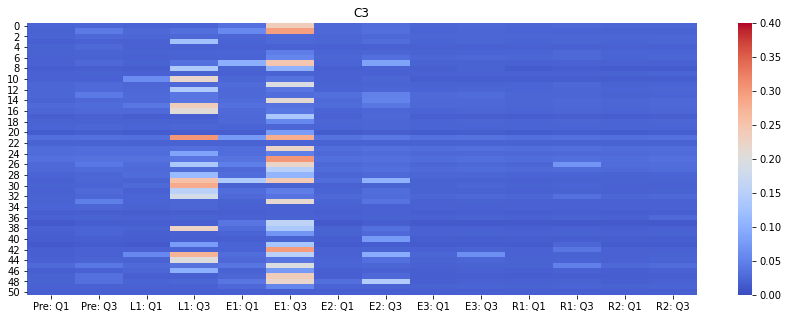

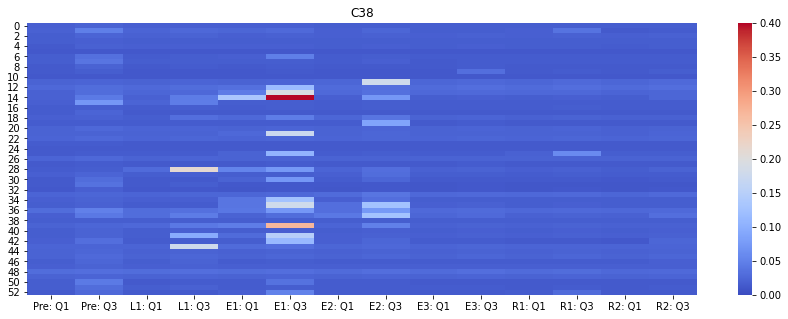

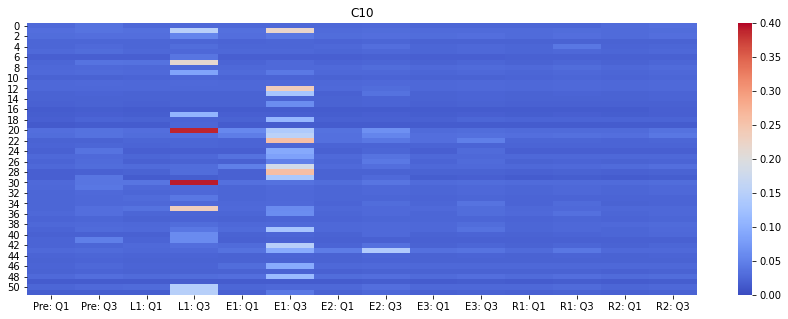

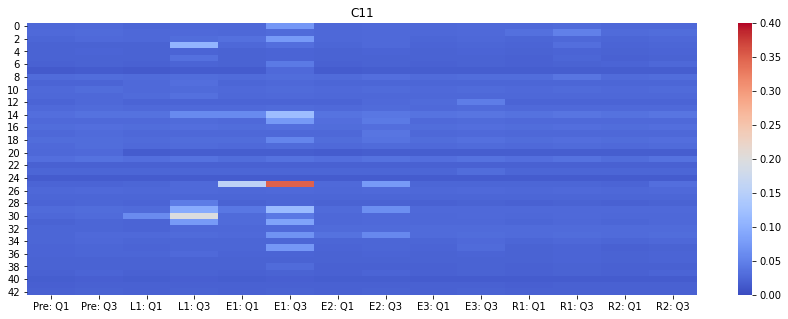

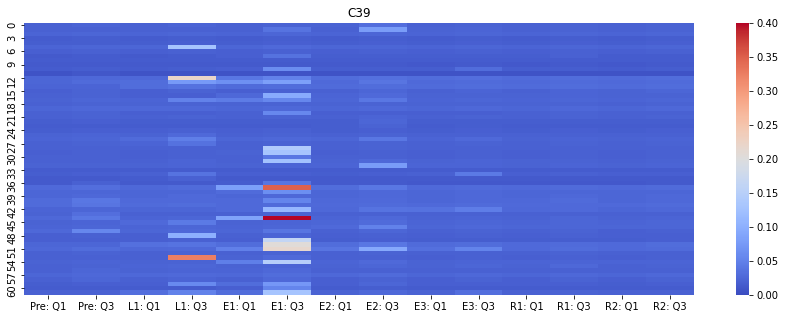

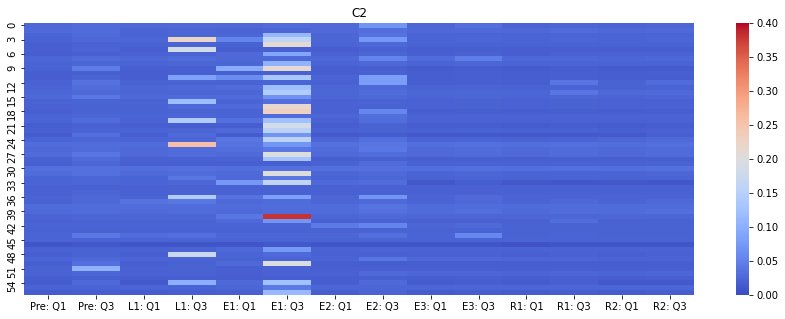

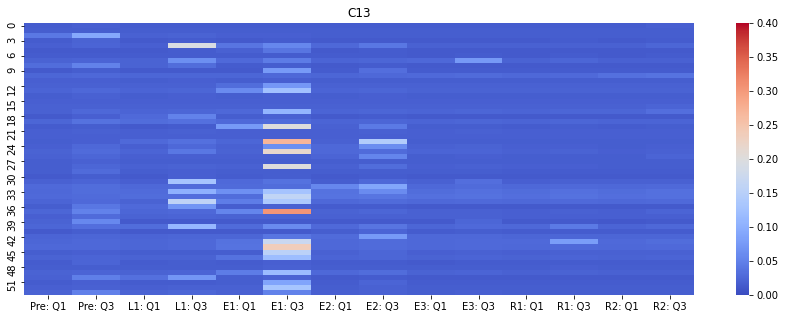

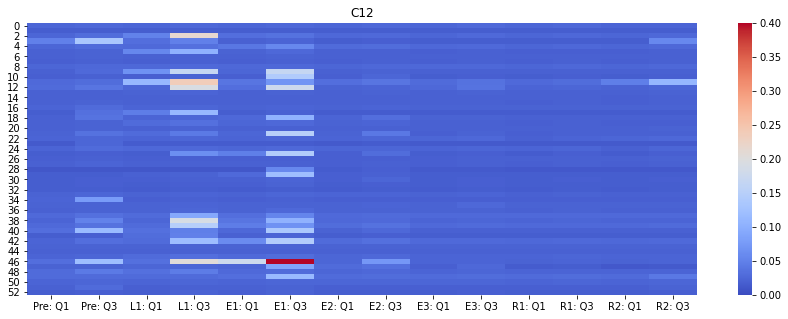

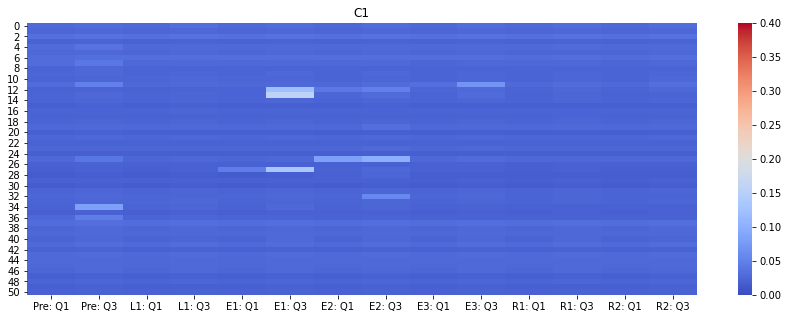

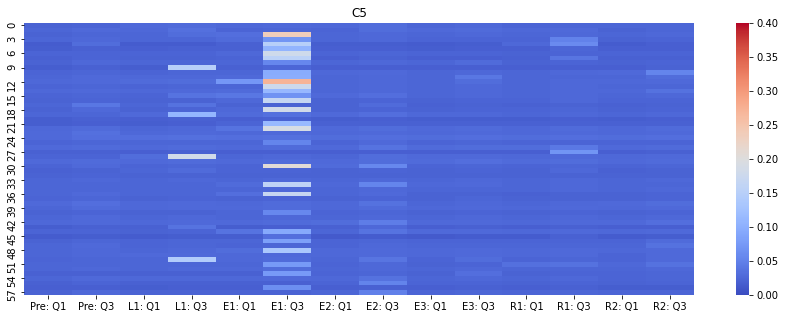

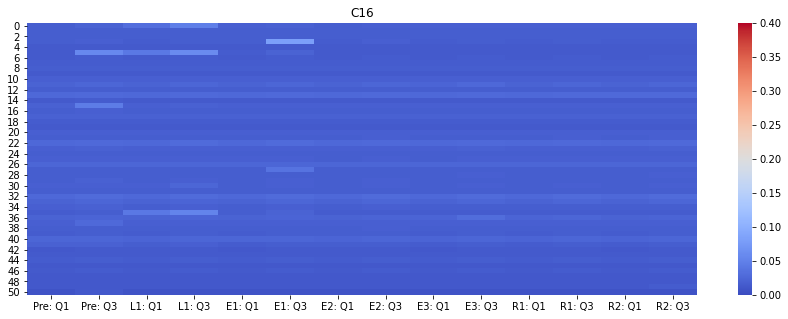

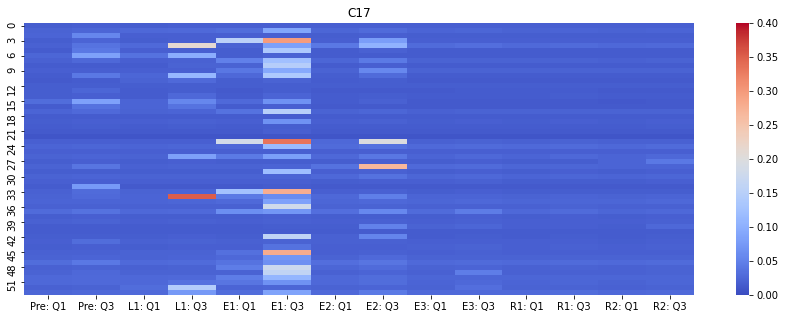

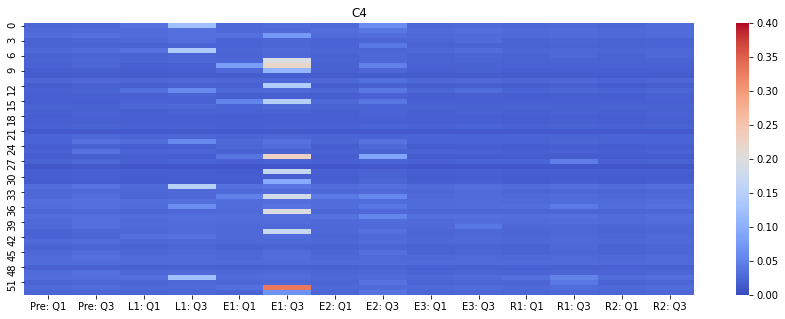

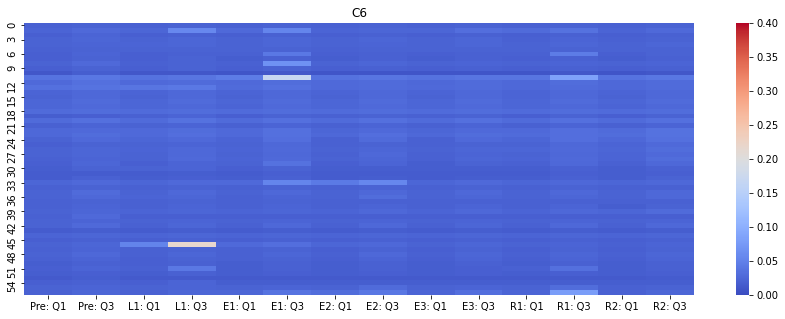

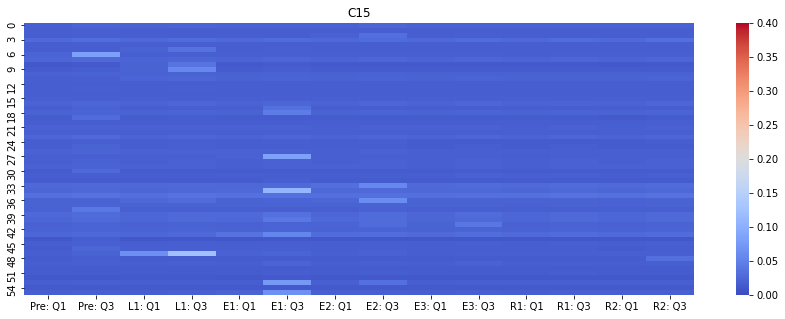

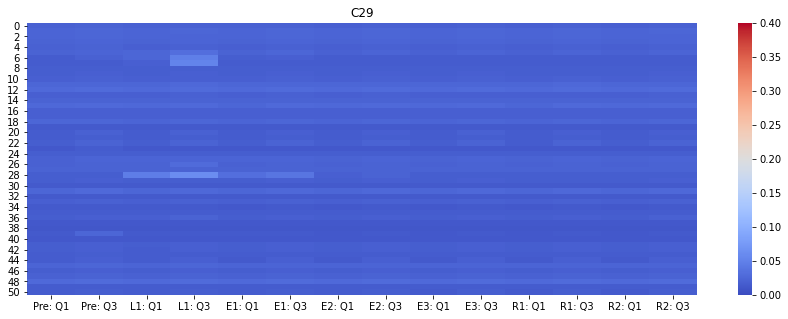

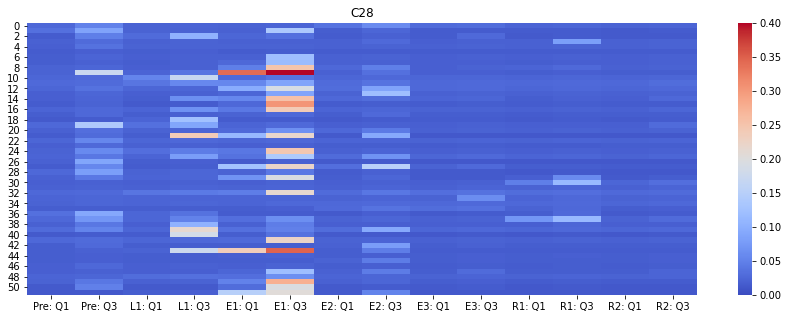

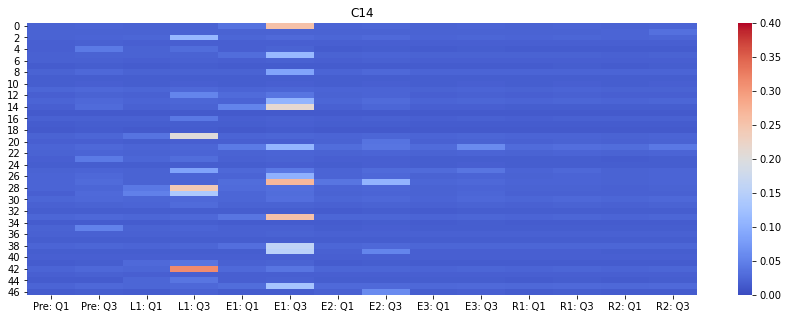

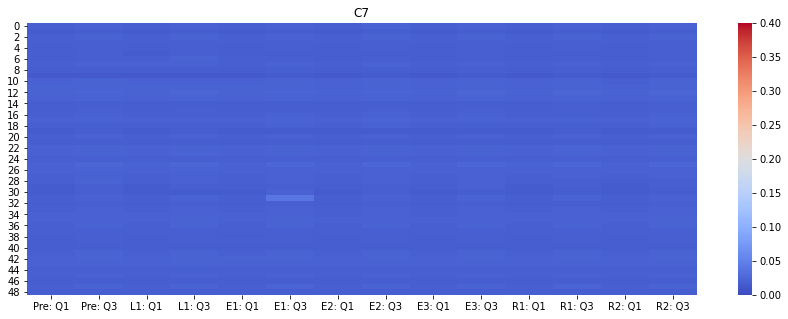

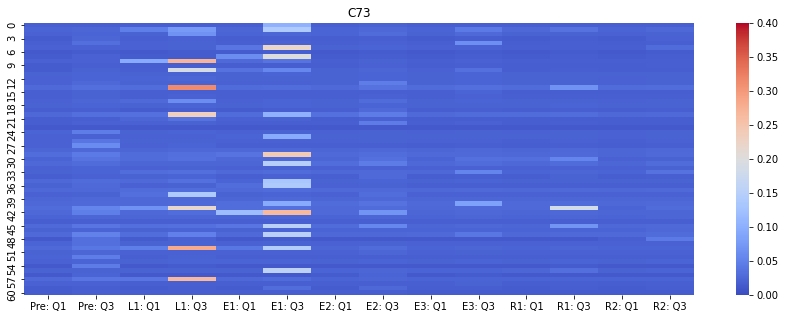

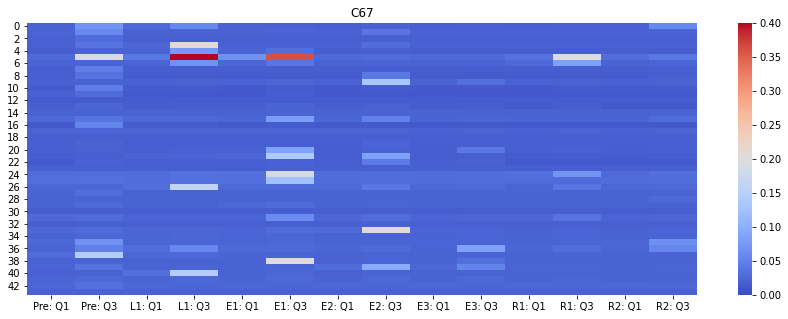

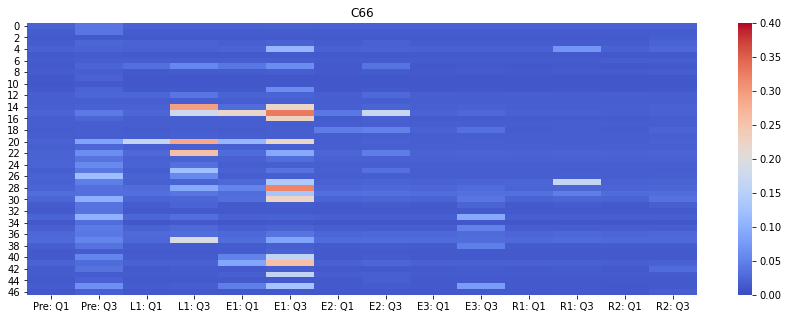

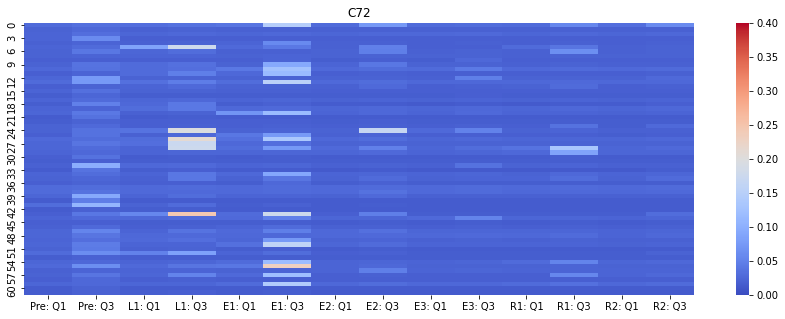

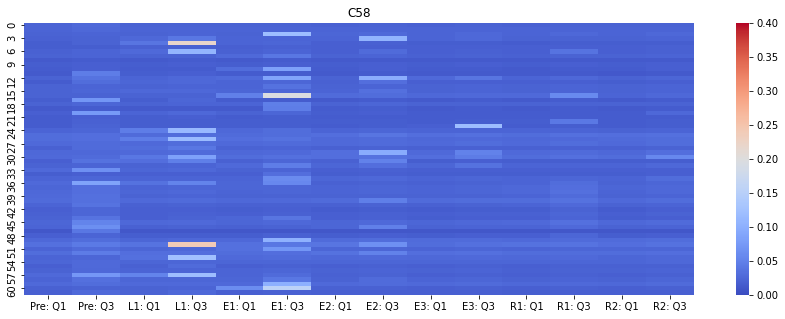

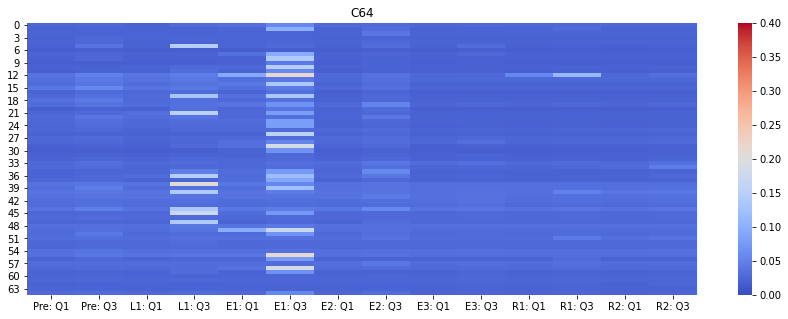

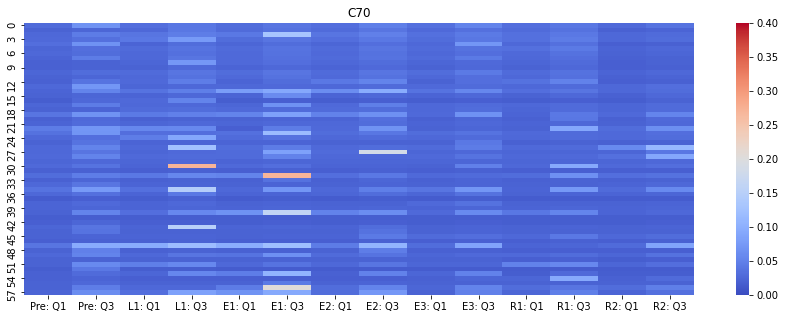

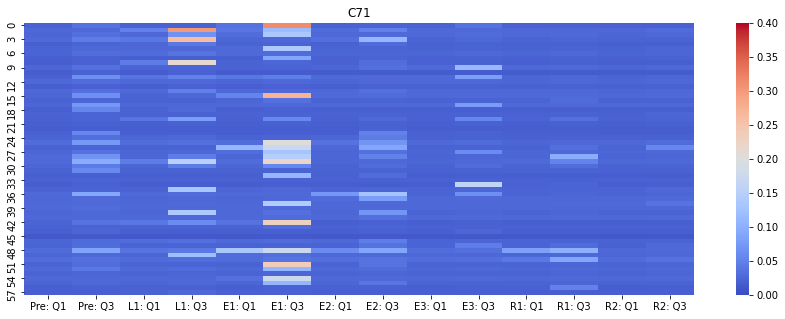

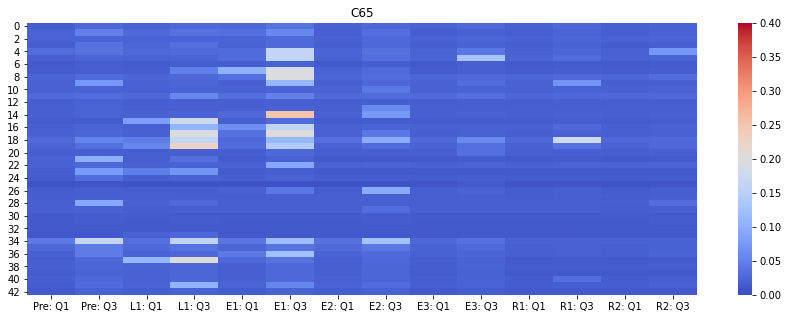

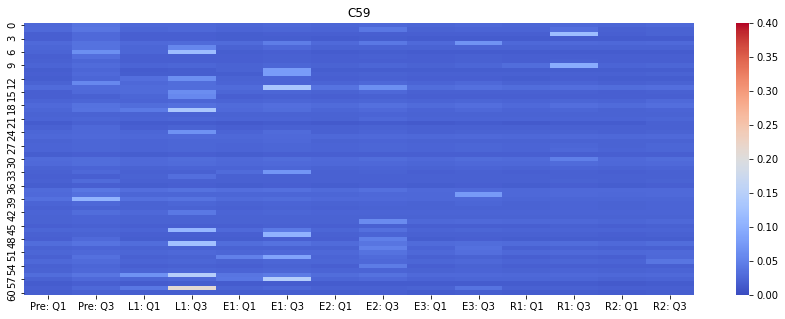

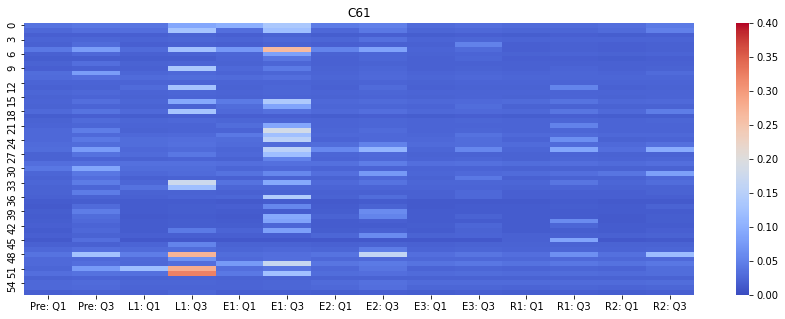

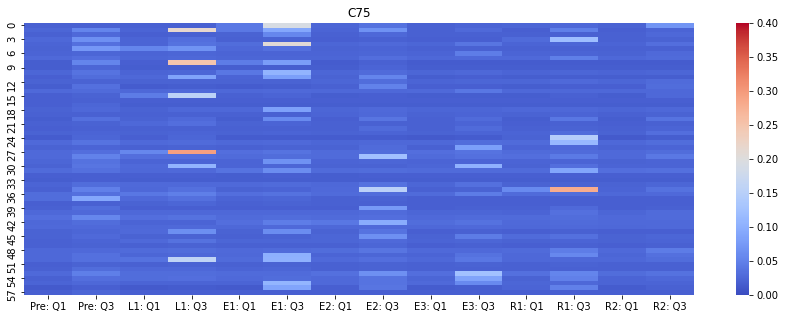

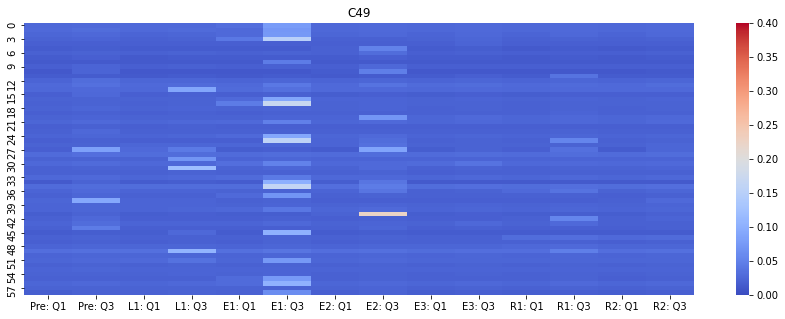

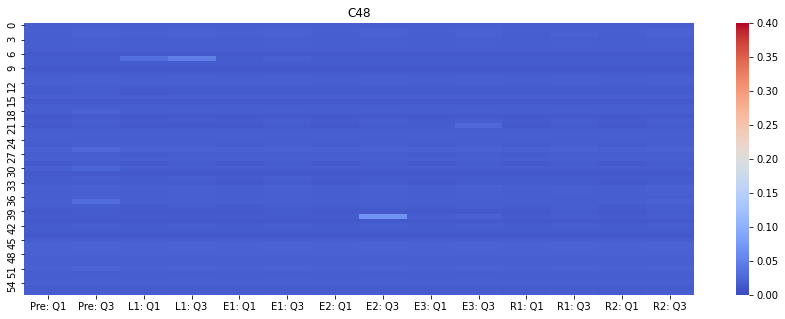

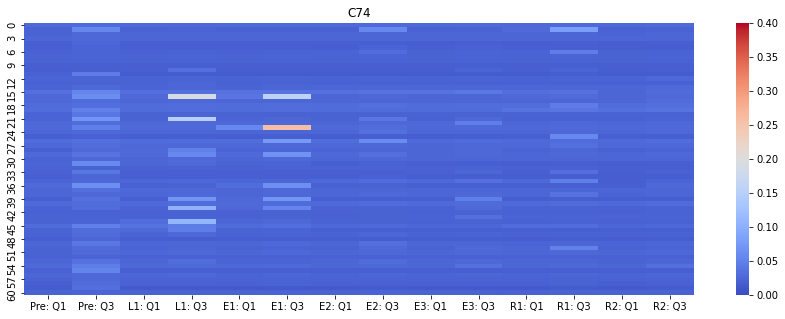

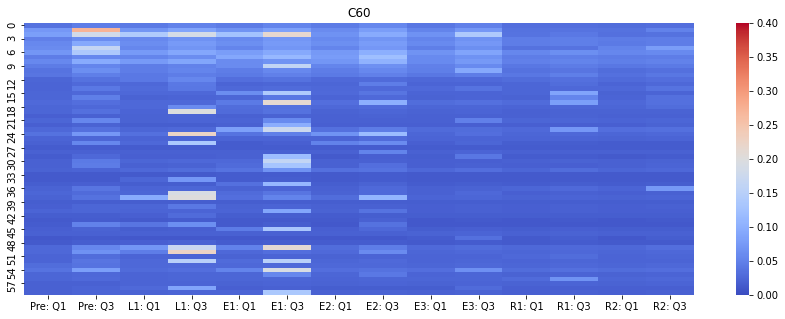

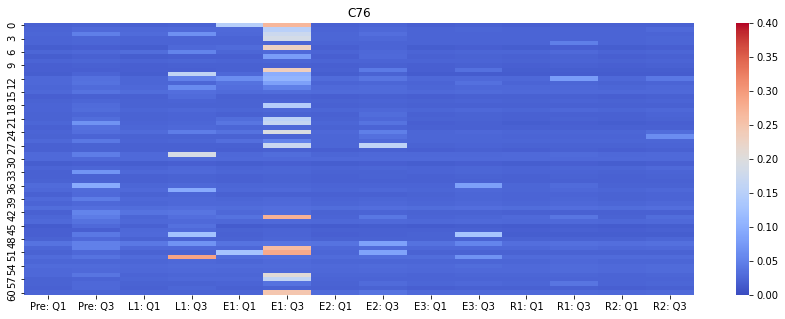

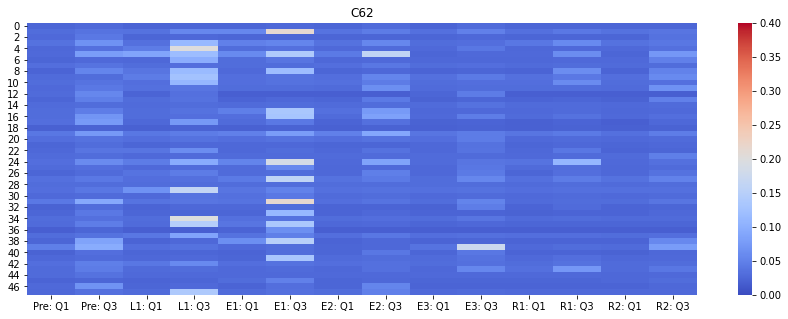

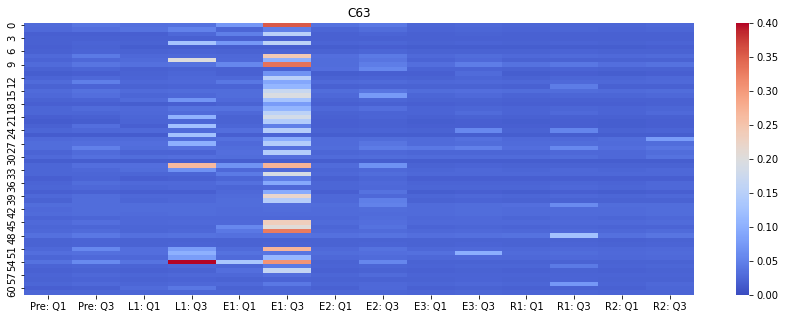

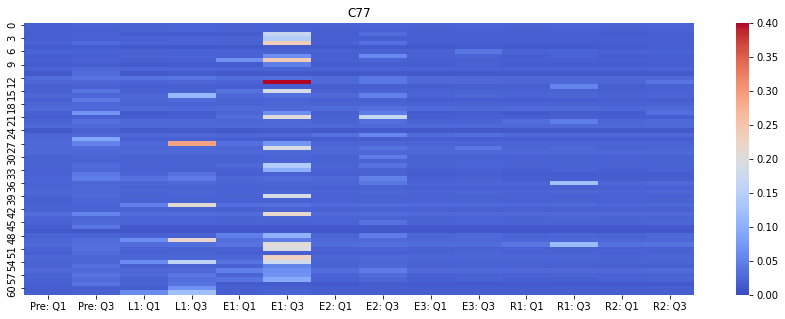

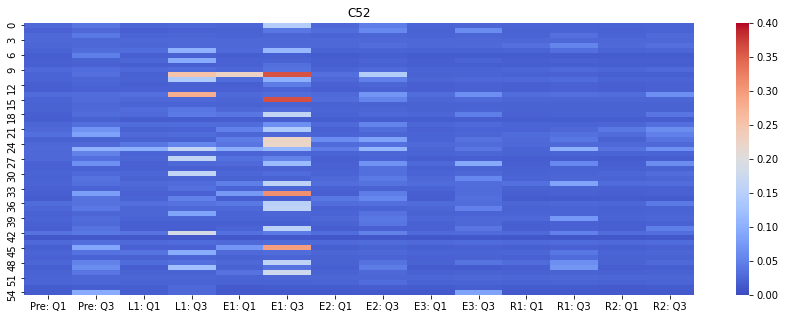

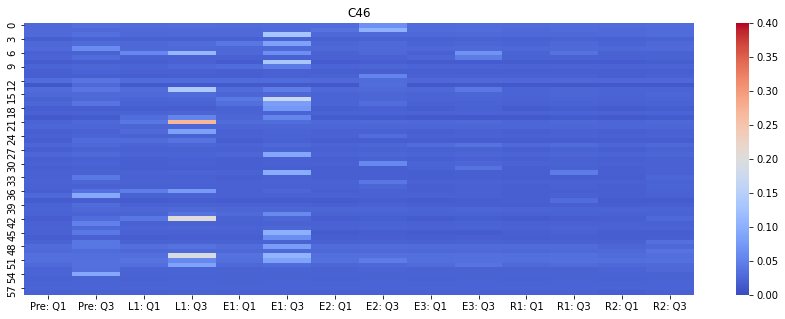

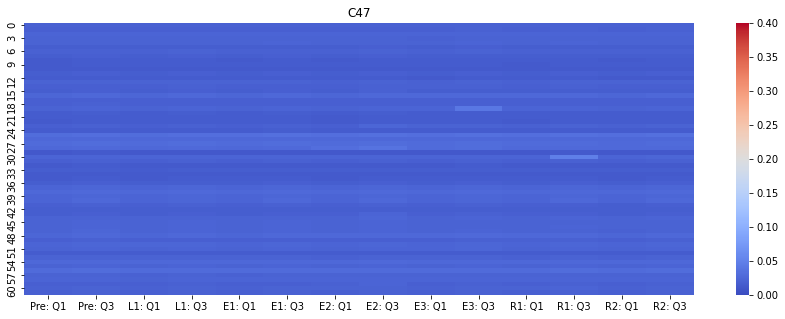

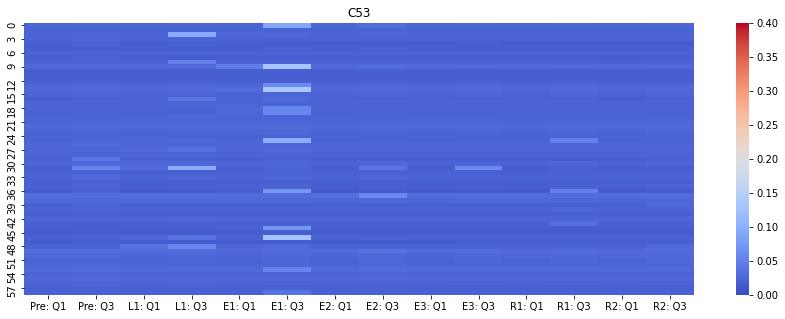

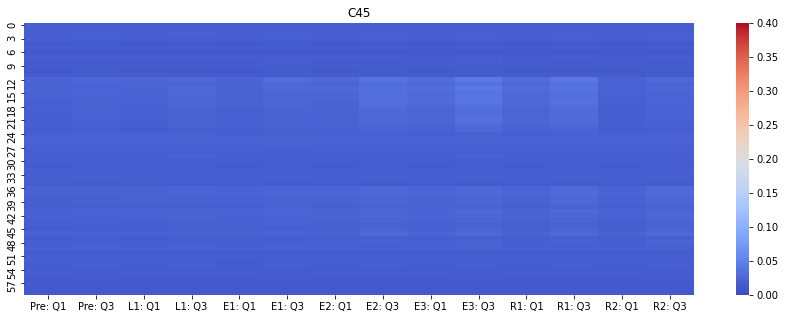

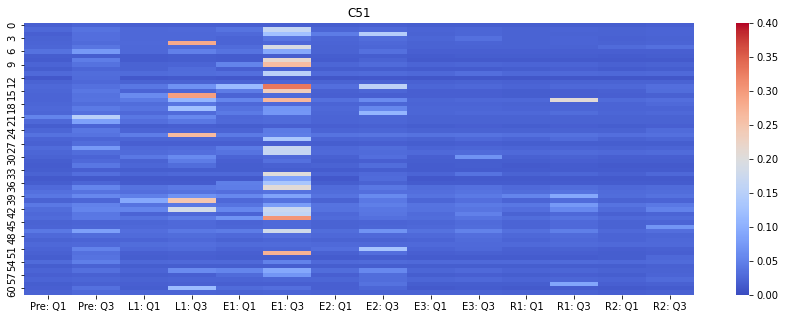

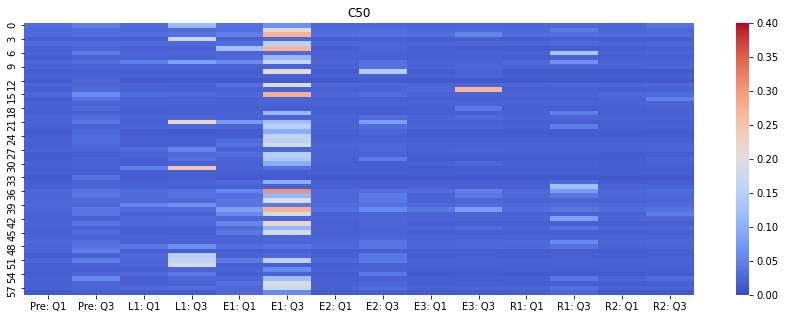

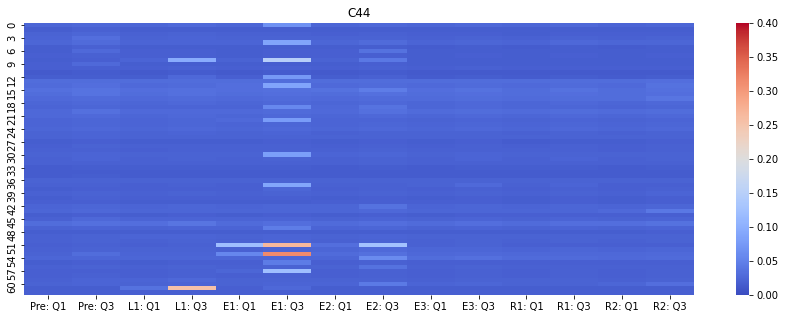

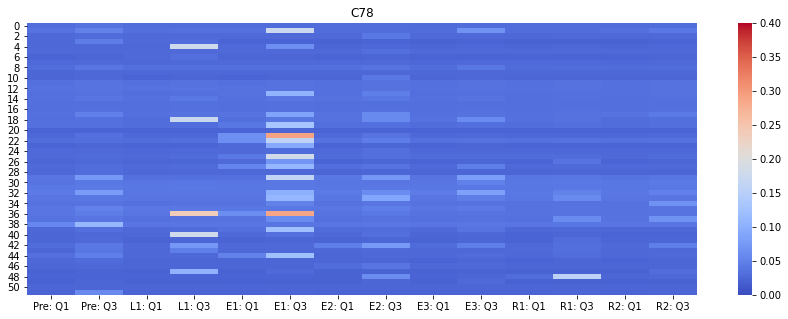

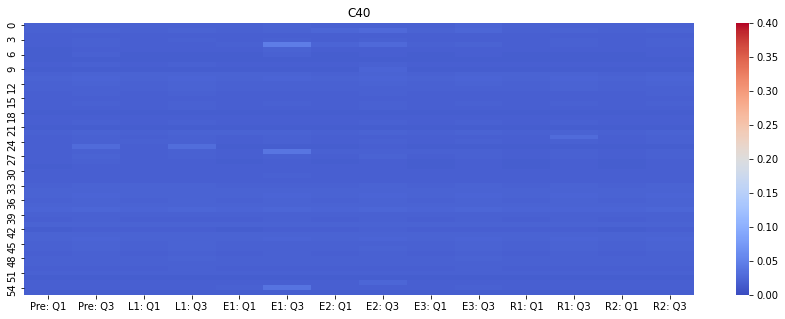

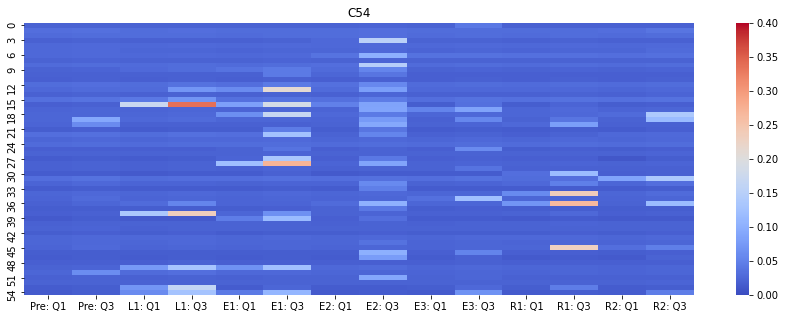

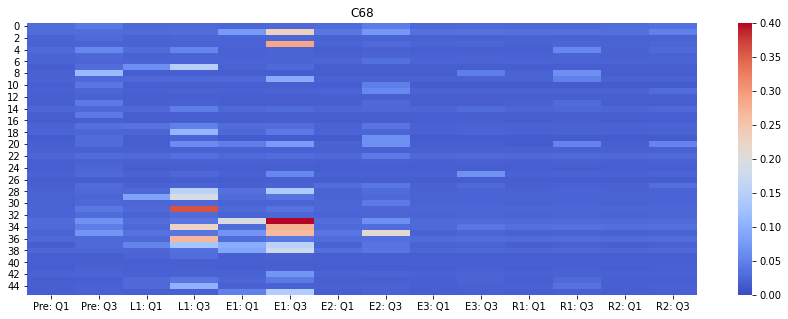

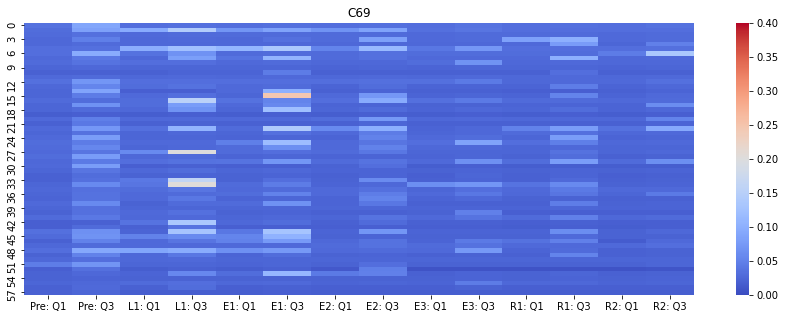

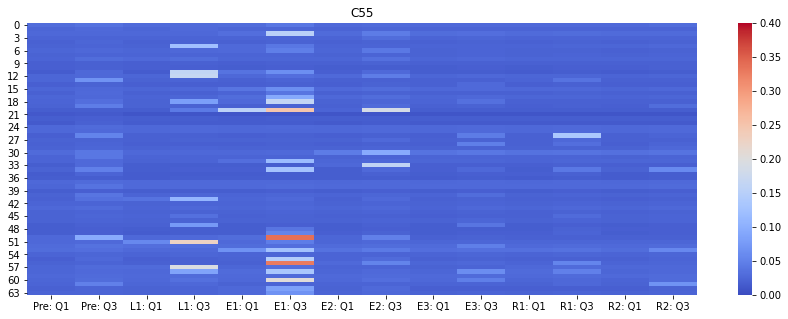

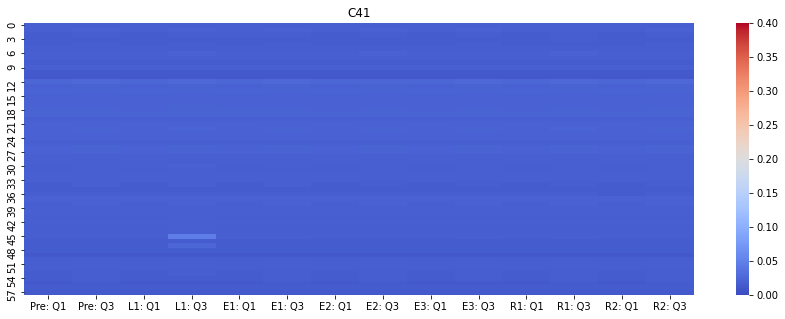

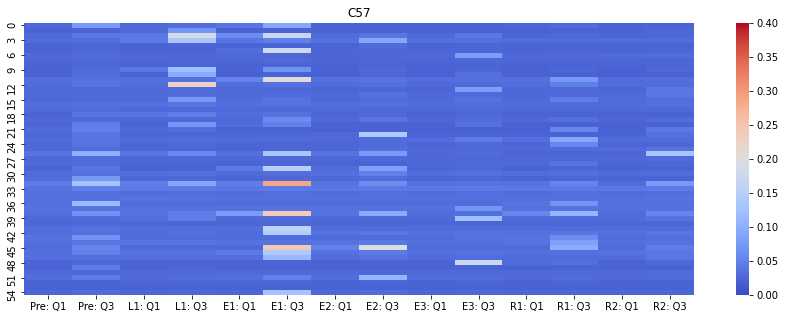

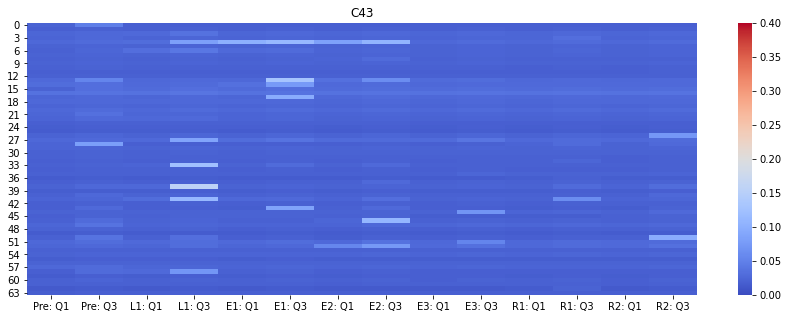

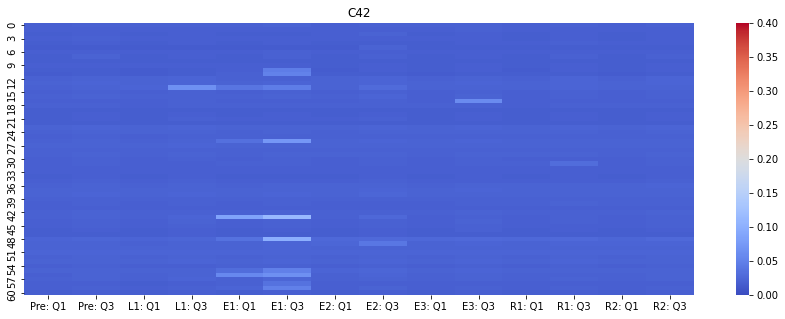

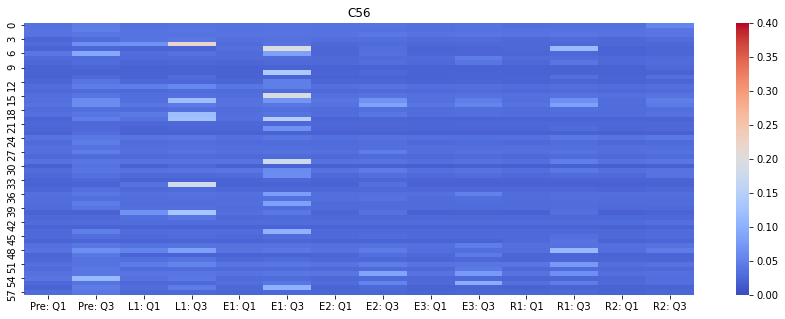

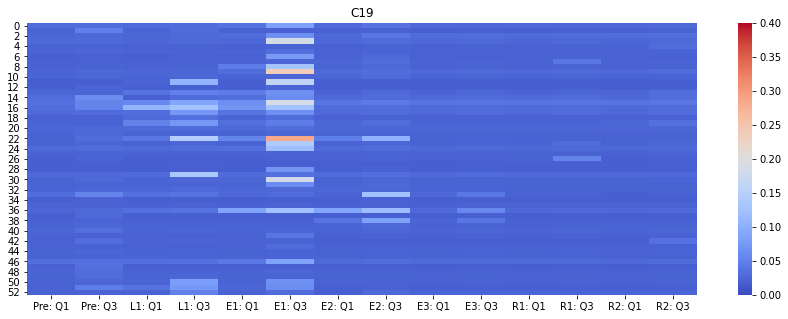

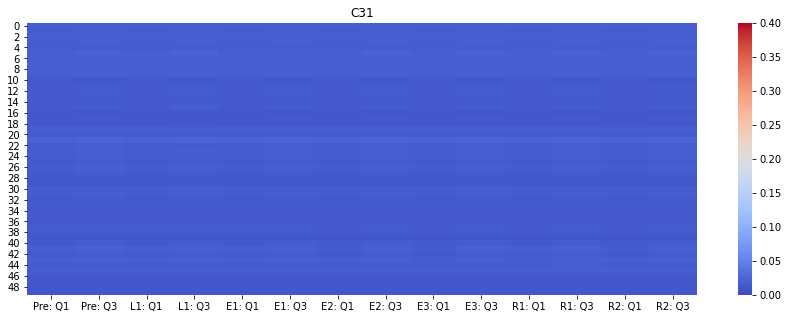

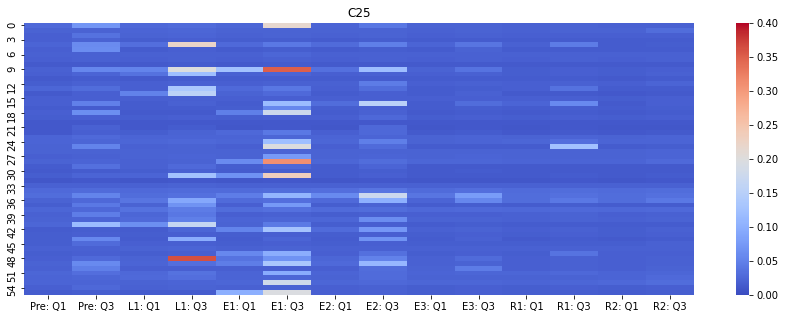

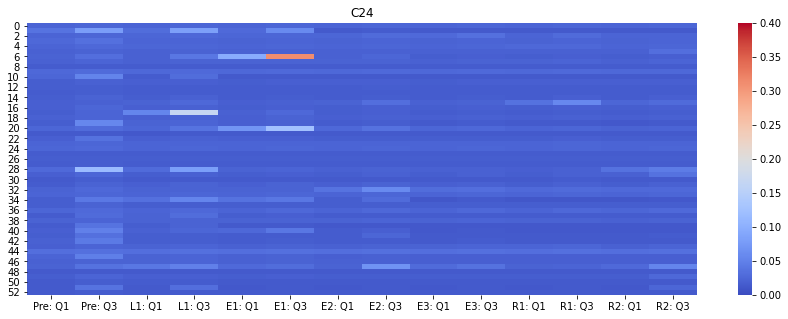

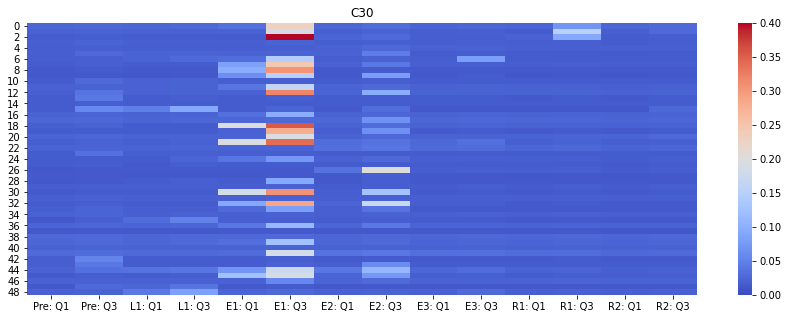

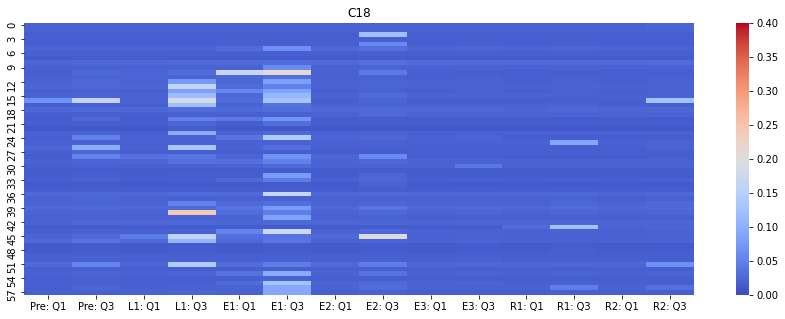

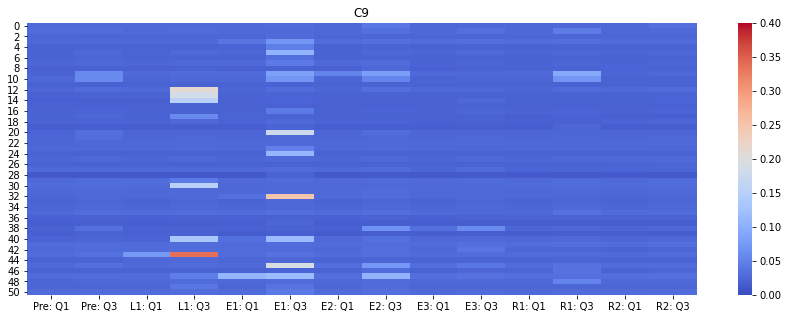

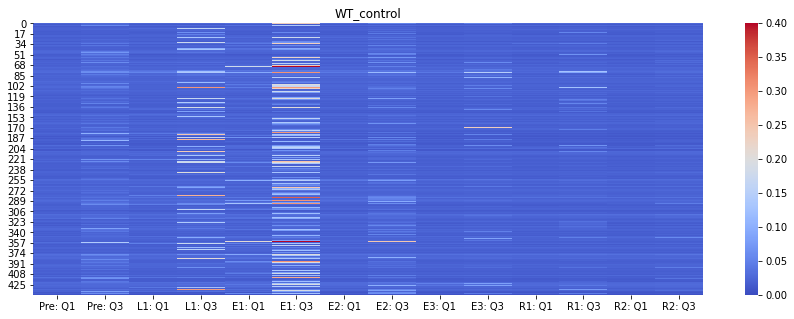

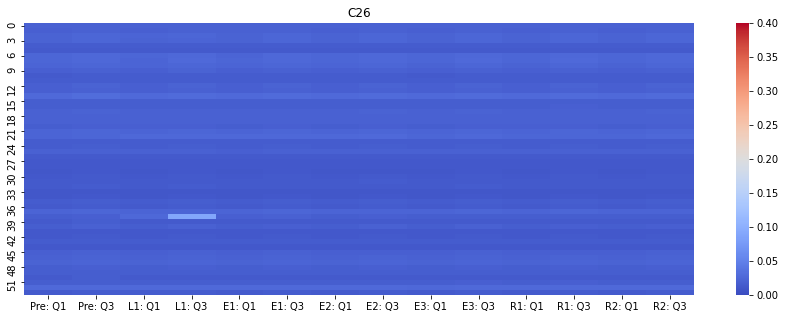

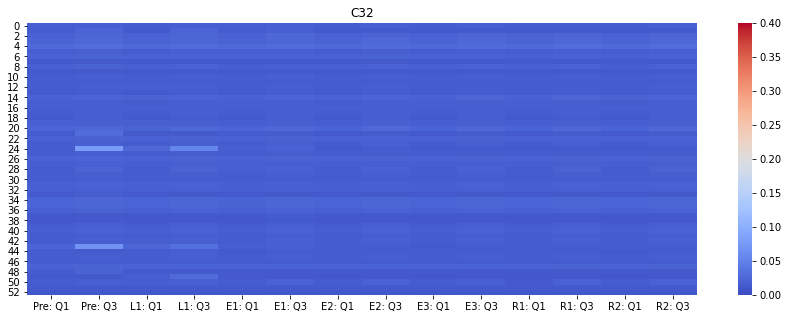

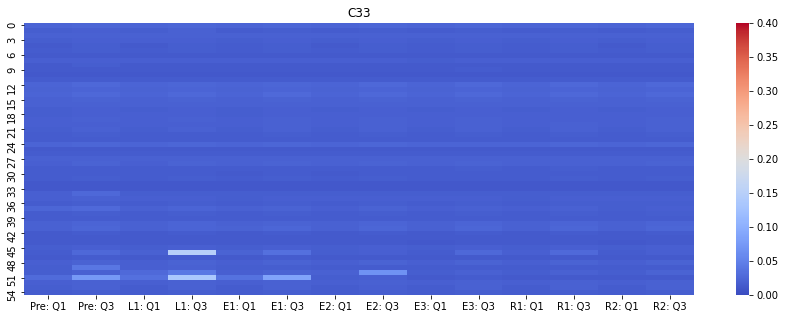

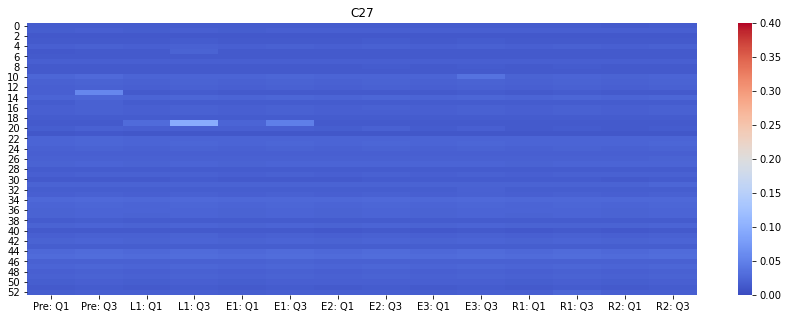

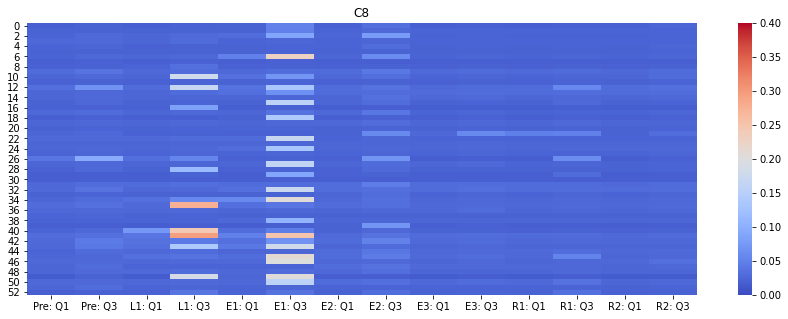

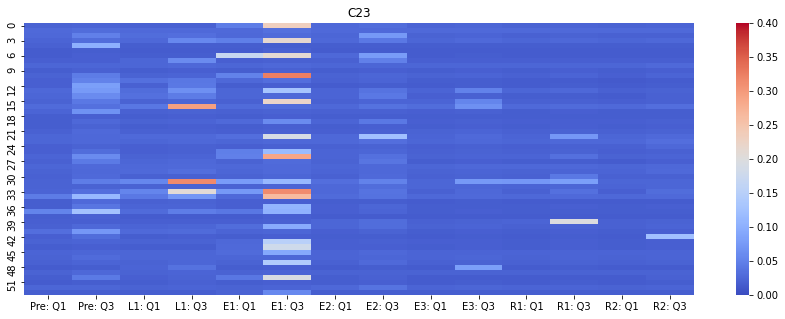

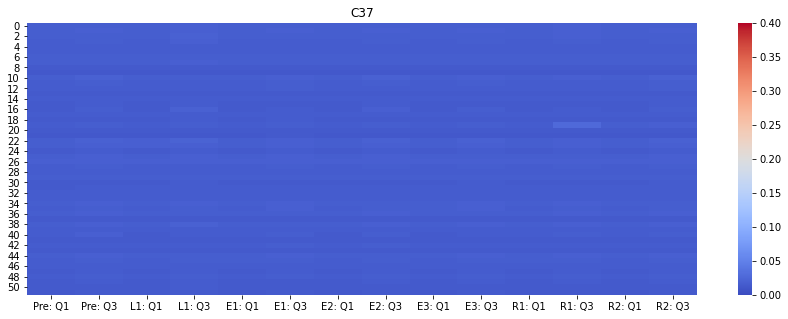

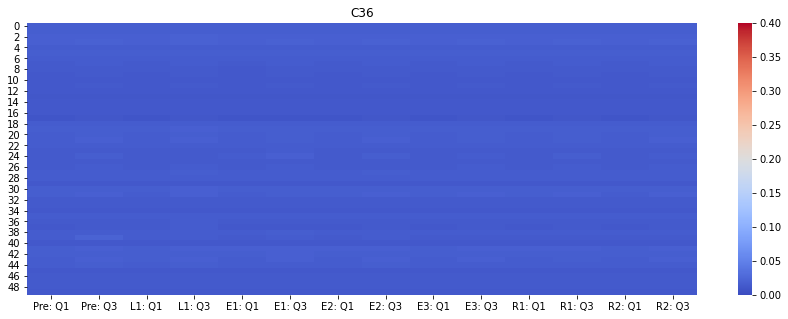

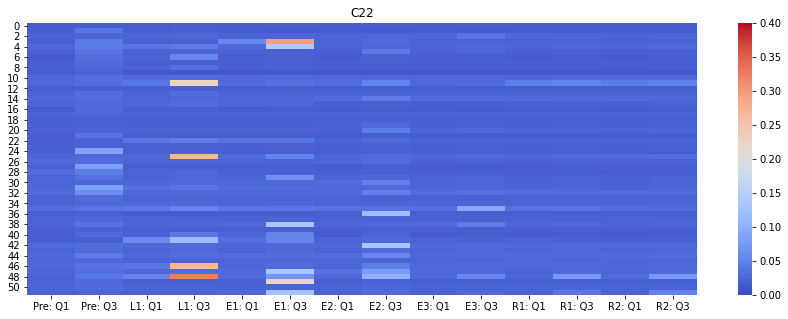

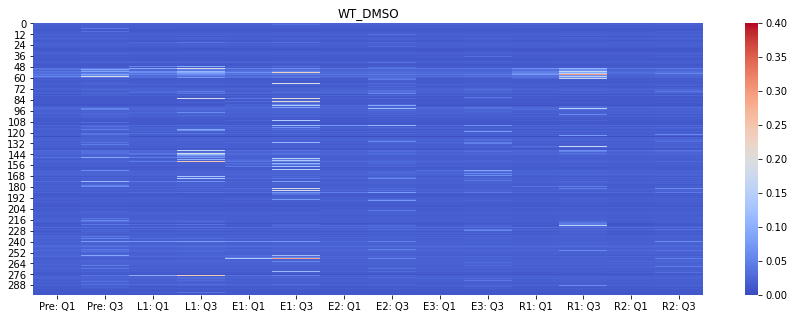

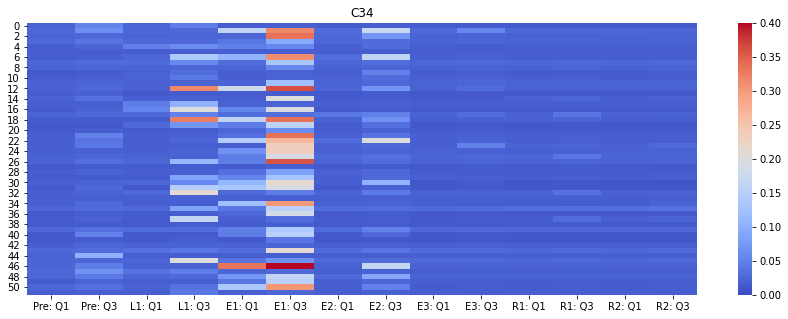

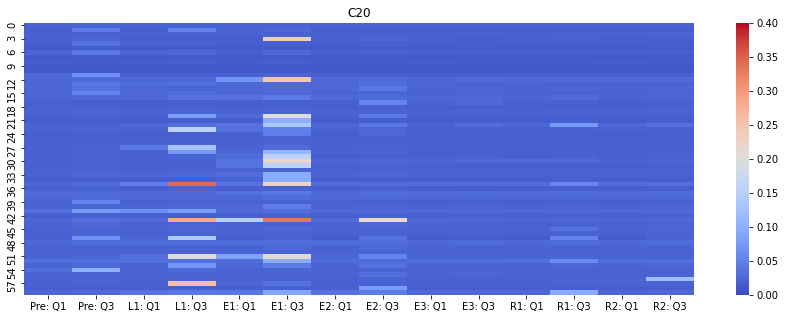

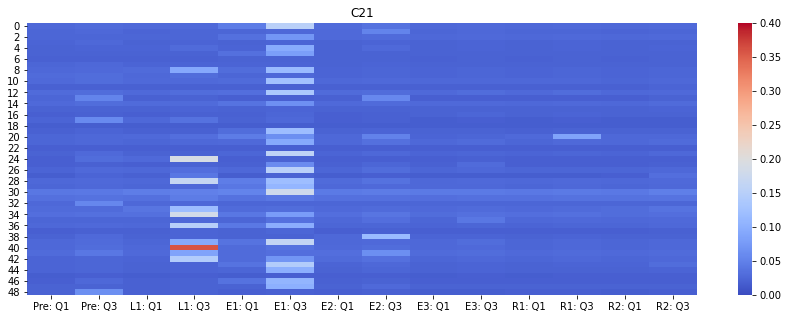

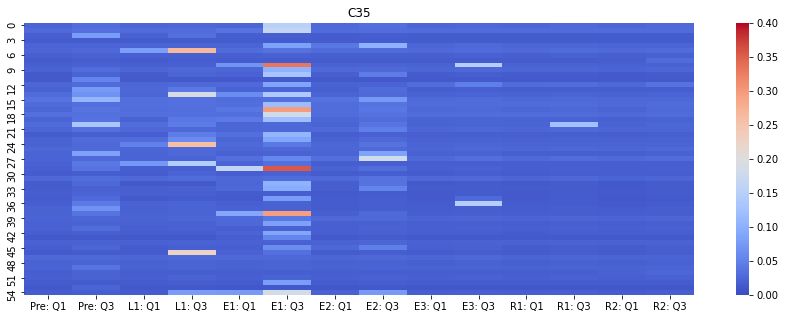

In [145]:
Heatmap_file = glob.glob("./data_14features/*.csv")

for f in Heatmap_file:
    f_name = os.path.basename(f)
    f_name = f_name[:-4]
    df = pd.read_csv(f)
    
    fig = plt.figure(figsize=(15, 5))
    heatmap = sns.heatmap(data=df, cmap="coolwarm", vmin=0, vmax=0.4, robust=True)
    heatmap.set_title("{0}".format(f_name))
    plt.savefig("./png/heatmap_png/{0}.png".format(f_name), dpi=300)



<ipython-input-146-e1070cf6c457>:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(15,8))


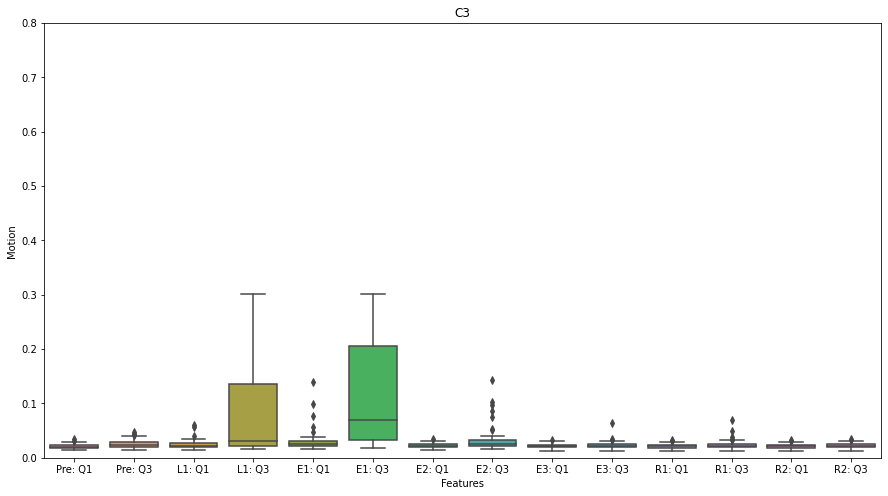

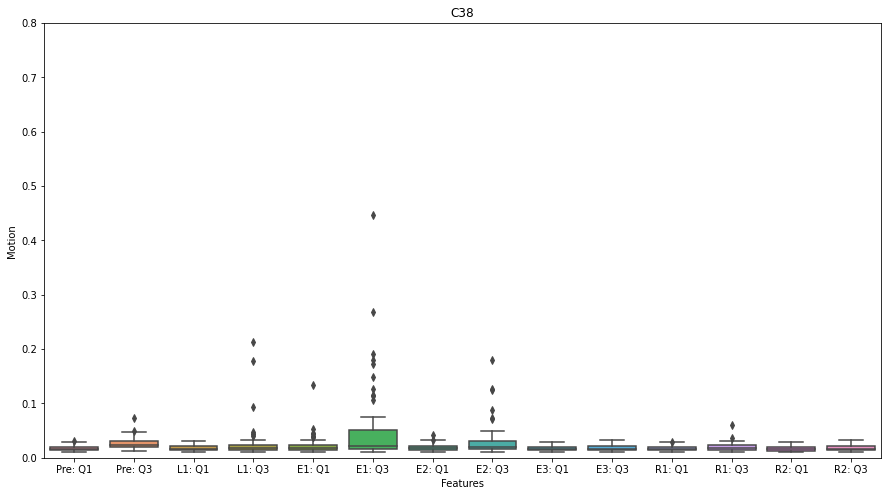

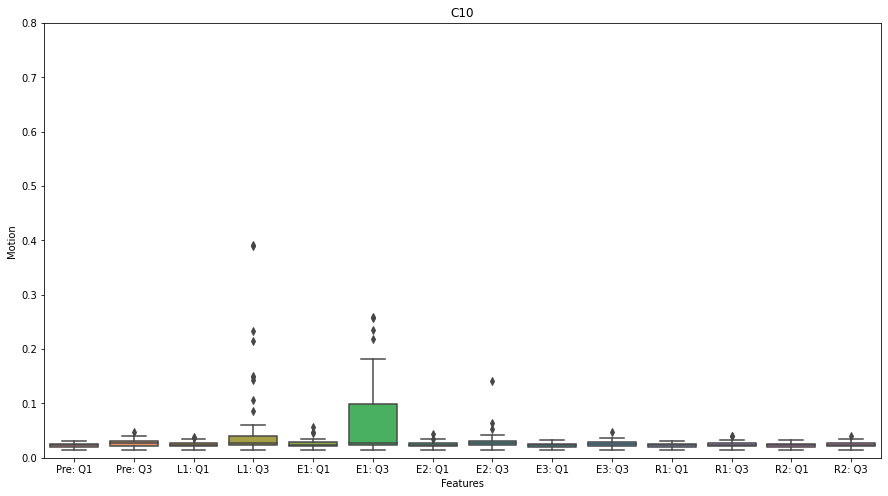

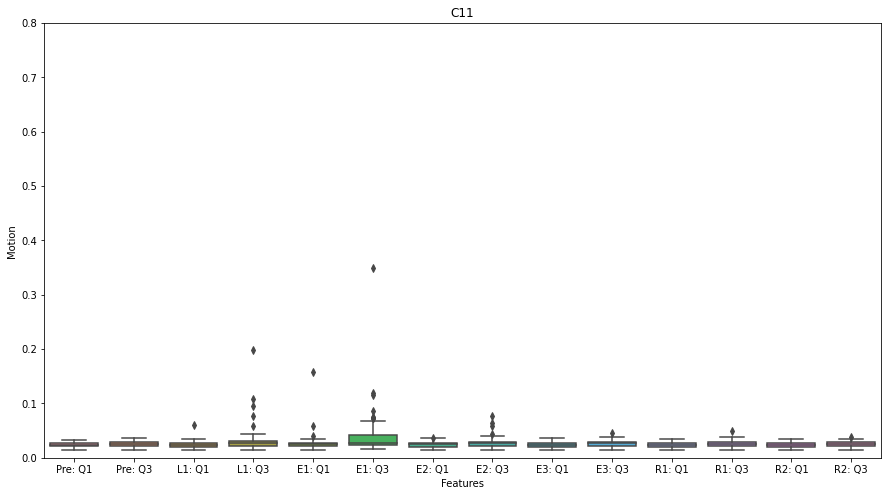

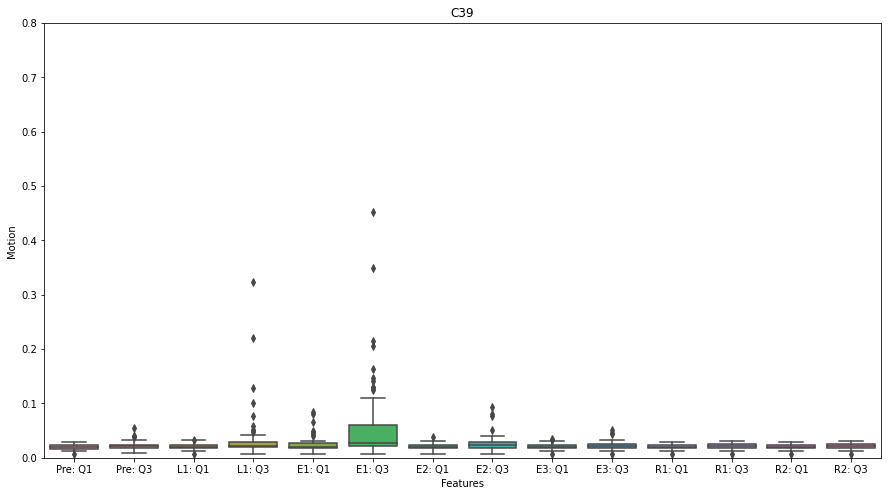

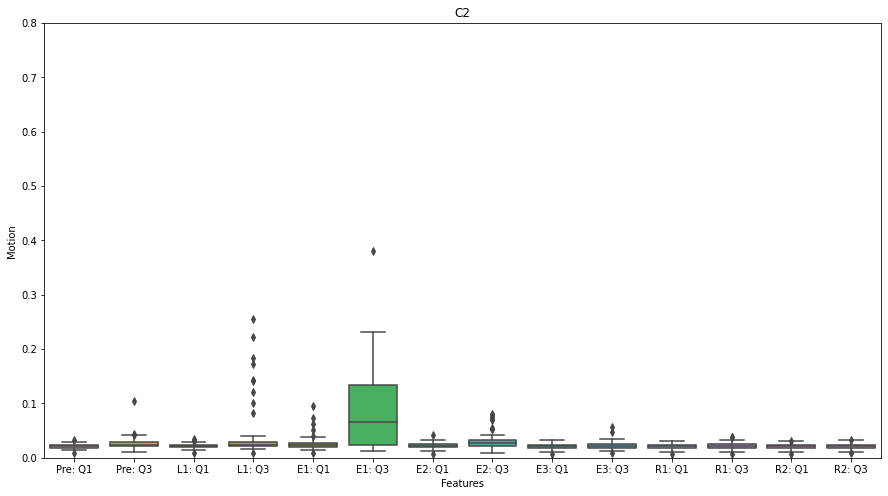

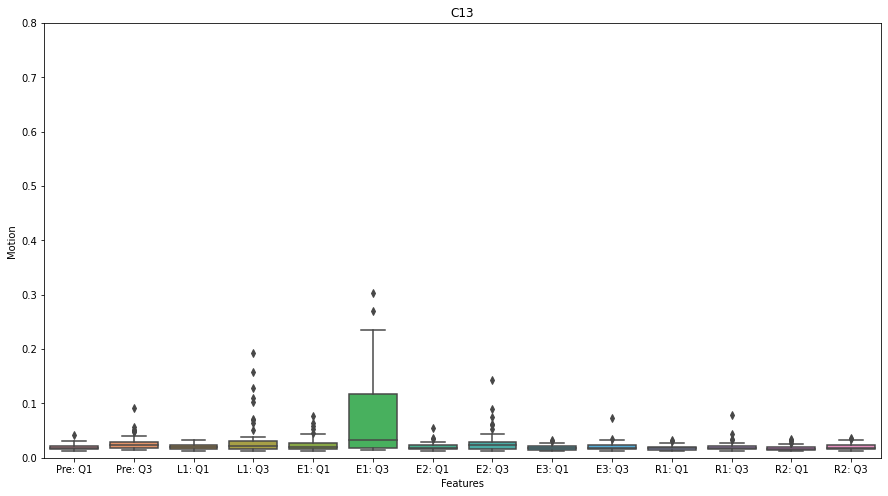

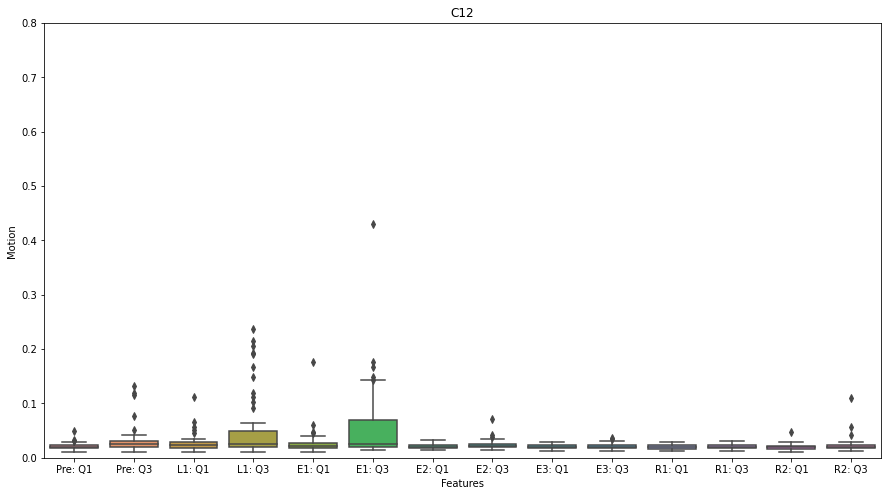

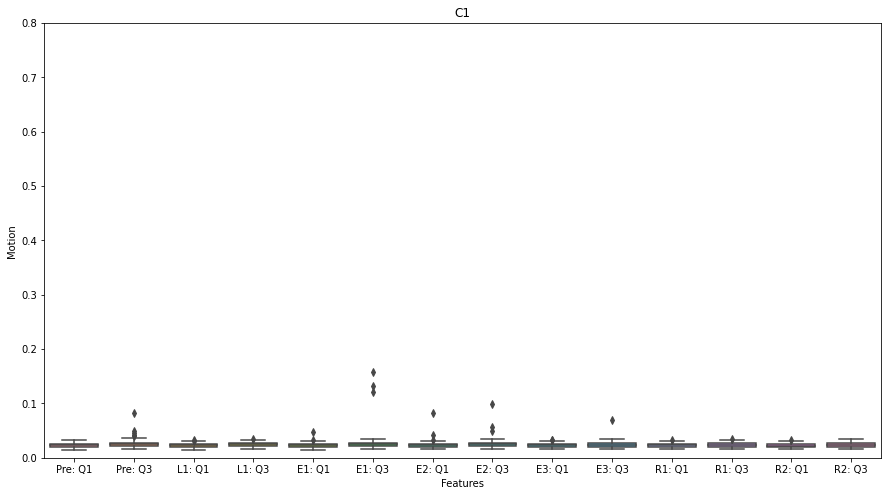

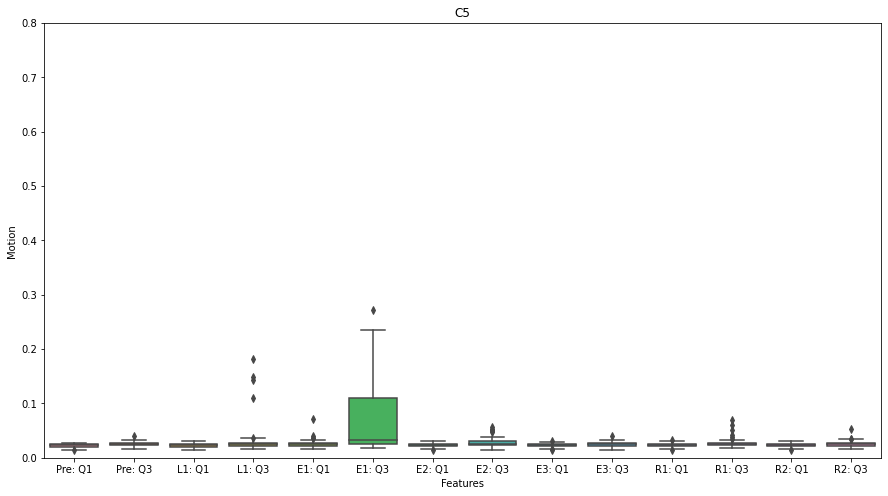

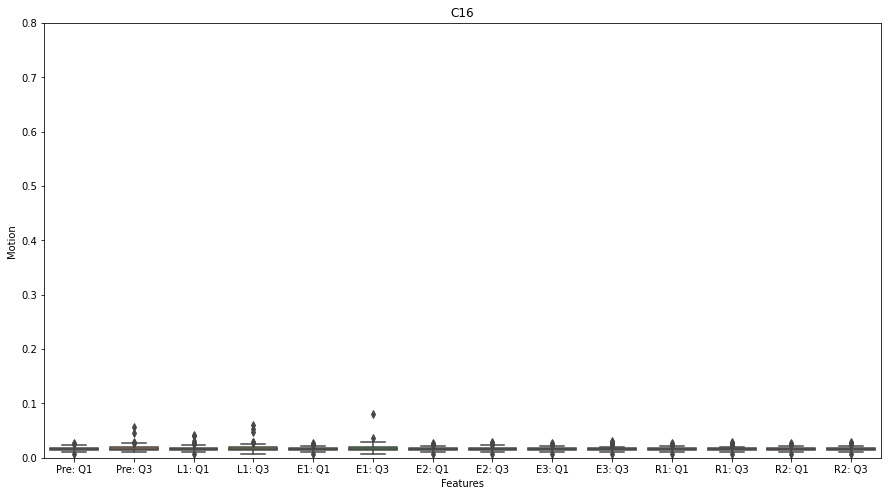

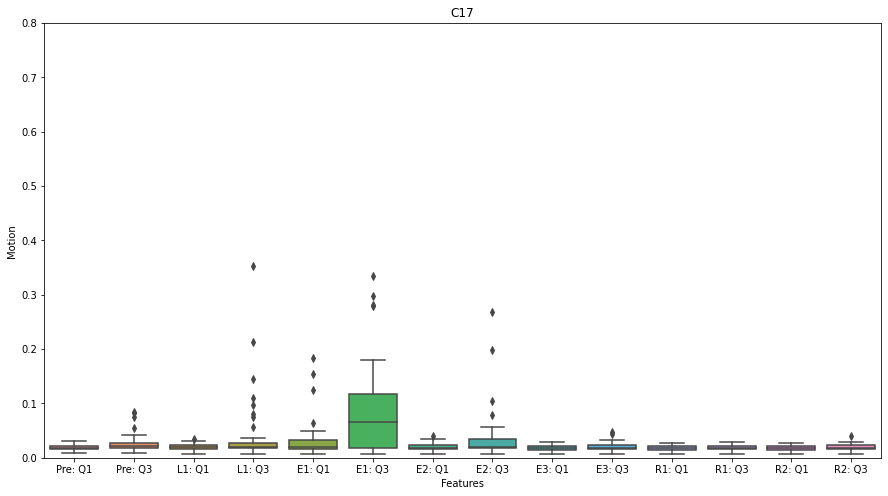

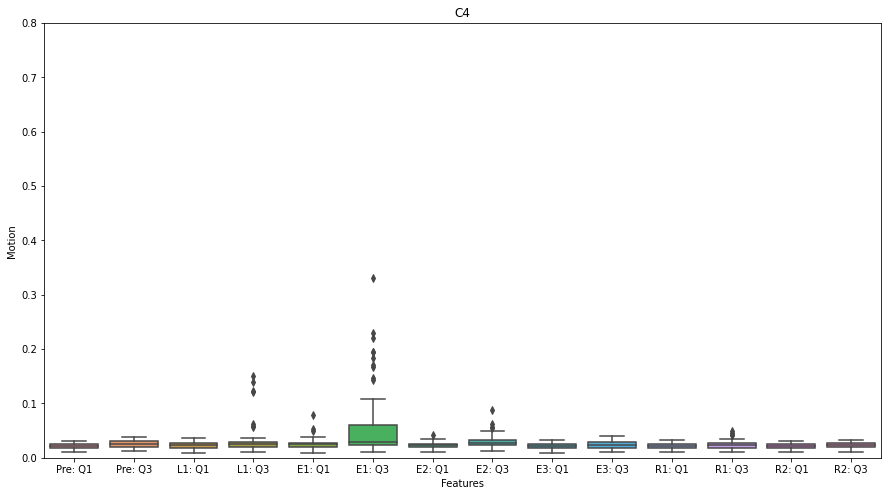

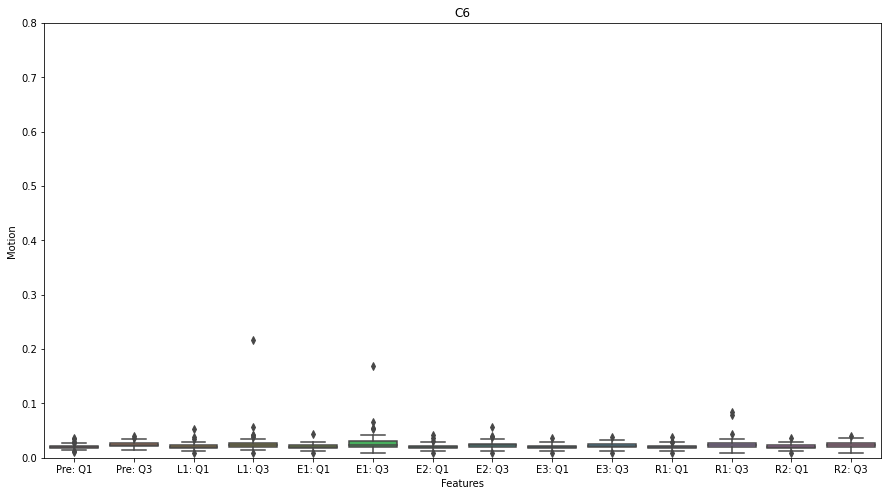

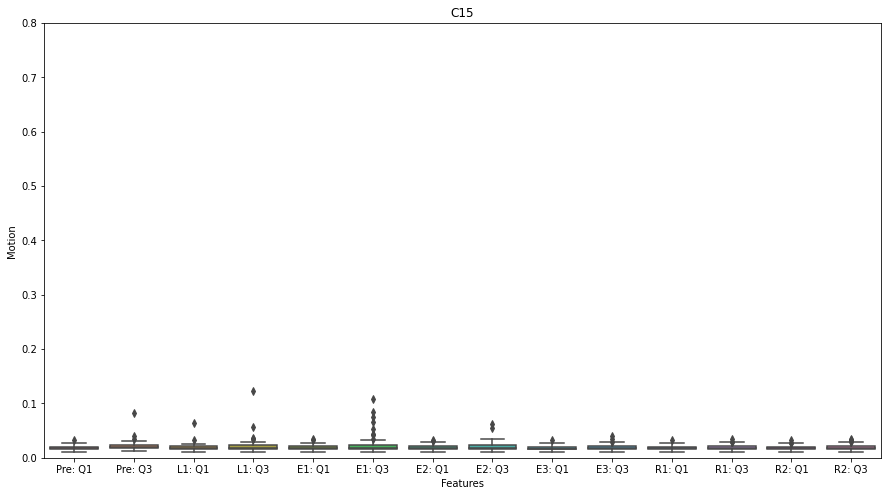

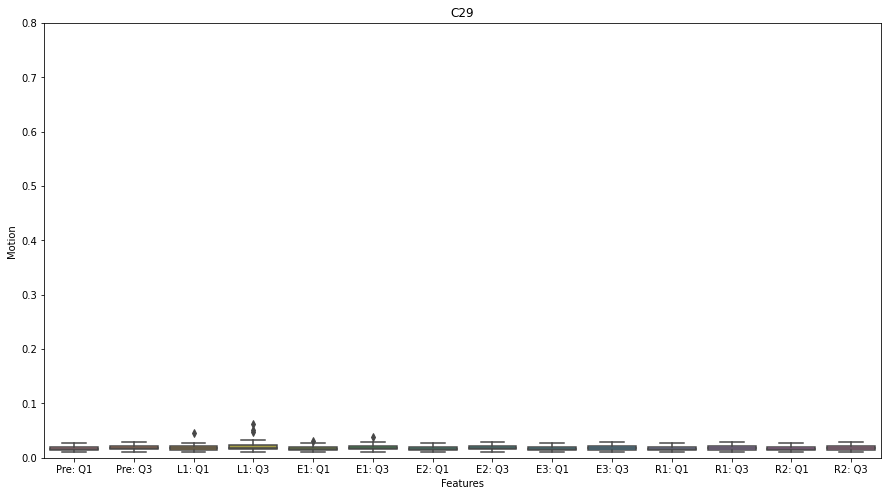

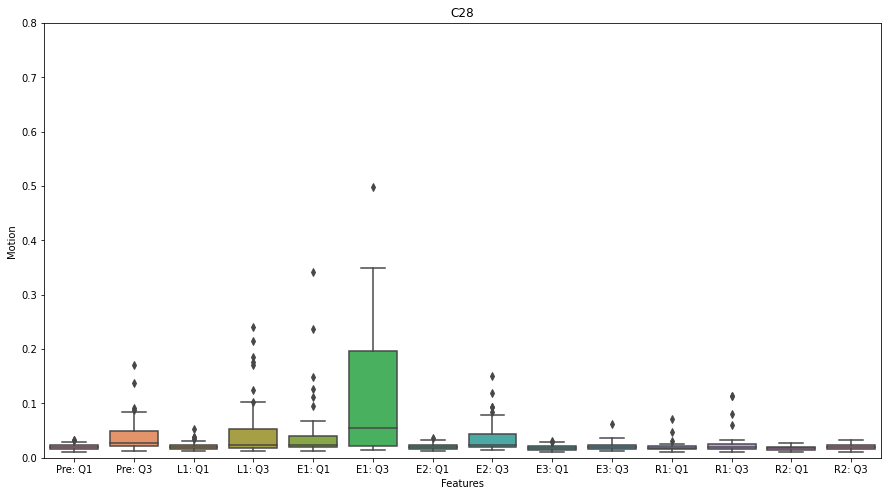

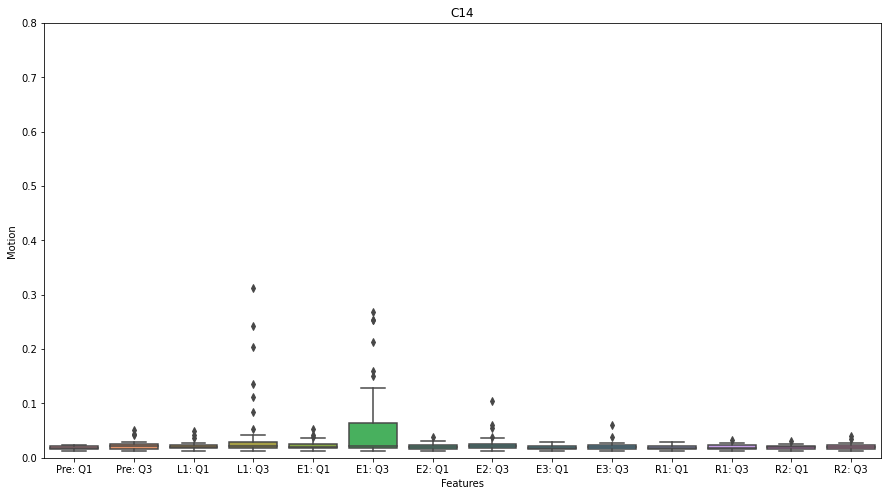

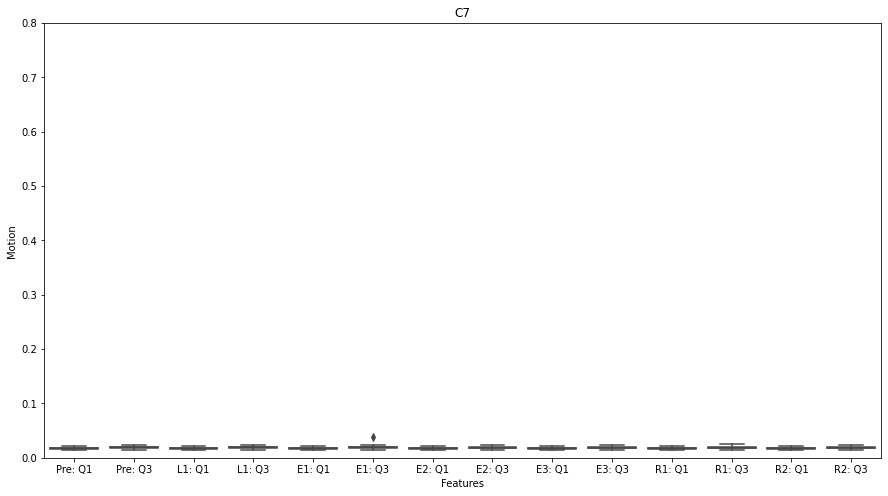

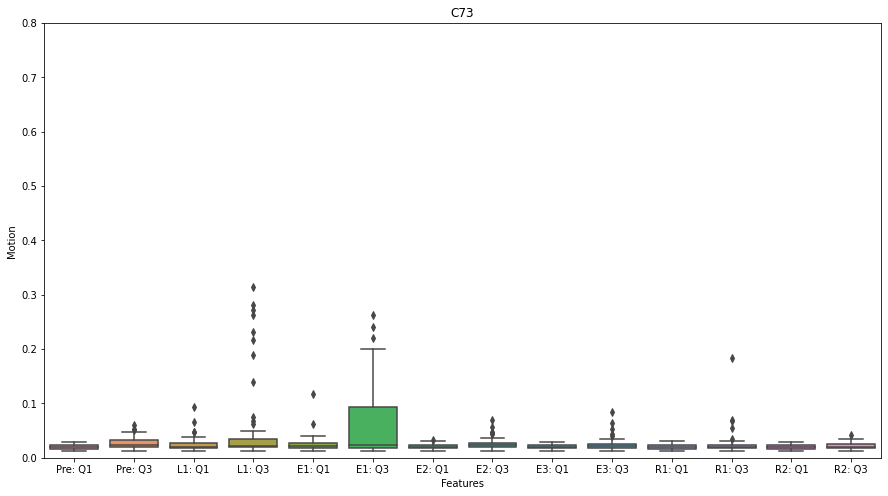

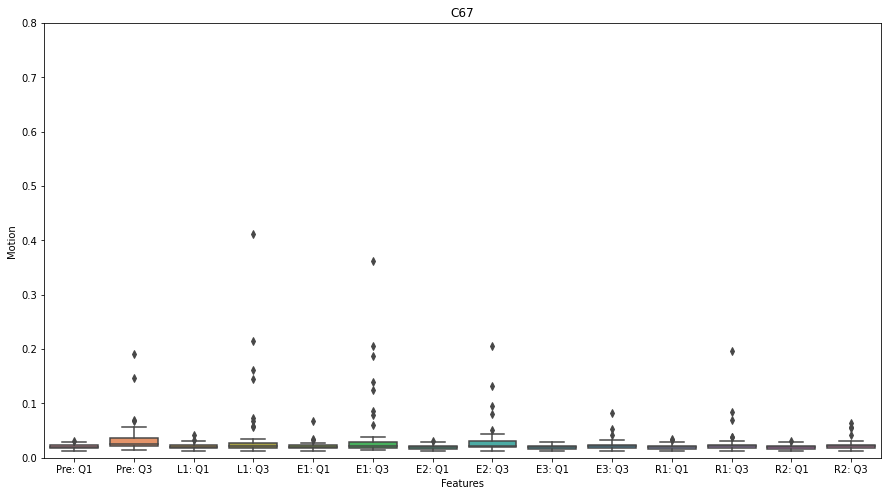

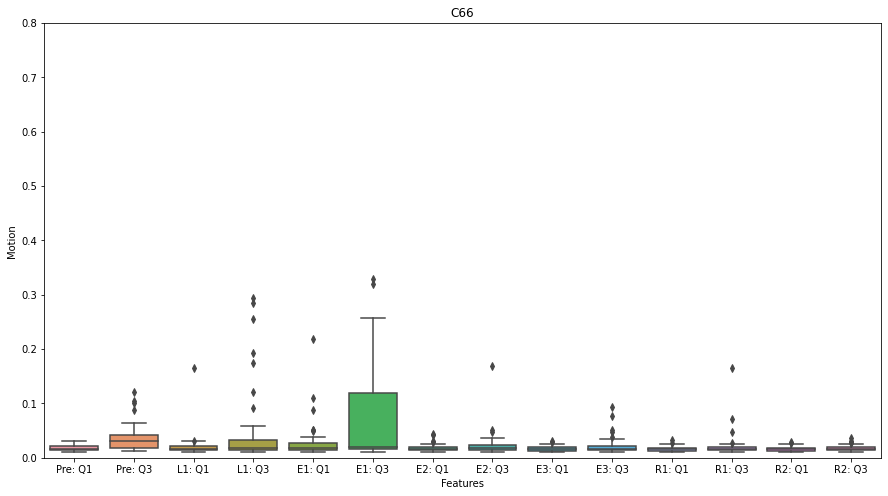

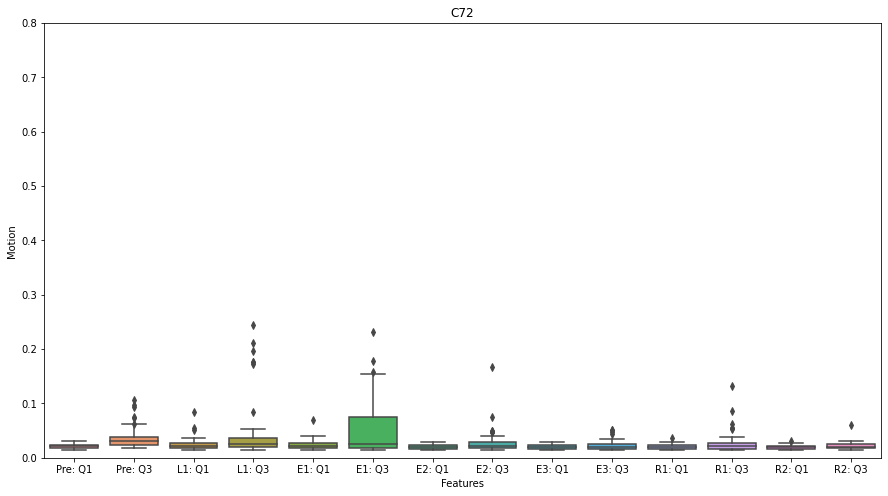

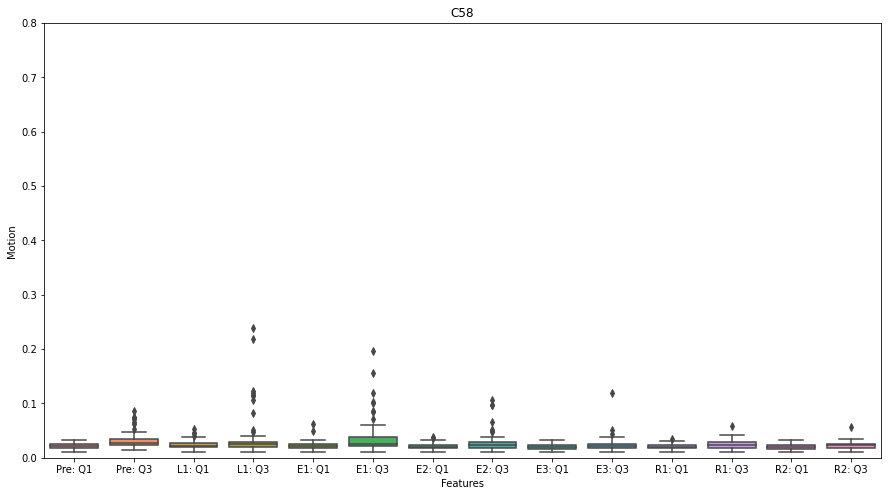

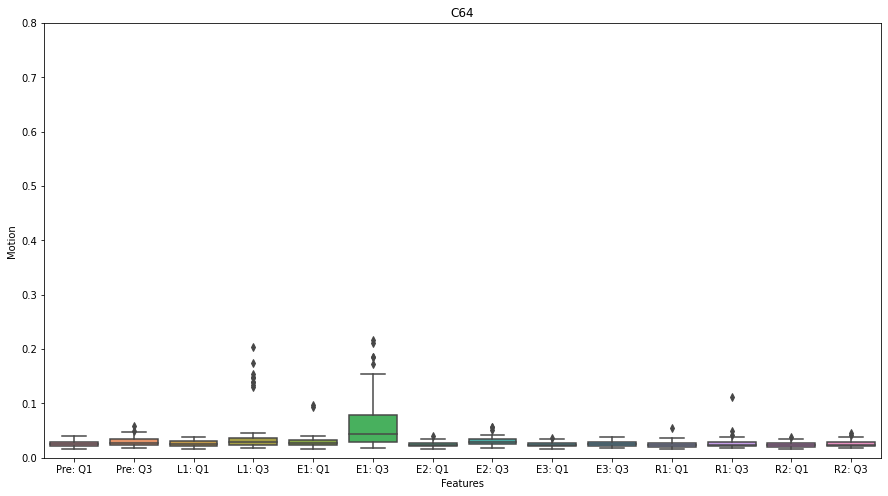

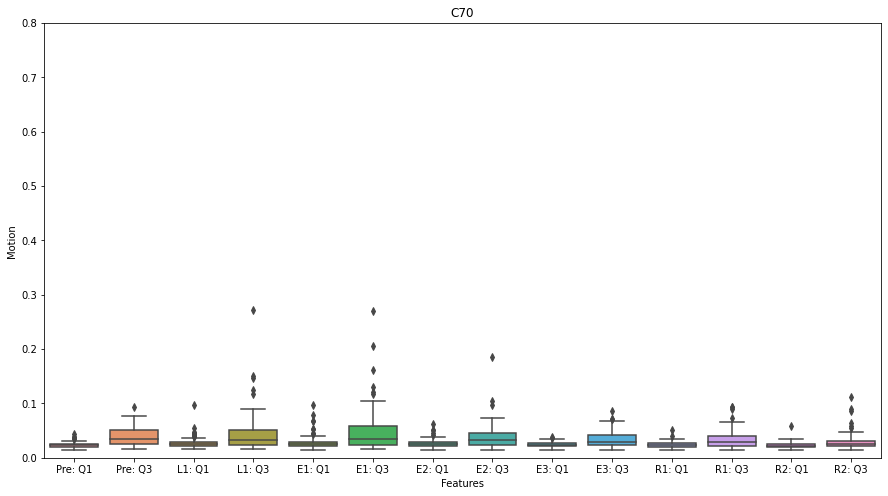

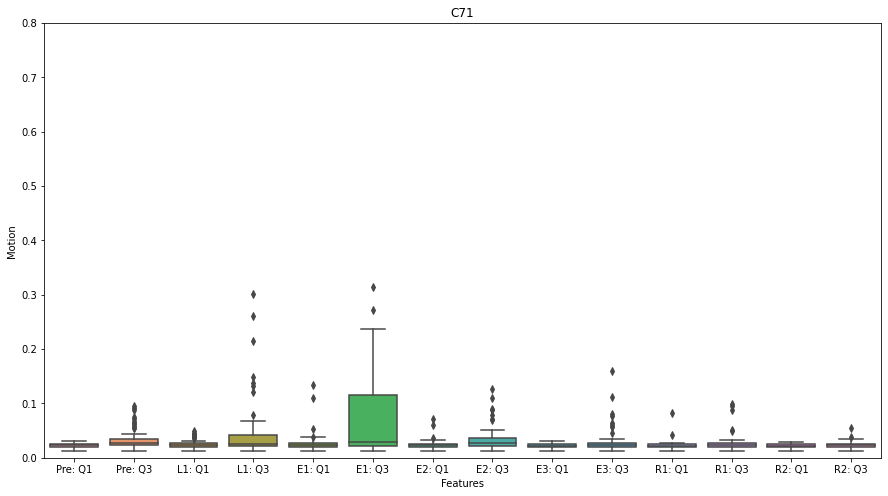

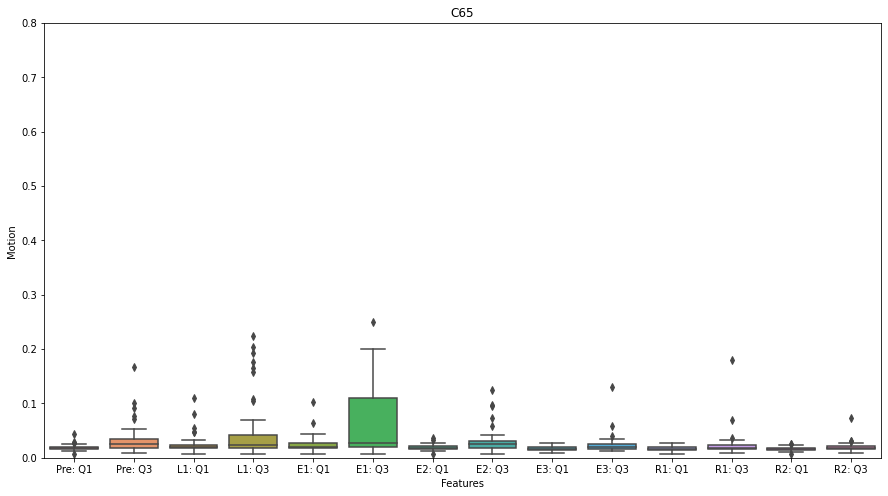

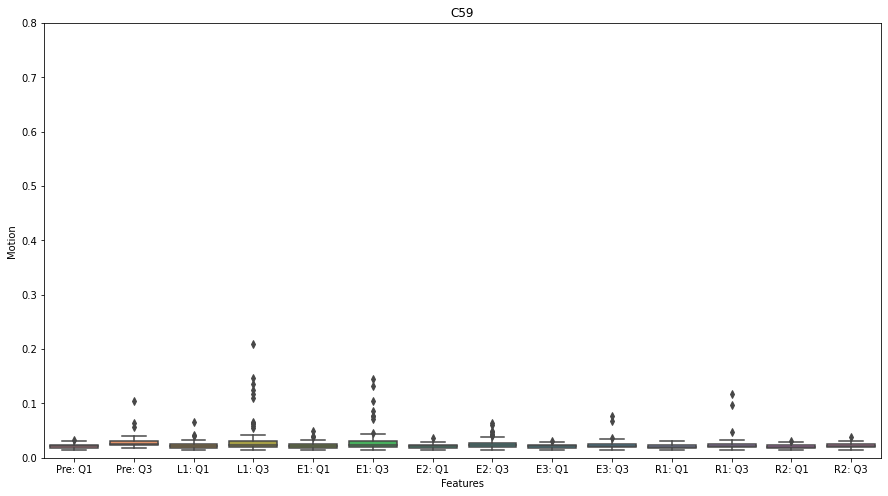

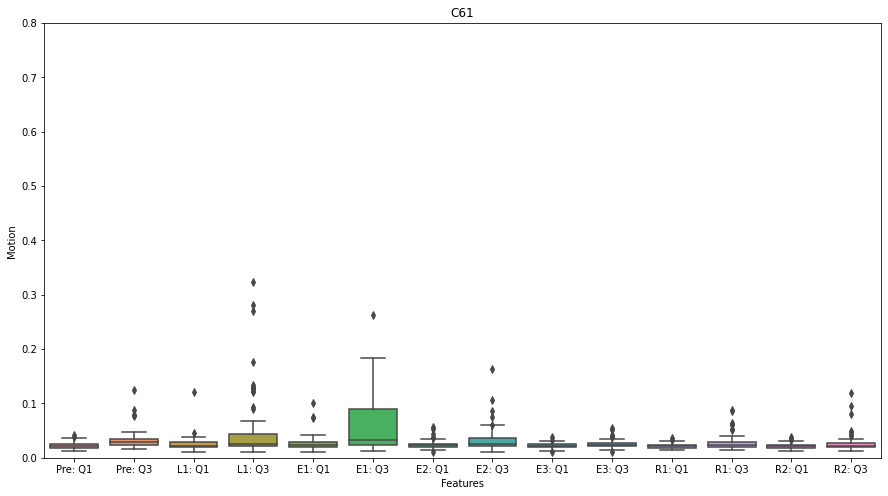

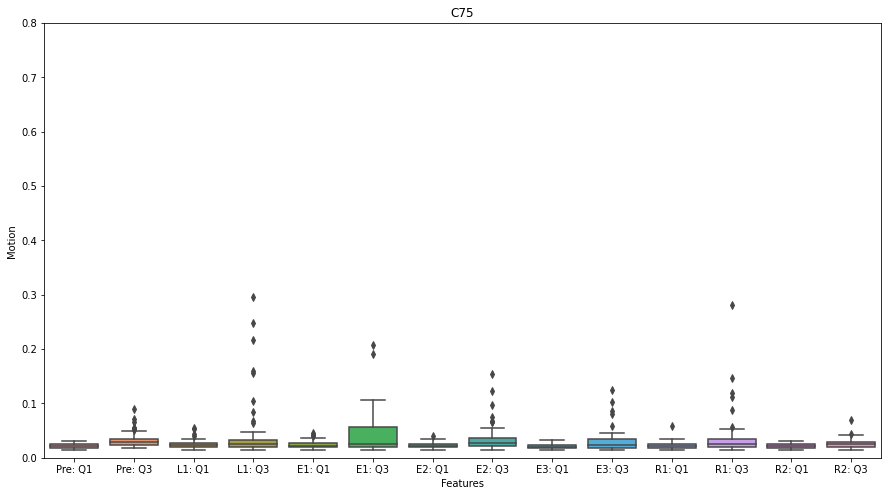

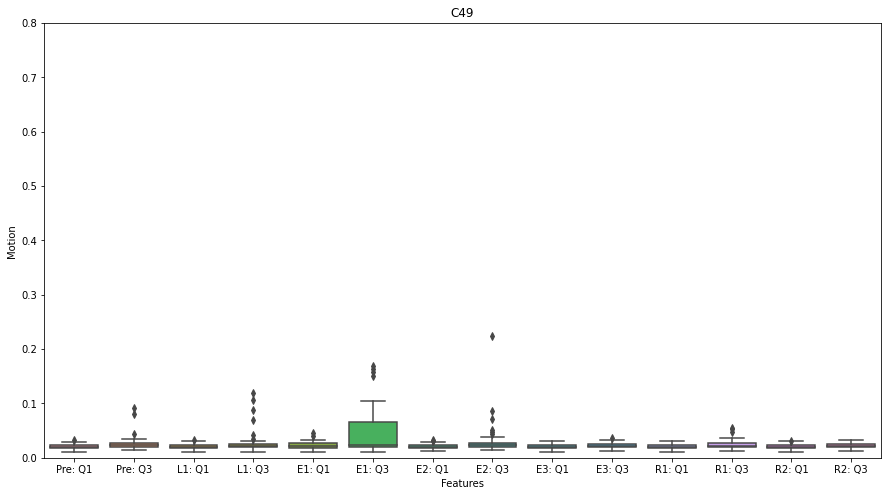

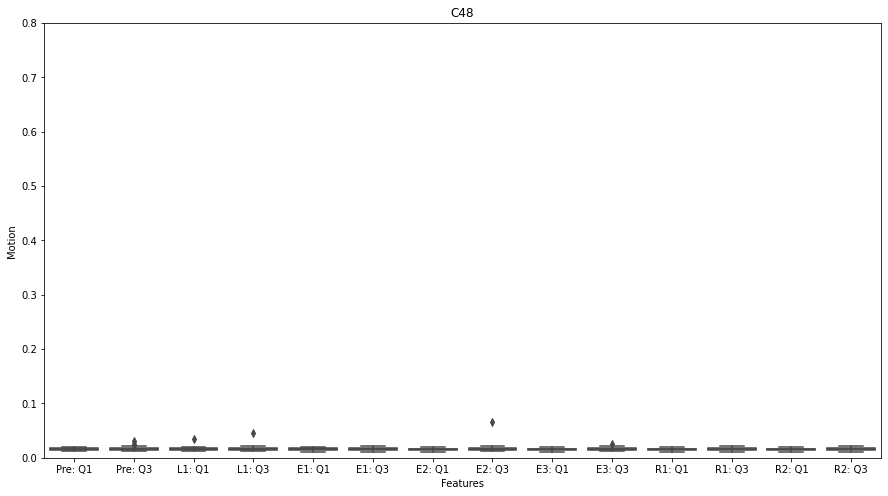

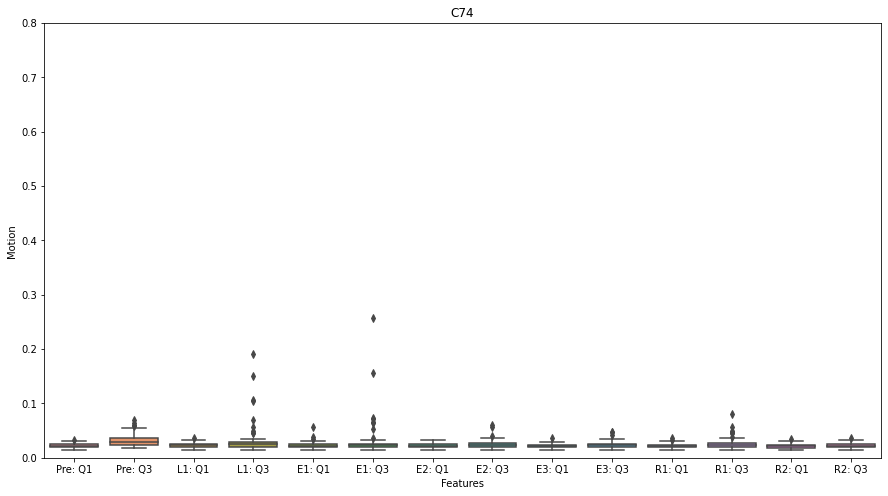

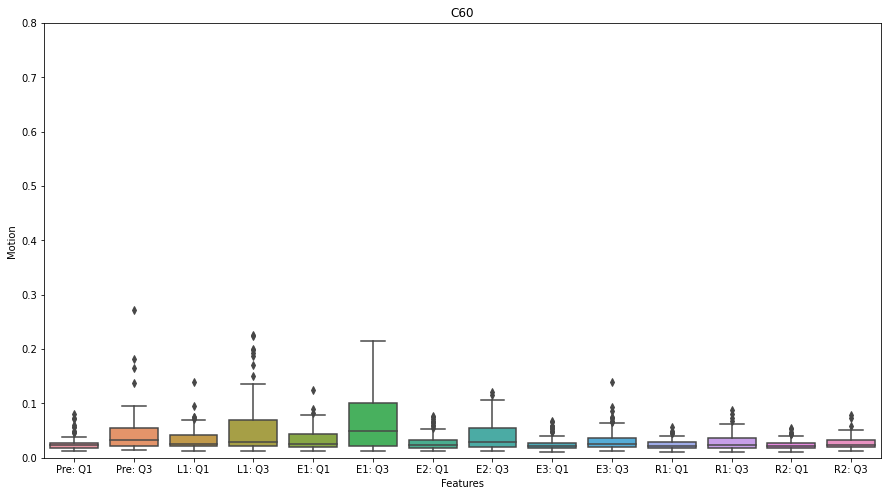

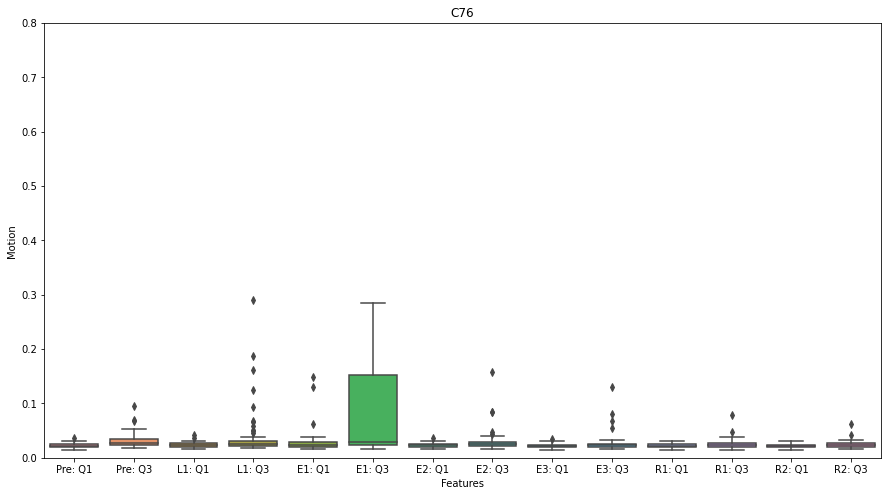

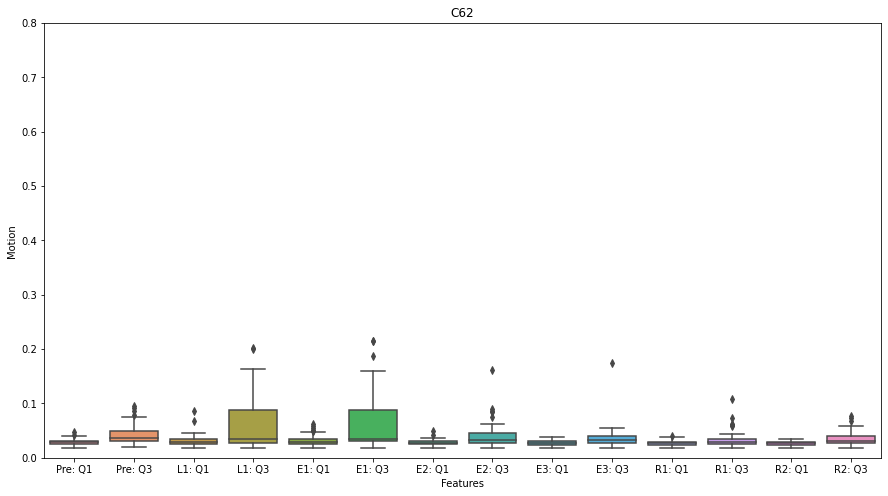

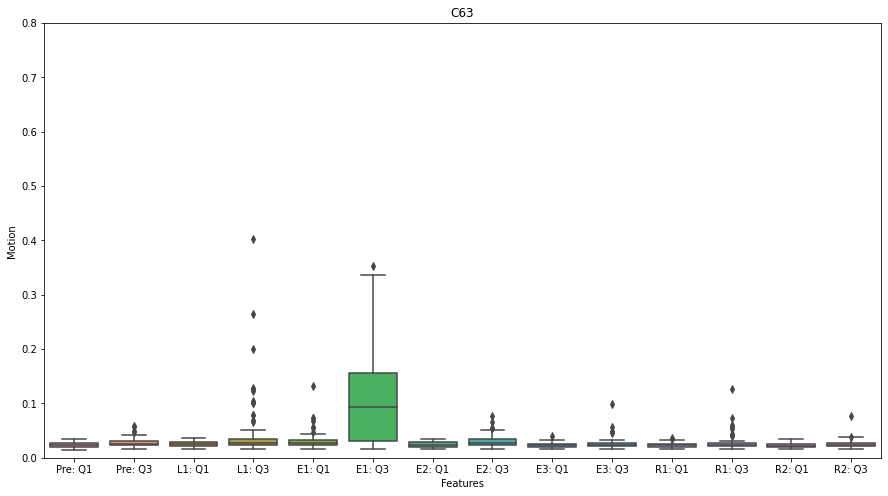

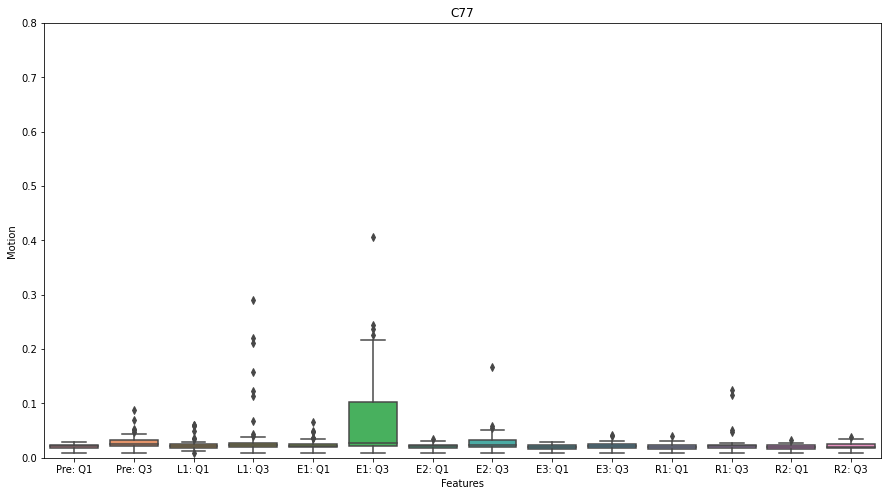

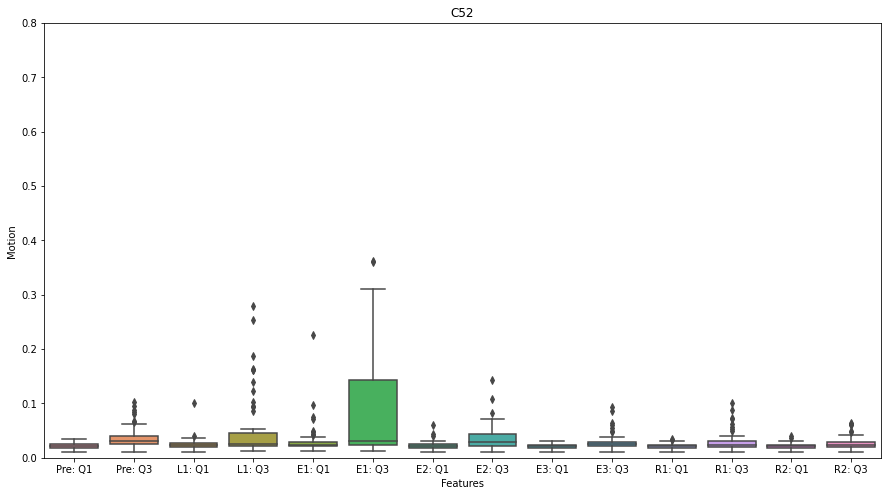

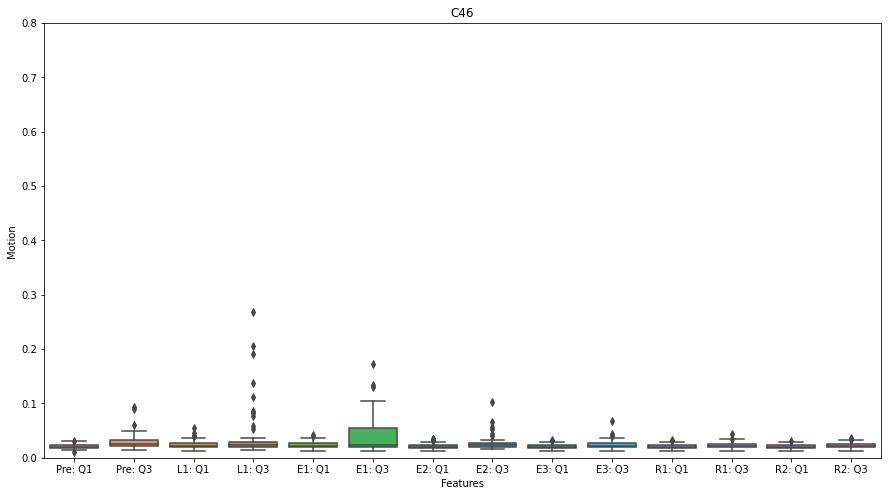

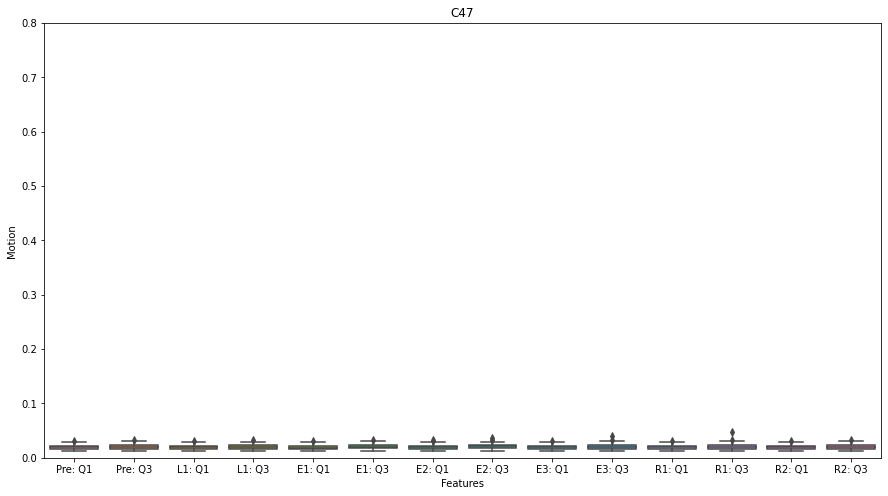

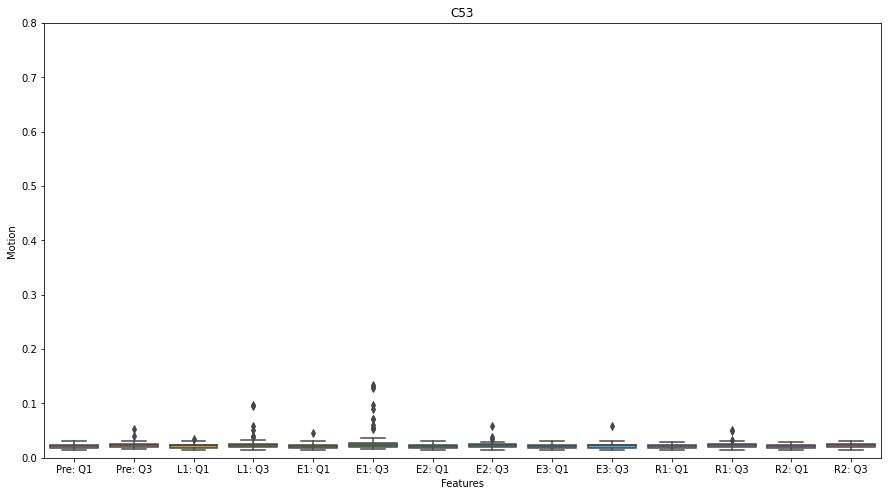

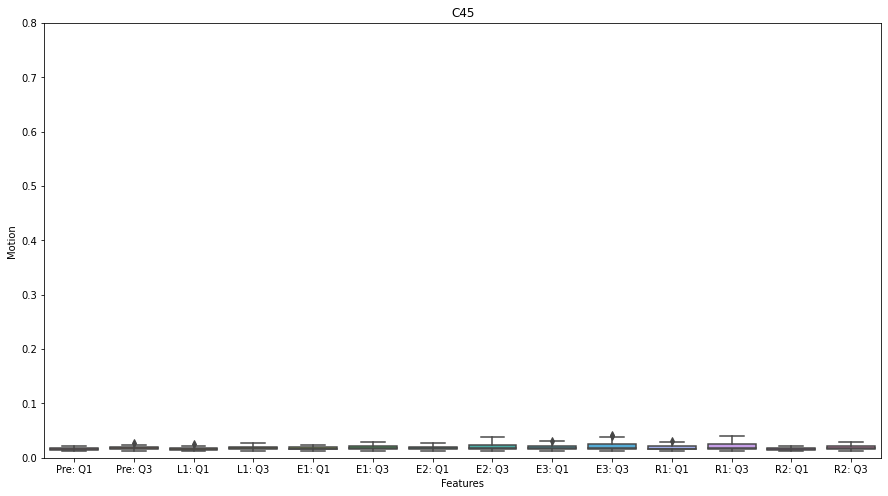

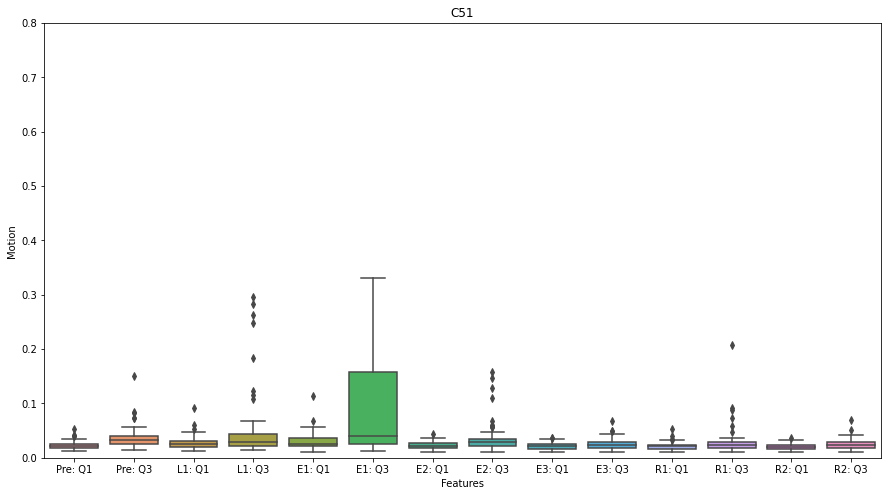

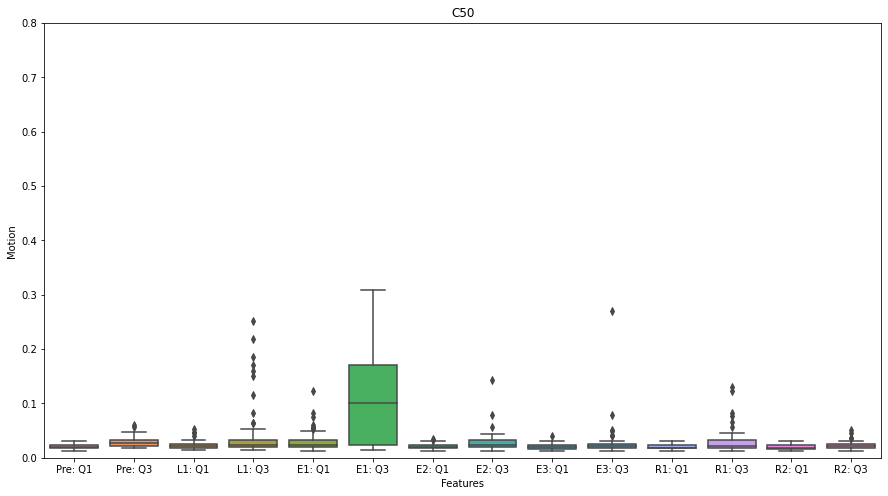

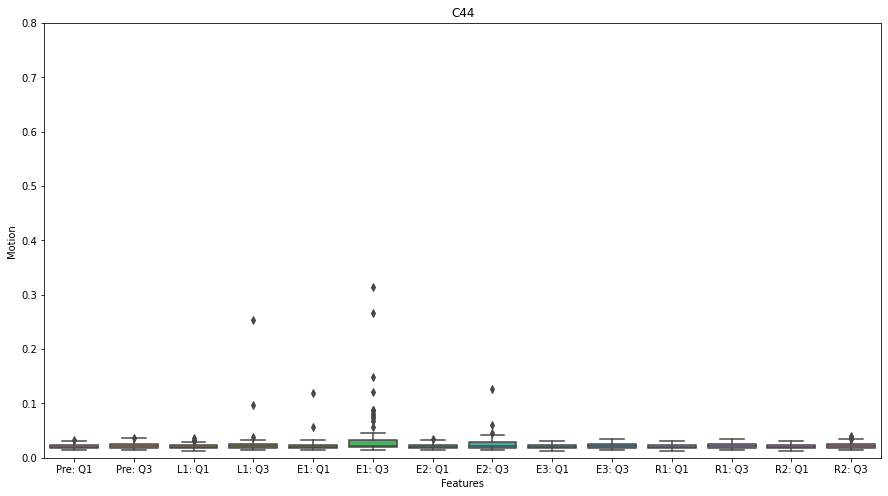

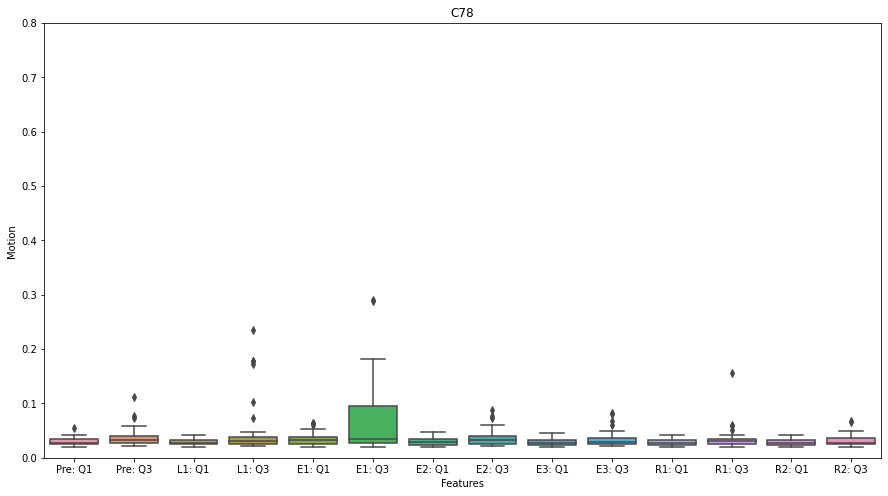

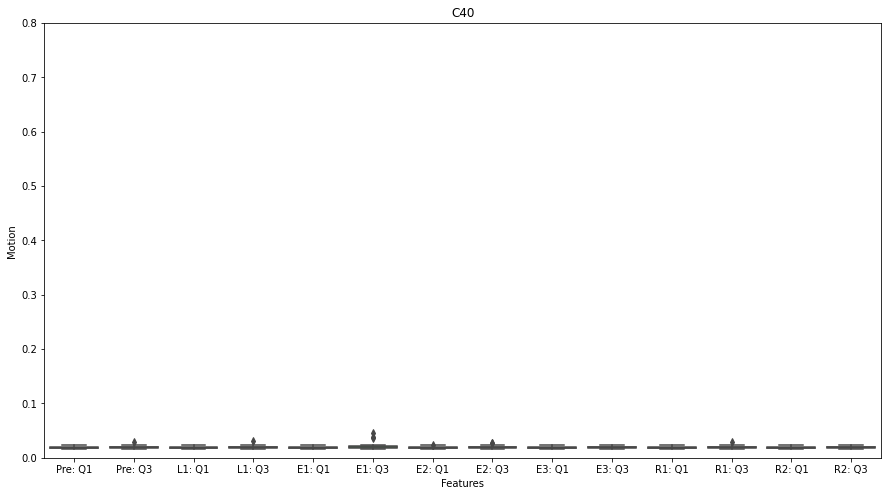

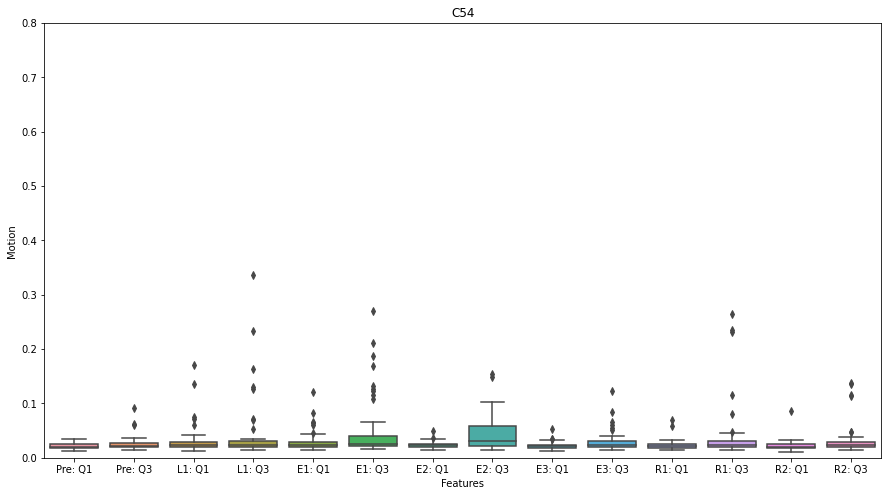

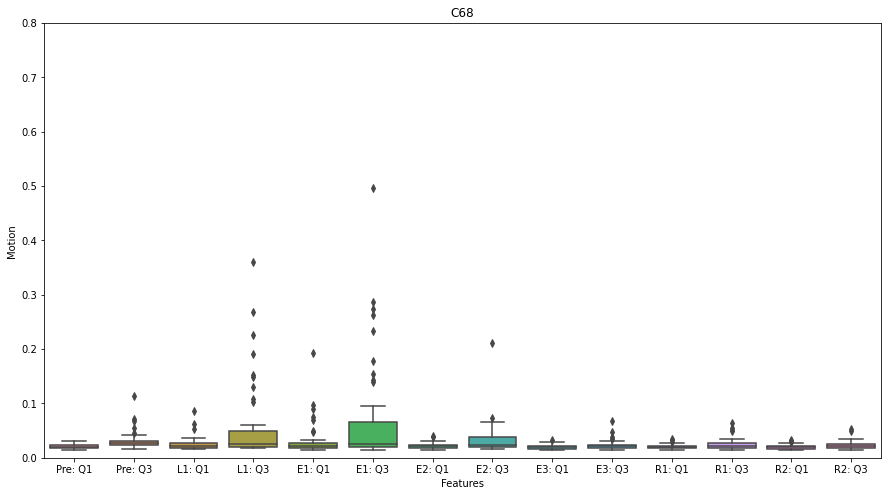

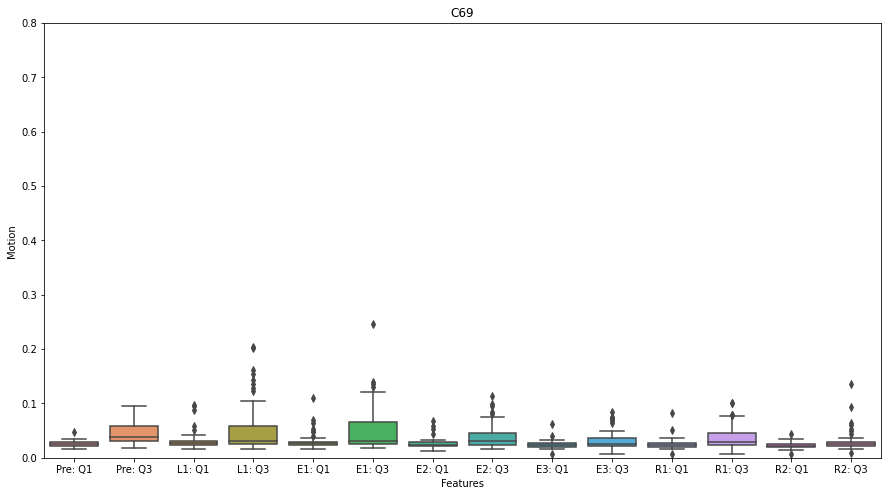

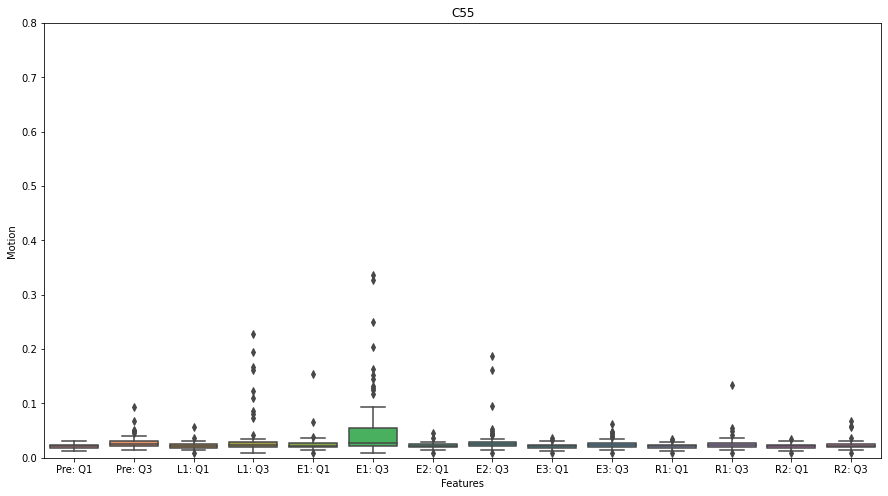

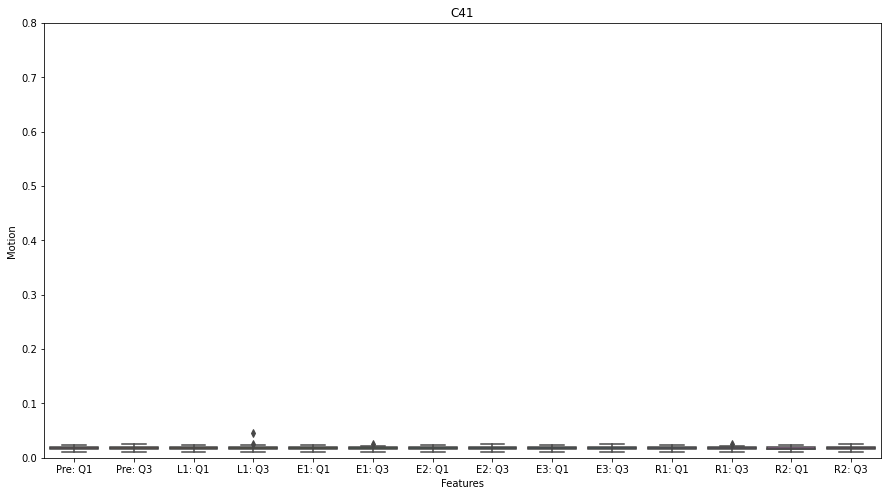

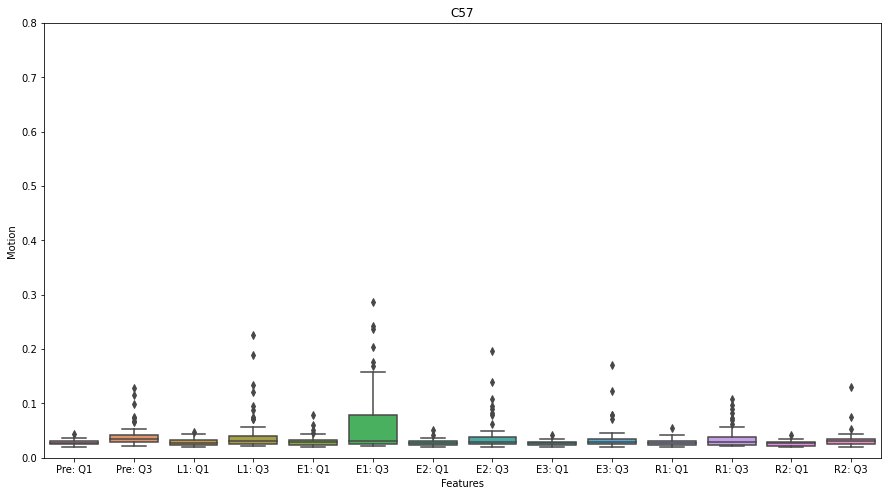

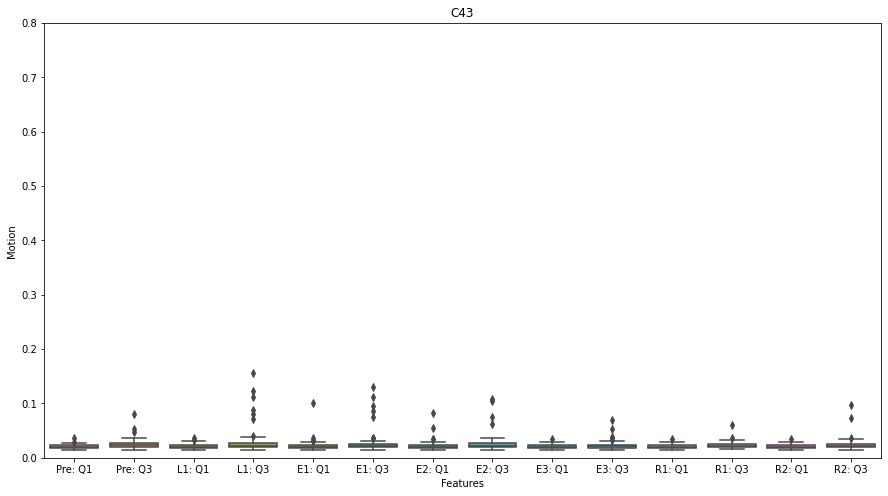

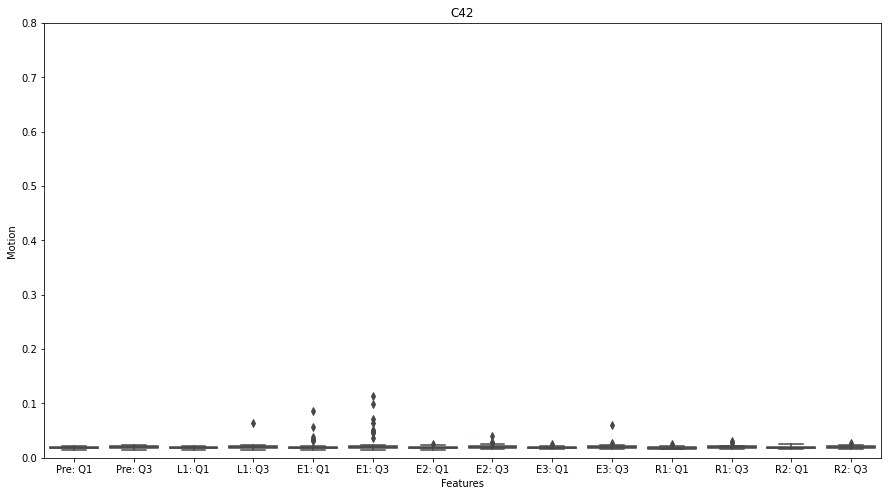

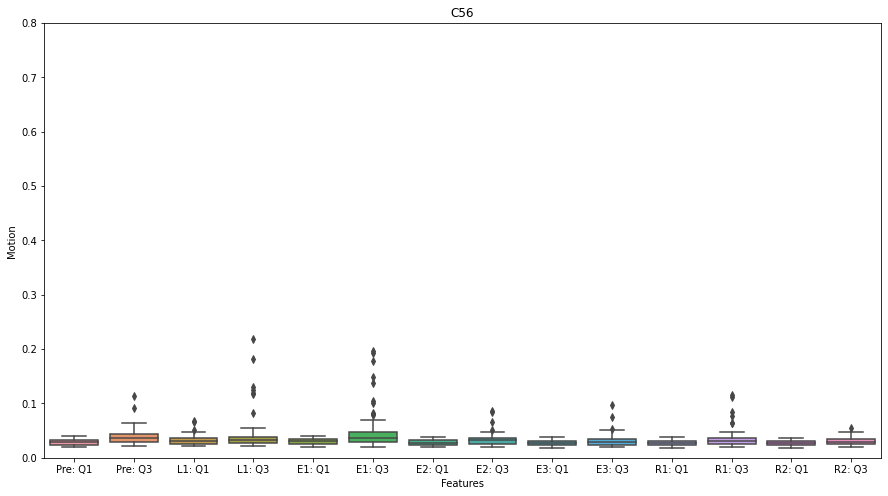

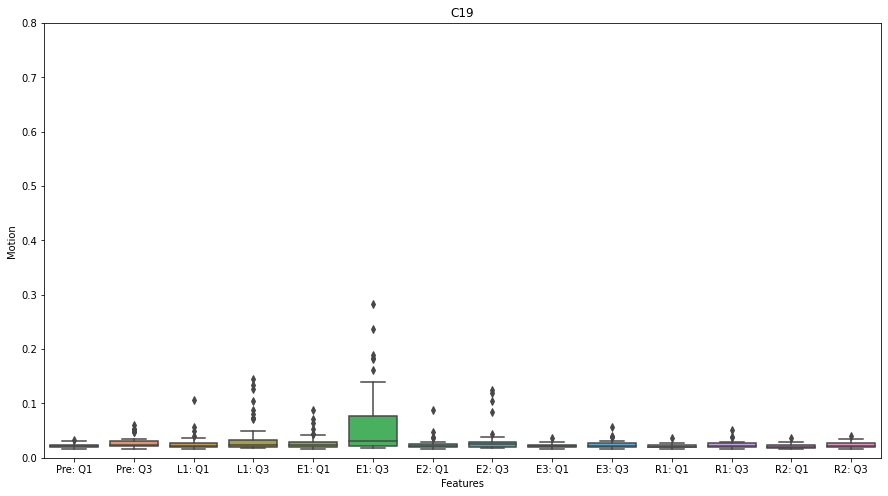

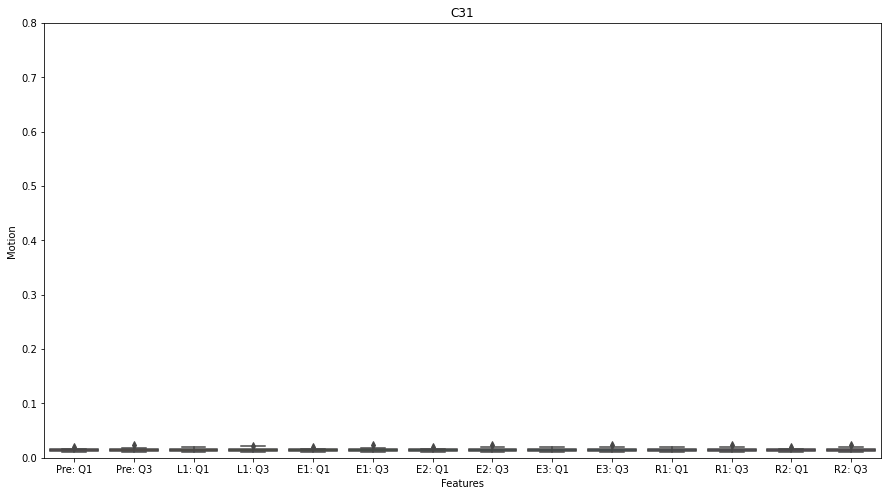

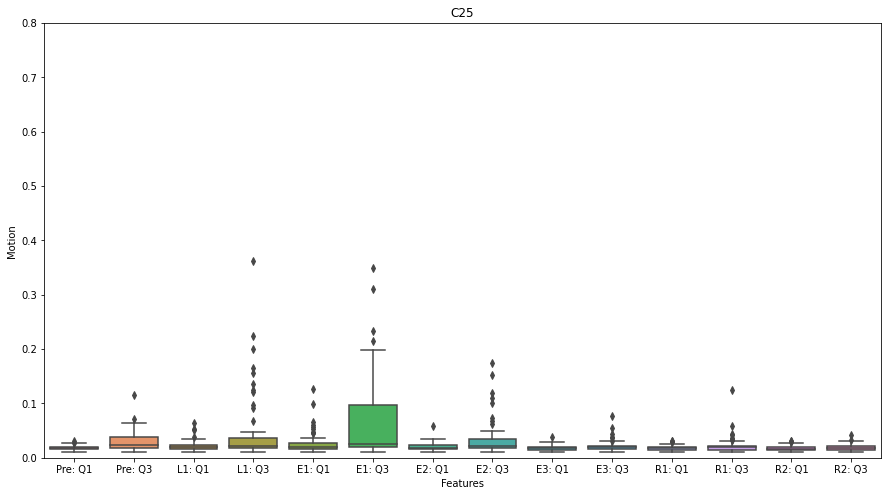

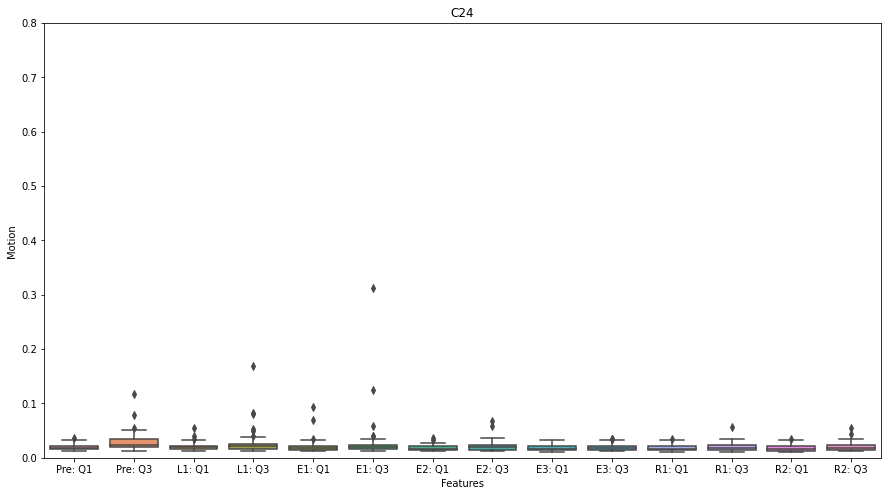

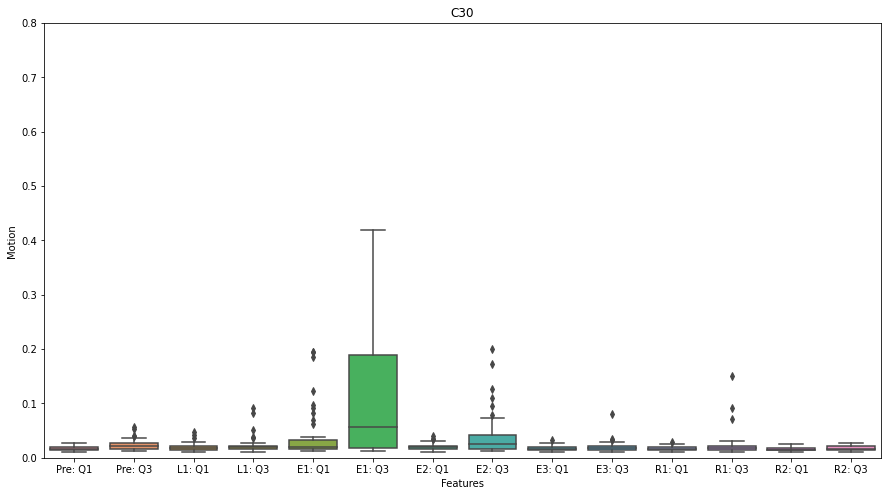

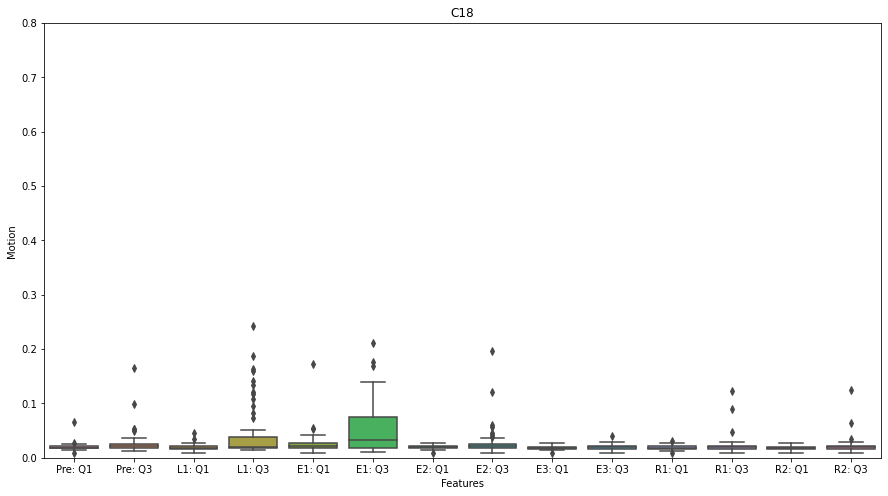

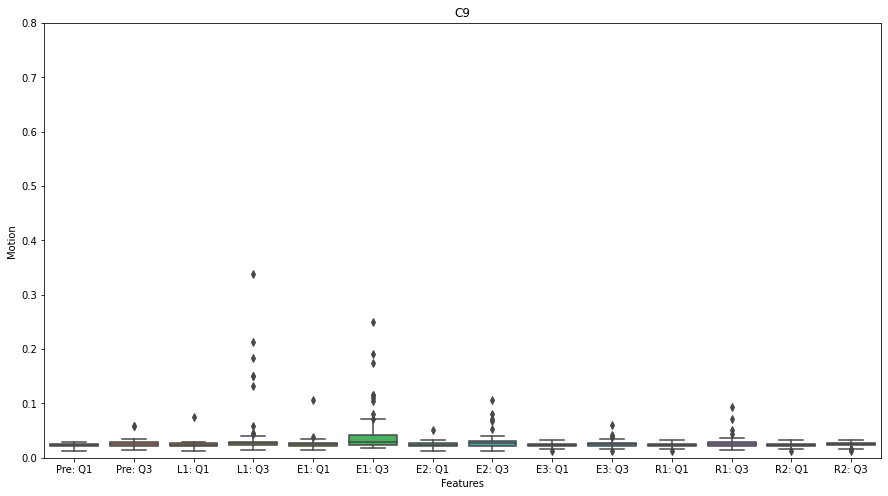

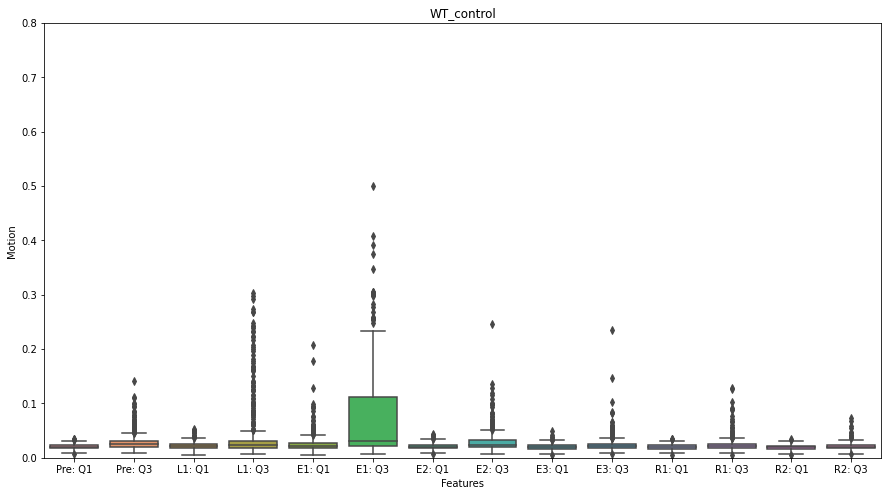

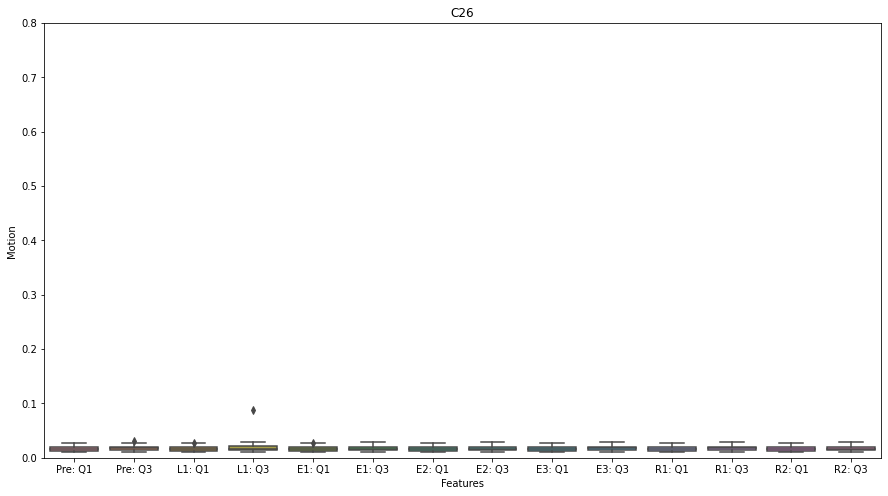

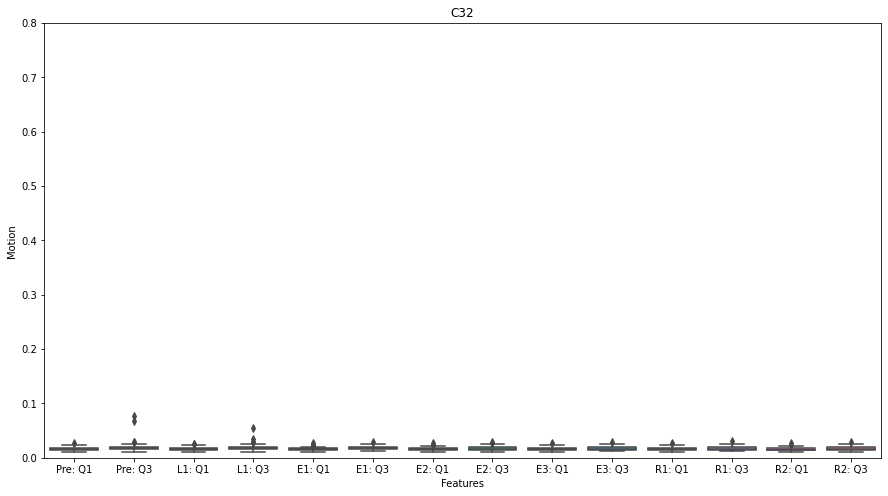

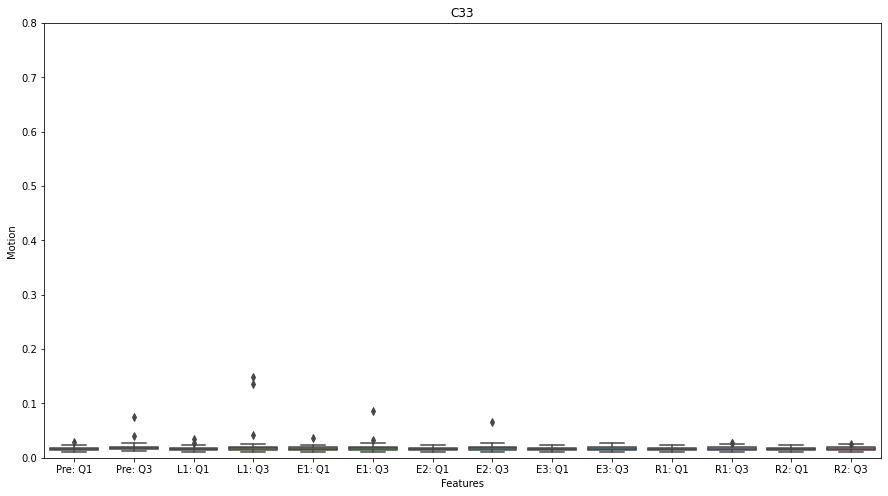

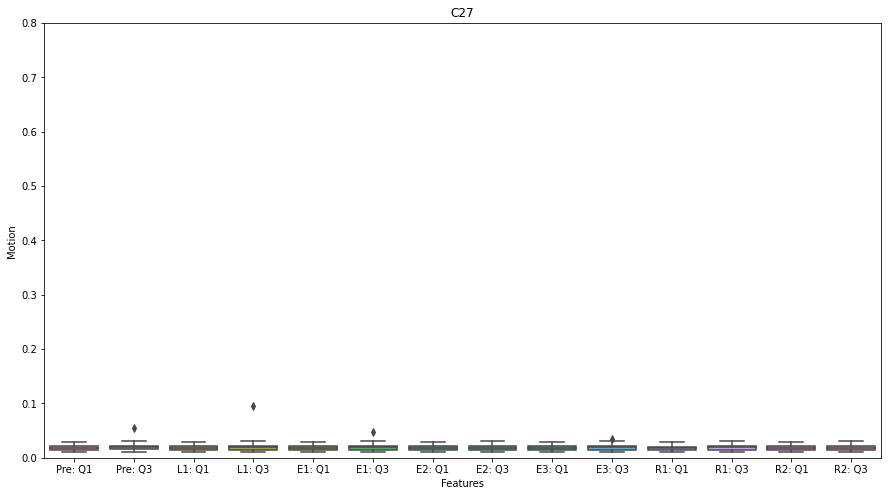

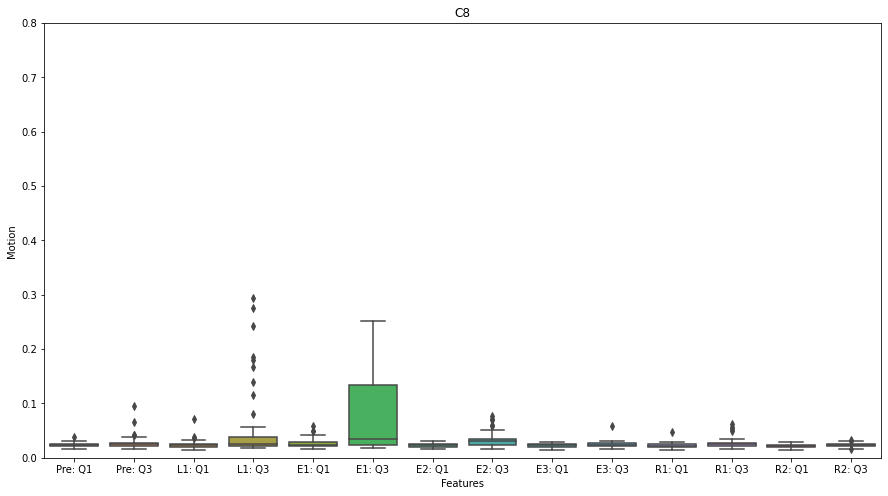

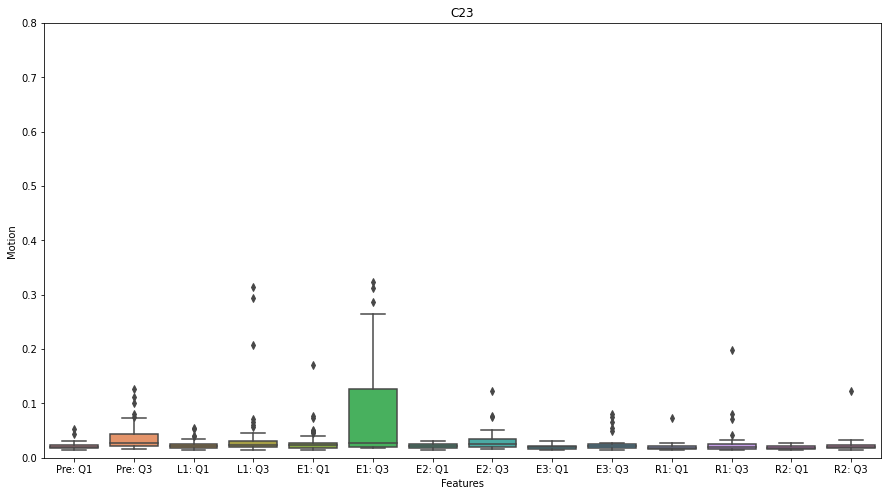

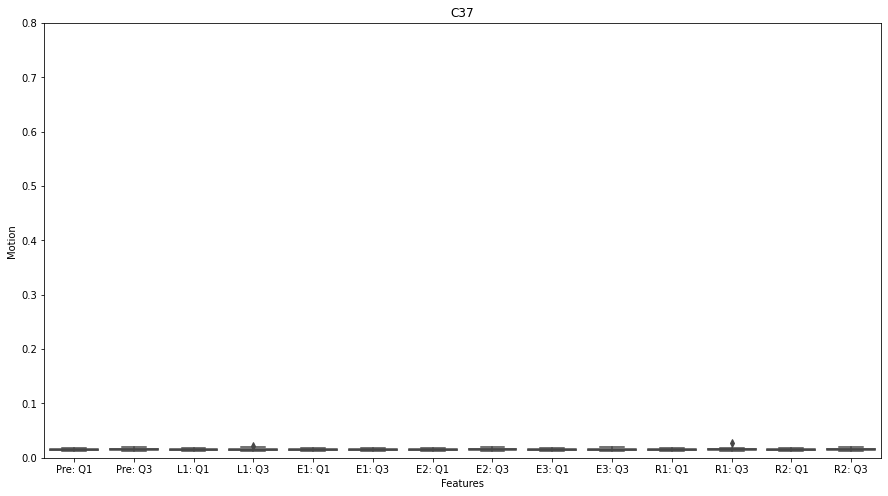

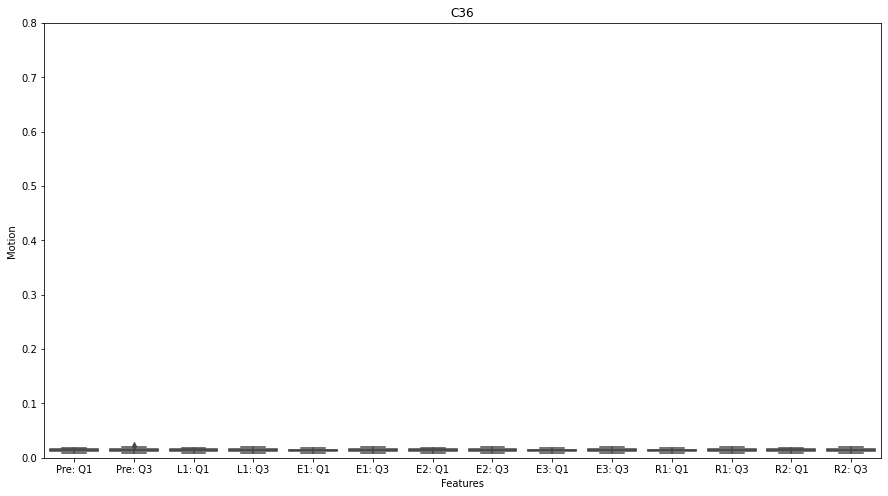

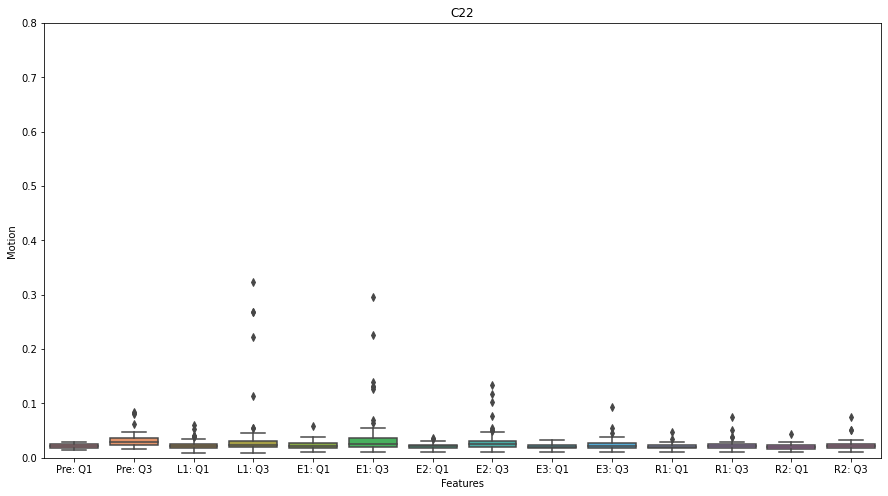

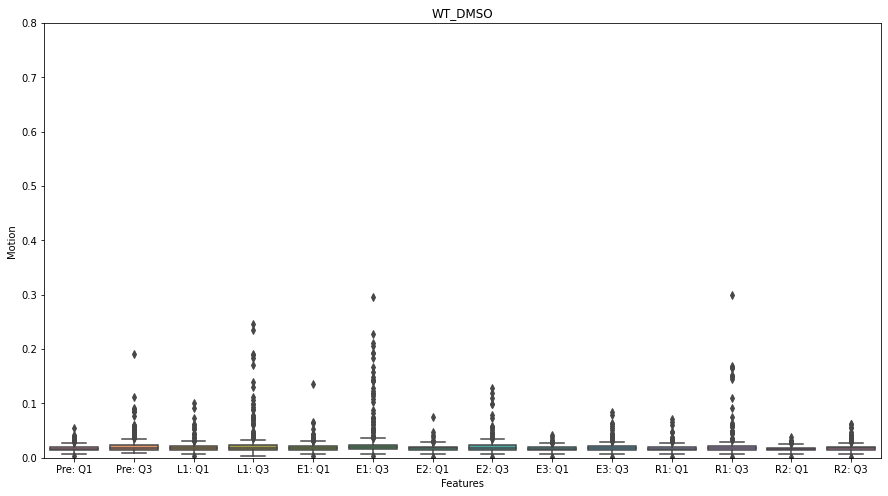

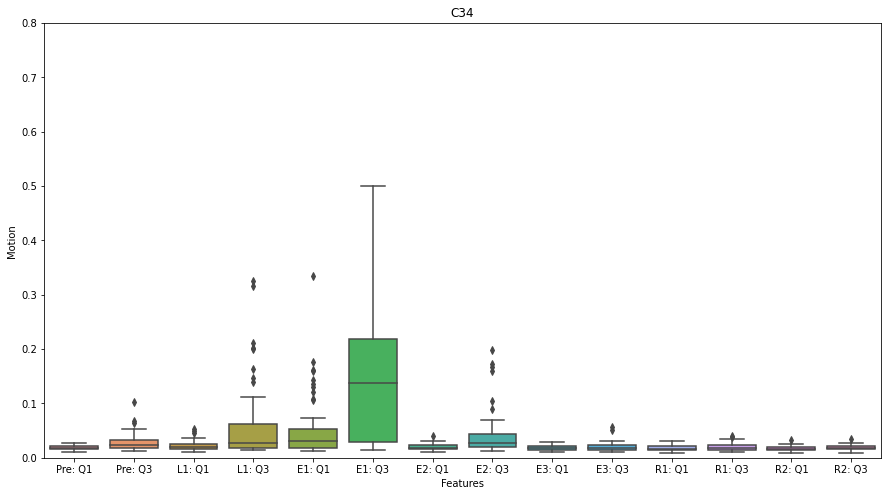

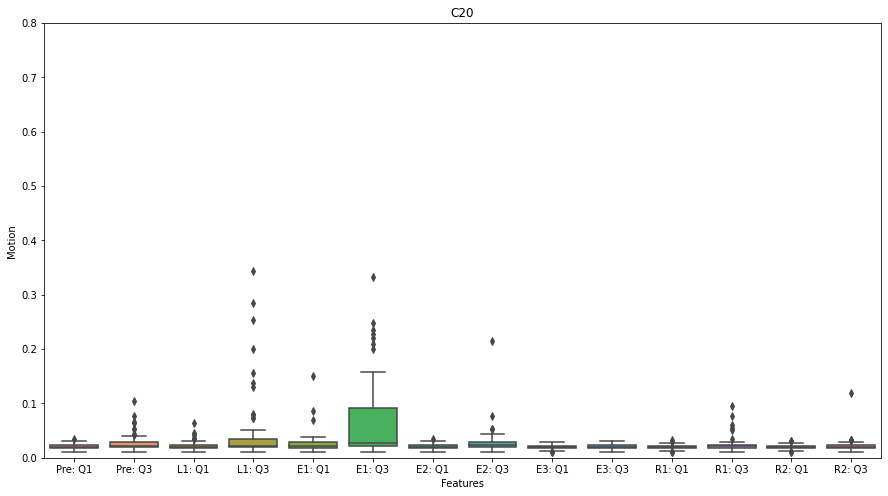

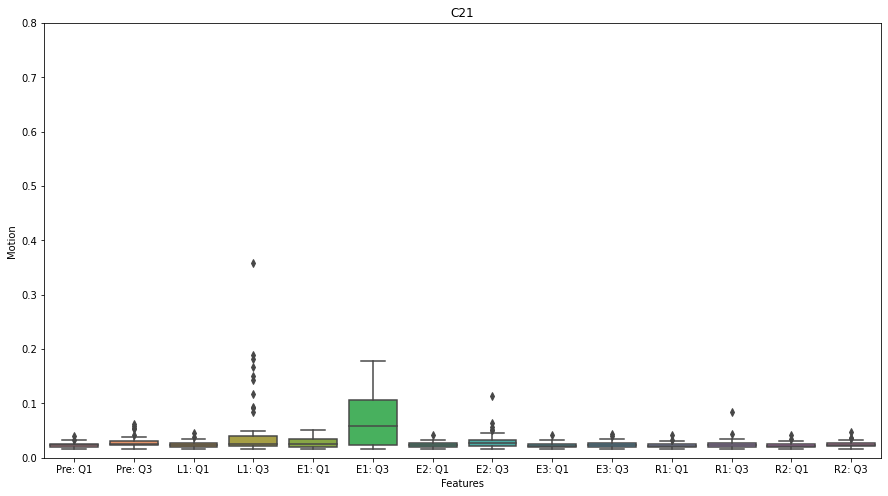

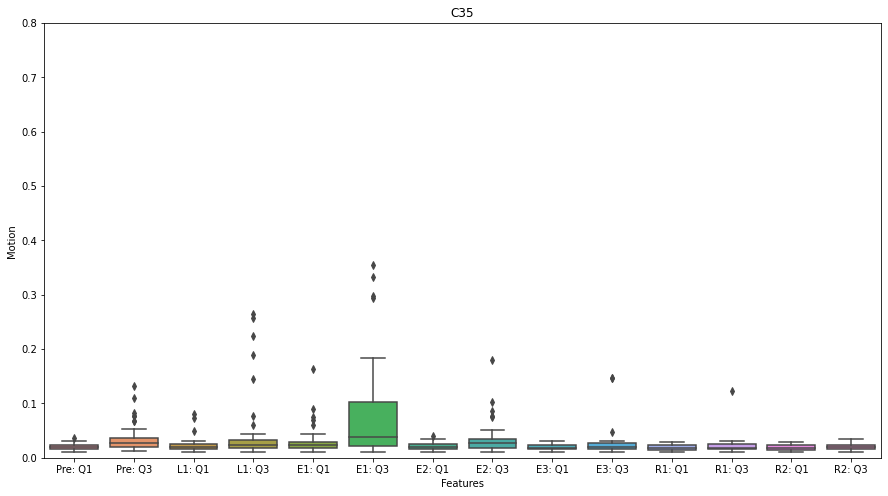

In [146]:
Box_file = glob.glob("./data_14features/*.csv")

for f in Box_file:
    f_name = os.path.basename(f)
    f_name = f_name[:-4]
    df = pd.read_csv(f)
    fig = plt.figure(figsize=(15,8))
    boxplot = sns.boxplot(data=df)
    boxplot.set_title("{0}".format(f_name))
    plt.ylim(0, 0.8)
    plt.xlabel('Features')
    plt.ylabel('Motion')
    plt.plot()
    plt.savefig("./png/boxplot_png/{0}.png".format(f_name), dpi=300)

# 2 Clustering

## calculate median for all fished in each compound.

In [147]:
file = glob.glob("./data_14features/*.csv")

for f in file:
    f_name = os.path.basename(f)
    f_name = f_name[:-4]
    df = pd.read_csv(f)
    df = df.quantile([0.5], axis=0)
    df.index = pd.Series(["{0}".format(f_name)])
    df.to_csv("./data_median/{0}.csv".format(f_name))
    

In [148]:
#concatenate all medians of each compounds into one file.
file = glob.glob("./data_median/*.csv")

df = pd.read_csv(file[0])
df.set_index(['Unnamed: 0'], drop=True, inplace=True)
df.index.name = None

for f in file[1:]:
    data = pd.read_csv(f)
    data.set_index(['Unnamed: 0'], drop=True, inplace=True)
    data.index.name = None
    df = pd.concat([df, data], axis=0)
    
df.to_csv("./data_median_all/data_median_all_out_of_order.csv")
df.shape

(80, 14)

In [149]:
#sort the index of the generated data_median_all file with the name.
ls = pd.read_csv("./data_median_all/data_median_all_out_of_order.csv")
ls.set_index(['Unnamed: 0'], drop=True, inplace=True)
ls.index.name = None
ls.sort_index(inplace=True)
ls

Pre: Q1   Pre: Q3    L1: Q1    L1: Q3    E1: Q1    E1: Q3  \
C1          0.022760  0.025234  0.022922  0.024524  0.023107  0.025042   
C10         0.023280  0.026599  0.024219  0.027030  0.024171  0.027867   
C11         0.023792  0.024563  0.023926  0.027049  0.025138  0.027355   
C12         0.020245  0.024736  0.022849  0.024591  0.021597  0.025156   
C13         0.018451  0.023007  0.018954  0.021127  0.019237  0.032610   
...              ...       ...       ...       ...       ...       ...   
C78         0.027339  0.033403  0.027719  0.031693  0.032066  0.035492   
C8          0.023799  0.026014  0.023703  0.026203  0.023647  0.034639   
C9          0.023609  0.025836  0.024376  0.026808  0.024487  0.028486   
WT_DMSO     0.016987  0.018936  0.017221  0.018207  0.017230  0.019176   
WT_control  0.020011  0.024637  0.020925  0.023410  0.022006  0.030288   

              E2: Q1    E2: Q3    E3: Q1    E3: Q3    R1: Q1    R1: Q3  \
C1          0.023016  0.025137  0.022669  0.024411  0.022702  0.024123   
C10         0.023657  0.026992  0.023613  0.025209  0.023203  0.024204   
C11         0.024731  0.026765  0.024279  0.026349  0.024094  0.025310   
C12         0.020432  0.022476  0.019129  0.020283  0.019244  0.020153   
C13         0.018543  0.022953  0.017659  0.018444  0.017294  0.017622   
...              ...       ...       ...       ...       ...       ...   
C78         0.029628  0.033321  0.027274  0.029868  0.027001  0.031142   
C8          0.023850  0.030160  0.022710  0.023964  0.022531  0.024691   
C9          0.024312  0.026580  0.024338  0.025431  0.023820  0.025174   
WT_DMSO     0.017129  0.018500  0.016989  0.018021  0.016696  0.017608   
WT_control  0.020614  0.023831  0.019845  0.021204  0.019673  0.021178   

              R2: Q1    R2: Q3  
C1          0.022598  0.024094  
C10         0.023183  0.024094  
C11         0.023833  0.025323  
C12         0.019366  0.020282  
C13         0.016826  0.017816  
...              ...       ...  
C78         0.026981  0.027982  
C8          0.022432  0.023973  
C9          0.023703  0.024646  
WT_DMSO     0.016289  0.017508  
WT_control  0.019259  0.020694  

[80 rows x 14 columns]

python按照列表元素中的数字大小排序
https://www.jianshu.com/p/5efb0bdbad7d

In [34]:
import re

def tryint(s):                       
    #将元素中的数字转换为int后再排序
    try:
        return int(s)
    except ValueError:
        return s

def str2int(v_str):                
    #将元素中的字符串和数字分割开
    return [tryint(sub_str) for sub_str in re.split('([0-9]+)', v_str)]

def sort_humanly(v_list):    
    #以分割后的list为单位进行排序
    return sorted(v_list, key=str2int)

In [35]:
test_list = ls.index
common_sort_list = sorted(test_list)
human_sort_list = sort_humanly(test_list)
print('before sort: ' + str(test_list))
print('after common sort: ' + str(common_sort_list))
print('after human sort: ' + str(human_sort_list))

before sort: Index(['C1', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18',
       'C19', 'C2', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27',
       'C28', 'C29', 'C3', 'C30', 'C31', 'C32', 'C33', 'C34', 'C35', 'C36',
       'C37', 'C38', 'C39', 'C4', 'C40', 'C41', 'C42', 'C43', 'C44', 'C45',
       'C46', 'C47', 'C48', 'C49', 'C5', 'C50', 'C51', 'C52', 'C53', 'C54',
       'C55', 'C56', 'C57', 'C58', 'C59', 'C6', 'C60', 'C61', 'C62', 'C63',
       'C64', 'C65', 'C66', 'C67', 'C68', 'C69', 'C7', 'C70', 'C71', 'C72',
       'C73', 'C74', 'C75', 'C76', 'C77', 'C78', 'C8', 'C9', 'WT'],
      dtype='object')
after common sort: ['C1', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C2', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'C3', 'C30', 'C31', 'C32', 'C33', 'C34', 'C35', 'C36', 'C37', 'C38', 'C39', 'C4', 'C40', 'C41', 'C42', 'C43', 'C44', 'C45', 'C46', 'C47', 'C48', 'C49', 'C5', 'C50', 'C51', 'C52', 'C53', 'C54', 

教程结束

=======================================================================================================

使用增加一行数字序号的方法

怎么提取pandas dataframe中某一列每个字符串的前n个字符？
http://sofasofa.io/forum_main_post.php?postid=1005562

python3 中apply函数和lambda函数的使用详解
https://blog.csdn.net/low5252/article/details/108545447

(此次使用了这个)pandas之silce函数的使用（字段截取函数）以及将截取后的字段加入DataFrame
https://blog.csdn.net/leilei7407/article/details/104462948



In [150]:
#ls['order'].apply(lambda x:x[2:]).tolist()
ls['order']=ls.index.str.slice(1,)
ls

Pre: Q1   Pre: Q3    L1: Q1    L1: Q3    E1: Q1    E1: Q3  \
C1          0.022760  0.025234  0.022922  0.024524  0.023107  0.025042   
C10         0.023280  0.026599  0.024219  0.027030  0.024171  0.027867   
C11         0.023792  0.024563  0.023926  0.027049  0.025138  0.027355   
C12         0.020245  0.024736  0.022849  0.024591  0.021597  0.025156   
C13         0.018451  0.023007  0.018954  0.021127  0.019237  0.032610   
...              ...       ...       ...       ...       ...       ...   
C78         0.027339  0.033403  0.027719  0.031693  0.032066  0.035492   
C8          0.023799  0.026014  0.023703  0.026203  0.023647  0.034639   
C9          0.023609  0.025836  0.024376  0.026808  0.024487  0.028486   
WT_DMSO     0.016987  0.018936  0.017221  0.018207  0.017230  0.019176   
WT_control  0.020011  0.024637  0.020925  0.023410  0.022006  0.030288   

              E2: Q1    E2: Q3    E3: Q1    E3: Q3    R1: Q1    R1: Q3  \
C1          0.023016  0.025137  0.022669  0.024411  0.022702  0.024123   
C10         0.023657  0.026992  0.023613  0.025209  0.023203  0.024204   
C11         0.024731  0.026765  0.024279  0.026349  0.024094  0.025310   
C12         0.020432  0.022476  0.019129  0.020283  0.019244  0.020153   
C13         0.018543  0.022953  0.017659  0.018444  0.017294  0.017622   
...              ...       ...       ...       ...       ...       ...   
C78         0.029628  0.033321  0.027274  0.029868  0.027001  0.031142   
C8          0.023850  0.030160  0.022710  0.023964  0.022531  0.024691   
C9          0.024312  0.026580  0.024338  0.025431  0.023820  0.025174   
WT_DMSO     0.017129  0.018500  0.016989  0.018021  0.016696  0.017608   
WT_control  0.020614  0.023831  0.019845  0.021204  0.019673  0.021178   

              R2: Q1    R2: Q3      order  
C1          0.022598  0.024094          1  
C10         0.023183  0.024094         10  
C11         0.023833  0.025323         11  
C12         0.019366  0.020282         12  
C13         0.016826  0.017816         13  
...              ...       ...        ...  
C78         0.026981  0.027982         78  
C8          0.022432  0.023973          8  
C9          0.023703  0.024646          9  
WT_DMSO     0.016289  0.017508     T_DMSO  
WT_control  0.019259  0.020694  T_control  

[80 rows x 15 columns]

python - Pandas sort_values无法正确对数字进行排序
https://www.coder.work/article/2420897


In [151]:
#要将元素转换为数字形式，才能按照阿拉伯数字排序
ls.order = pd.to_numeric(ls.order, errors='coerce')

In [152]:
ls = ls.sort_values('order')
ls.drop(['order'], axis=1, inplace=True)

In [153]:
ls.to_csv('./data_median_all/data_median_all.csv')

## 2.1 KMeans 

In [3]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [4]:
data = pd.read_csv("./data_median_all/data_median_all.csv")
data.set_index(['Unnamed: 0'], drop=True, inplace=True)
data.index.name = None
data

Pre: Q1   Pre: Q3    L1: Q1    L1: Q3    E1: Q1    E1: Q3  \
C1          0.022760  0.025234  0.022922  0.024524  0.023107  0.025042   
C2          0.021637  0.024109  0.021775  0.024005  0.024315  0.066676   
C3          0.020699  0.023960  0.022117  0.031256  0.025140  0.069878   
C4          0.022256  0.025216  0.023978  0.025251  0.025146  0.028801   
C5          0.022826  0.024778  0.023629  0.024880  0.024495  0.033596   
...              ...       ...       ...       ...       ...       ...   
C76         0.022250  0.027137  0.023255  0.025400  0.024246  0.029515   
C77         0.020966  0.025475  0.021379  0.023110  0.021845  0.027304   
C78         0.027339  0.033403  0.027719  0.031693  0.032066  0.035492   
WT_DMSO     0.016987  0.018936  0.017221  0.018207  0.017230  0.019176   
WT_control  0.020011  0.024637  0.020925  0.023410  0.022006  0.030288   

              E2: Q1    E2: Q3    E3: Q1    E3: Q3    R1: Q1    R1: Q3  \
C1          0.023016  0.025137  0.022669  0.024411  0.022702  0.024123   
C2          0.021888  0.026479  0.020962  0.021483  0.020860  0.022058   
C3          0.022025  0.025329  0.021225  0.021857  0.021042  0.022438   
C4          0.023876  0.027436  0.022252  0.023942  0.022336  0.024188   
C5          0.024161  0.026075  0.023827  0.025226  0.023634  0.025206   
...              ...       ...       ...       ...       ...       ...   
C76         0.022940  0.025194  0.022111  0.023755  0.022485  0.023163   
C77         0.020831  0.023755  0.020051  0.021290  0.019545  0.020810   
C78         0.029628  0.033321  0.027274  0.029868  0.027001  0.031142   
WT_DMSO     0.017129  0.018500  0.016989  0.018021  0.016696  0.017608   
WT_control  0.020614  0.023831  0.019845  0.021204  0.019673  0.021178   

              R2: Q1    R2: Q3  
C1          0.022598  0.024094  
C2          0.021058  0.021799  
C3          0.020823  0.021925  
C4          0.022134  0.023786  
C5          0.022864  0.024722  
...              ...       ...  
C76         0.021663  0.022879  
C77         0.019558  0.020755  
C78         0.026981  0.027982  
WT_DMSO     0.016289  0.017508  
WT_control  0.019259  0.020694  

[80 rows x 14 columns]

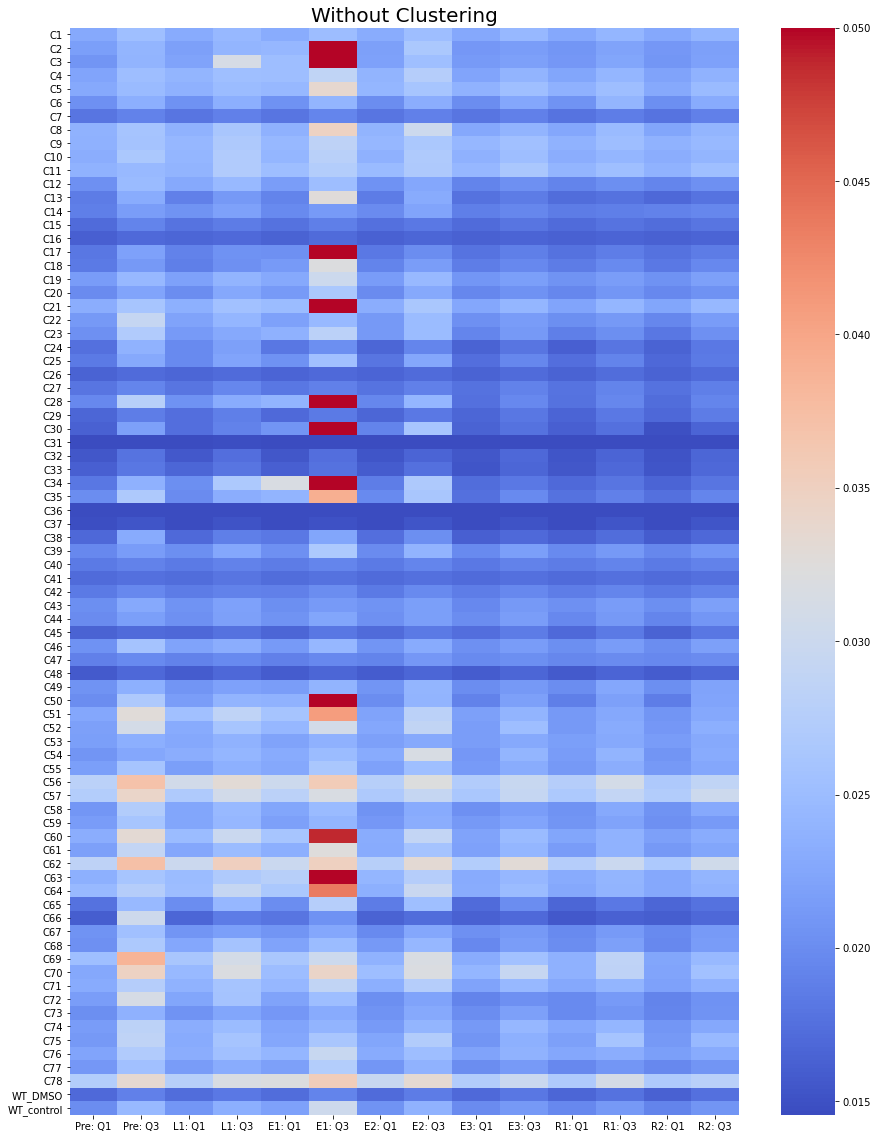

In [158]:
sns.set_context({"figure.figsize":(15,20)})
#sns.heatmap(data=all_s, cmap="coolwarm", linewidths=0.005, robust=True)
heatmap = sns.heatmap(data=data, cmap="coolwarm", robust=True, vmax=0.05)
heatmap.set_title("Without Clustering", fontsize=20)
plt.savefig("./png/clustering_png/without_clustering", dpi=300)

### n = 4

/opt/anaconda3/envs/aimat/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


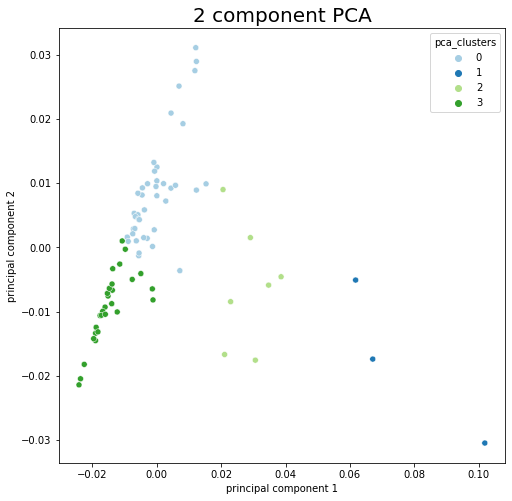

In [5]:


pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])


#%%

pca_kmeans = KMeans(n_clusters=4).fit(principalDf)

#%%

principalDf['pca_clusters'] = pca_kmeans.labels_

#%%

x_axis = principalDf['principal component 1']
y_axis = principalDf['principal component 2']
fig = plt.figure(figsize = (8,8))
sns.scatterplot(x_axis, y_axis, hue = principalDf['pca_clusters'], palette = 'Paired')
plt.title('2 component PCA', fontsize = 20)
plt.savefig("./png/clustering_png/scatter_kmeans_4clusters", dpi=300)
plt.show()


data_all = pd.read_csv("./data_median_all/data_median_all.csv")
pca_data_all = pd.concat([data_all, principalDf], axis=1)
pca_data_all.drop(['principal component 1', 'principal component 2'], axis=1, inplace=True)
pca_data_all.set_index(['Unnamed: 0'], drop=True, inplace=True)
pca_data_all.index.name = None
#%%


pca_data_all.to_csv("./png/clustering_png/kmeans4_no_sort_values.csv")
pca_data_all.sort_values("pca_clusters").to_csv("./png/clustering_png/kmeans4.csv")

#%%

df = pd.read_csv("./png/clustering_png/kmeans4.csv")
df.set_index('Unnamed: 0', drop=True, inplace=True)
df.index.name = None
df.drop('pca_clusters', axis=1, inplace=True)





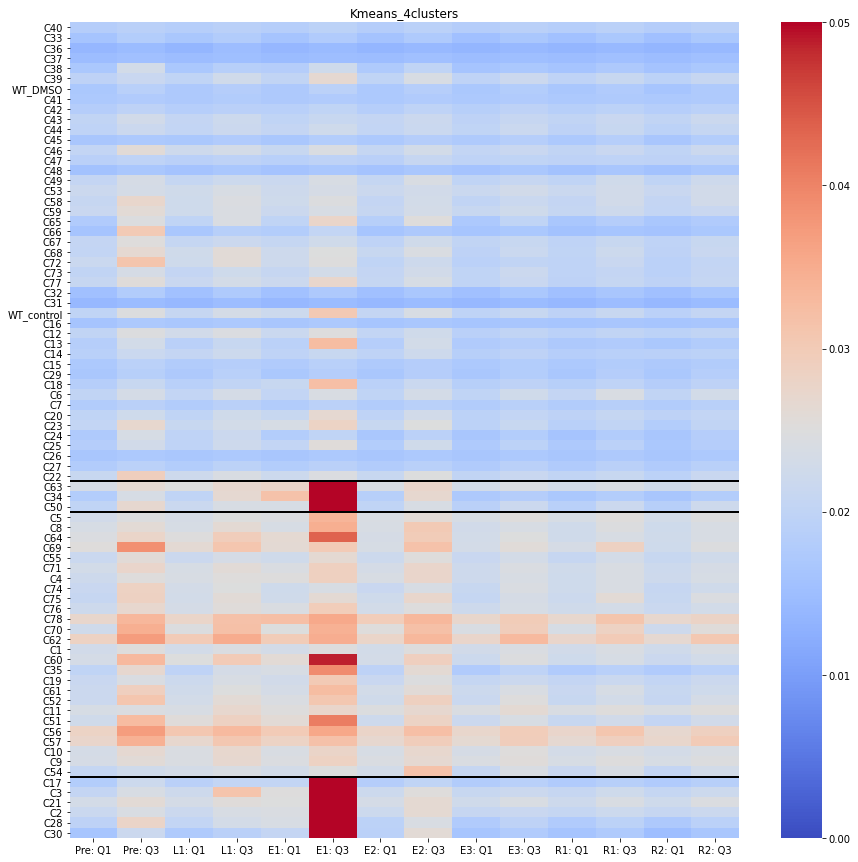

In [167]:
fig = plt.figure(figsize=(15, 15))
heatmap = sns.heatmap(data=df, cmap="coolwarm", vmin=0, vmax=0.05, robust=True)
heatmap.set_title("Kmeans_4clusters")
plt.axhline(y=45, linewidth=2, color='black', linestyle='-')
plt.axhline(y=48, linewidth=2, color='black', linestyle='-')
plt.axhline(y=74, linewidth=2, color='black', linestyle='-')
#plt.plot()
plt.savefig("./png/clustering_png/kmeans_4clusters_heatmap.png", dpi=300)

### n = 5

/opt/anaconda3/envs/aimat/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


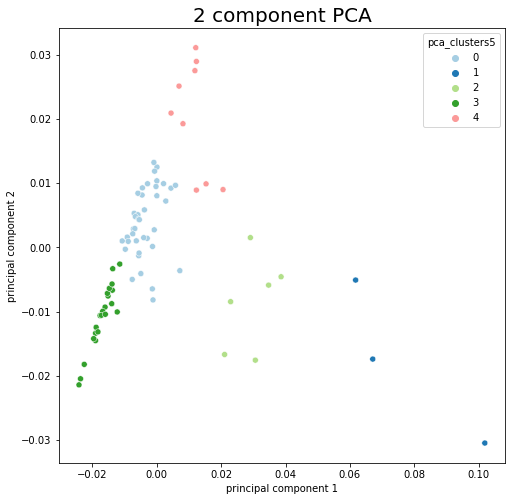

             Pre: Q1   Pre: Q3    L1: Q1    L1: Q3    E1: Q1    E1: Q3  \
C1          0.022760  0.025234  0.022922  0.024524  0.023107  0.025042   
C2          0.021637  0.024109  0.021775  0.024005  0.024315  0.066676   
C3          0.020699  0.023960  0.022117  0.031256  0.025140  0.069878   
C4          0.022256  0.025216  0.023978  0.025251  0.025146  0.028801   
C5          0.022826  0.024778  0.023629  0.024880  0.024495  0.033596   
...              ...       ...       ...       ...       ...       ...   
C76         0.022250  0.027137  0.023255  0.025400  0.024246  0.029515   
C77         0.020966  0.025475  0.021379  0.023110  0.021845  0.027304   
C78         0.027339  0.033403  0.027719  0.031693  0.032066  0.035492   
WT_DMSO     0.016987  0.018936  0.017221  0.018207  0.017230  0.019176   
WT_control  0.020011  0.024637  0.020925  0.023410  0.022006  0.030288   

              E2: Q1    E2: Q3    E3: Q1    E3: Q3    R1: Q1    R1: Q3  \
C1          0.023016  0.025137  0.022

In [169]:


pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])


#%%

pca_kmeans = KMeans(n_clusters=5).fit(principalDf)

#%%

principalDf['pca_clusters5'] = pca_kmeans.labels_

#%%

x_axis = principalDf['principal component 1']
y_axis = principalDf['principal component 2']
fig = plt.figure(figsize = (8,8))
sns.scatterplot(x_axis, y_axis, hue = principalDf['pca_clusters5'], palette = 'Paired')
plt.title('2 component PCA', fontsize = 20)
plt.savefig("./png/clustering_png/scatter_kmeans_5clusters", dpi=300)
plt.show()


data_all = pd.read_csv("./data_median_all/data_median_all.csv")
pca_data_all = pd.concat([data_all, principalDf], axis=1)
pca_data_all.drop(['principal component 1', 'principal component 2'], axis=1, inplace=True)
pca_data_all.set_index(['Unnamed: 0'], drop=True, inplace=True)
pca_data_all.index.name = None
#%%


pca_data_all.to_csv("./png/clustering_png/kmeans5_no_sort_values.csv")
pca_data_all.sort_values("pca_clusters5").to_csv("./png/clustering_png/kmeans5.csv")
print(pca_data_all)
#%%

df = pd.read_csv("./png/clustering_png/kmeans5.csv")
df.set_index('Unnamed: 0', drop=True, inplace=True)
df.index.name = None
df.drop('pca_clusters5', axis=1, inplace=True)






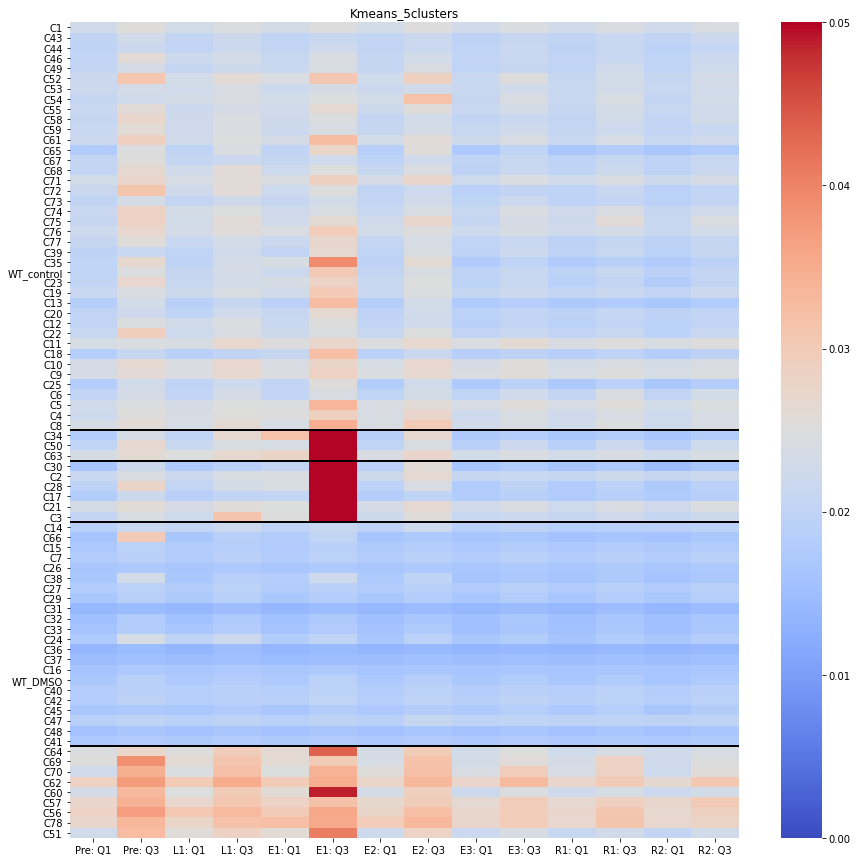

In [173]:
fig = plt.figure(figsize=(15, 15))
heatmap = sns.heatmap(data=df, cmap="coolwarm", vmin=0, vmax=0.05, robust=True)
heatmap.set_title("Kmeans_5clusters")
plt.axhline(y=40, linewidth=2, color='black', linestyle='-')
plt.axhline(y=43, linewidth=2, color='black', linestyle='-')
plt.axhline(y=49, linewidth=2, color='black', linestyle='-')
plt.axhline(y=71, linewidth=2, color='black', linestyle='-')
#plt.plot()
plt.savefig("./png/clustering_png/kmeans_5clusters_heatmap.png", dpi=300)

According to the heatmap, I think 4 clusters are best choice. Change the above 5clusters.Merge two of 5 into one clusters. Heatmap is following:

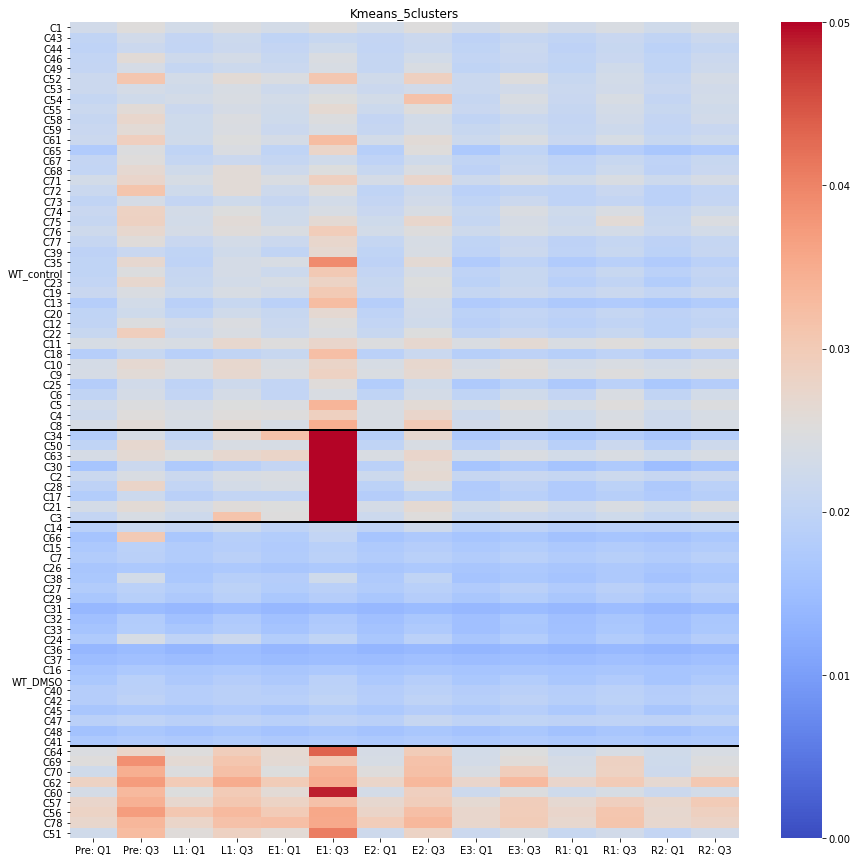

In [175]:
fig = plt.figure(figsize=(15, 15))
heatmap = sns.heatmap(data=df, cmap="coolwarm", vmin=0, vmax=0.05, robust=True)
heatmap.set_title("Kmeans_5clusters")
plt.axhline(y=40, linewidth=2, color='black', linestyle='-')
# plt.axhline(y=43, linewidth=2, color='black', linestyle='-')
plt.axhline(y=49, linewidth=2, color='black', linestyle='-')
plt.axhline(y=71, linewidth=2, color='black', linestyle='-')
#plt.plot()
plt.savefig("./png/clustering_png/kmeans_4clusters_heatmap_mergeby5clusters.png", dpi=300)

## 2.2 Hierarchical clustering

<Figure size 1080x1440 with 0 Axes>

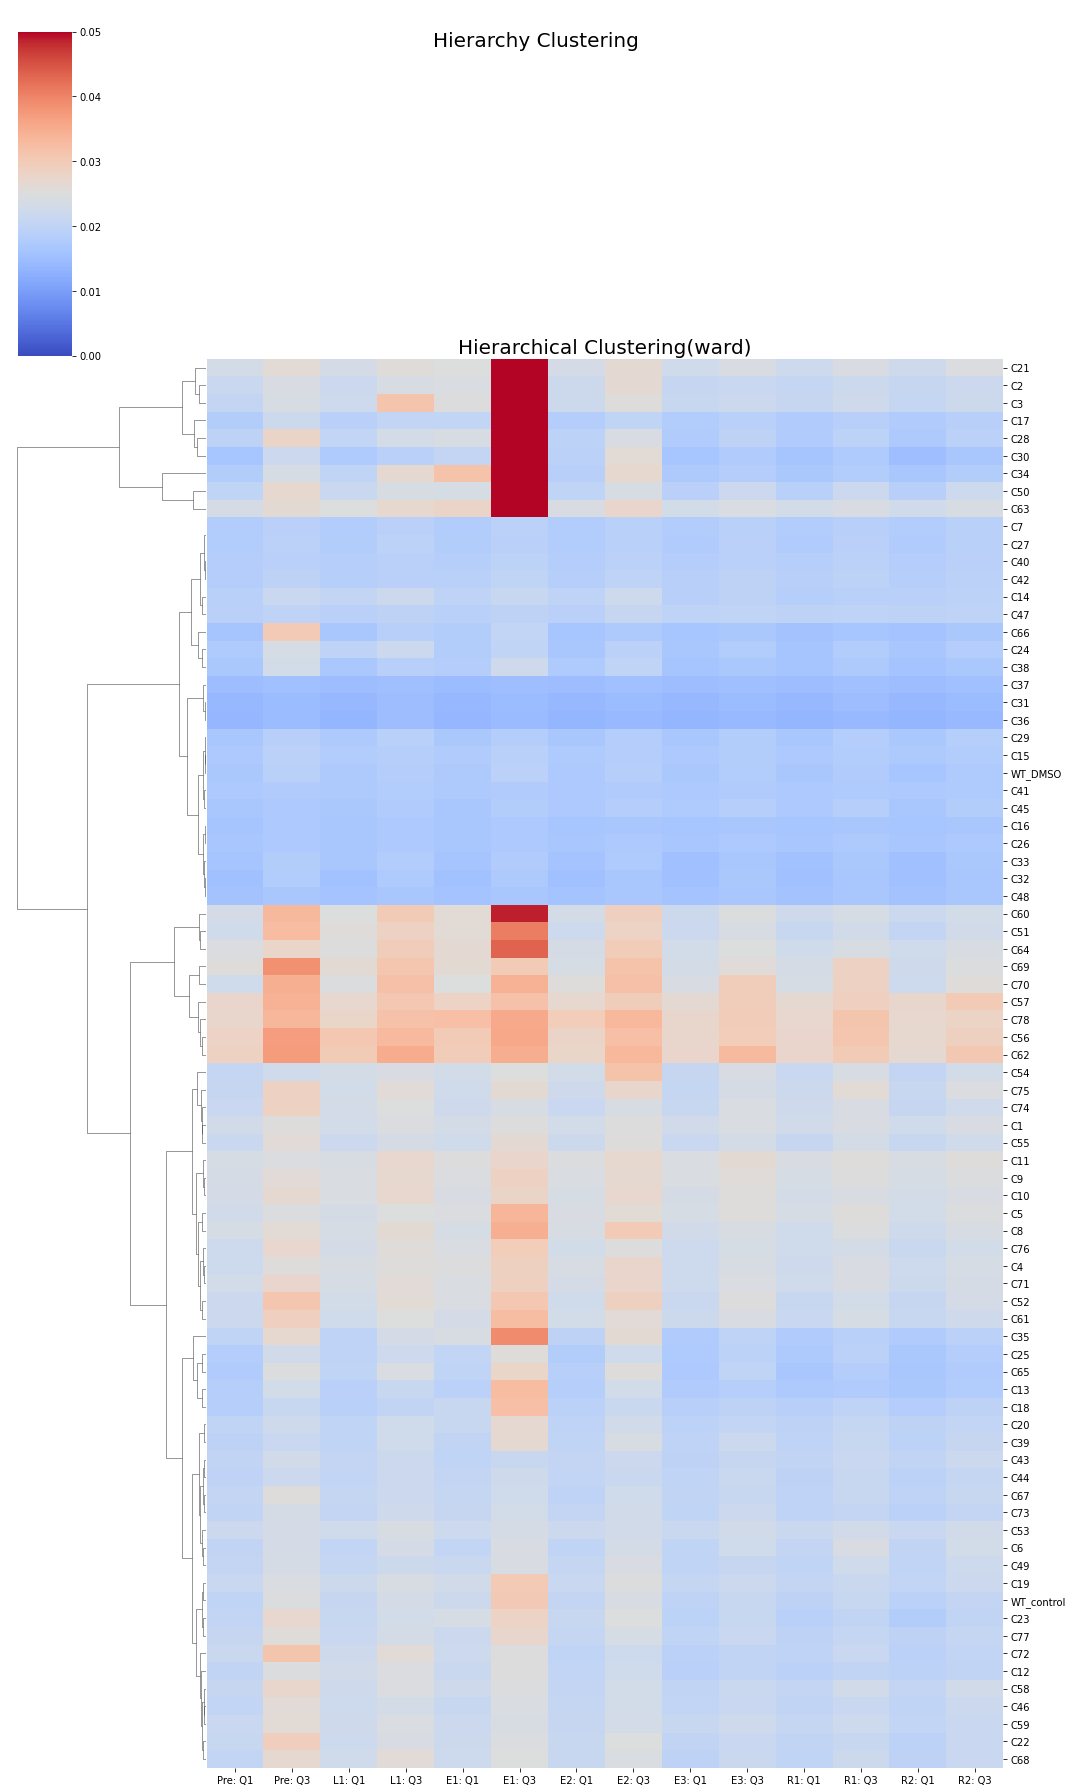

In [180]:
#sns.set_context({"figure.figsize":(15,15)})

fig = plt.figure(figsize=(15, 20))
# heatmap = sns.clustermap(data=data, method='ward', metric='euclidean', 
#                row_cluster=True, col_cluster=None, cmap="coolwarm", 
#                          vmin=0, vmax=0.15, figsize=(15,35), cbar_pos=(1.05, .2, .03, .4))
heatmap = sns.clustermap(data=data, method='ward', metric='euclidean', 
               row_cluster=True, col_cluster=None, cmap="coolwarm", 
                         vmin=0, vmax=0.05, figsize=(15,25))
heatmap.fig.suptitle("Hierarchy Clustering", fontsize=20)
heatmap.ax_heatmap.set_title("Hierarchical Clustering(ward)", fontsize=20)
plt.savefig("./png/clustering_png/hierarchical_clustering_ward_0.05.png", dpi=300)



<Figure size 1080x1440 with 0 Axes>

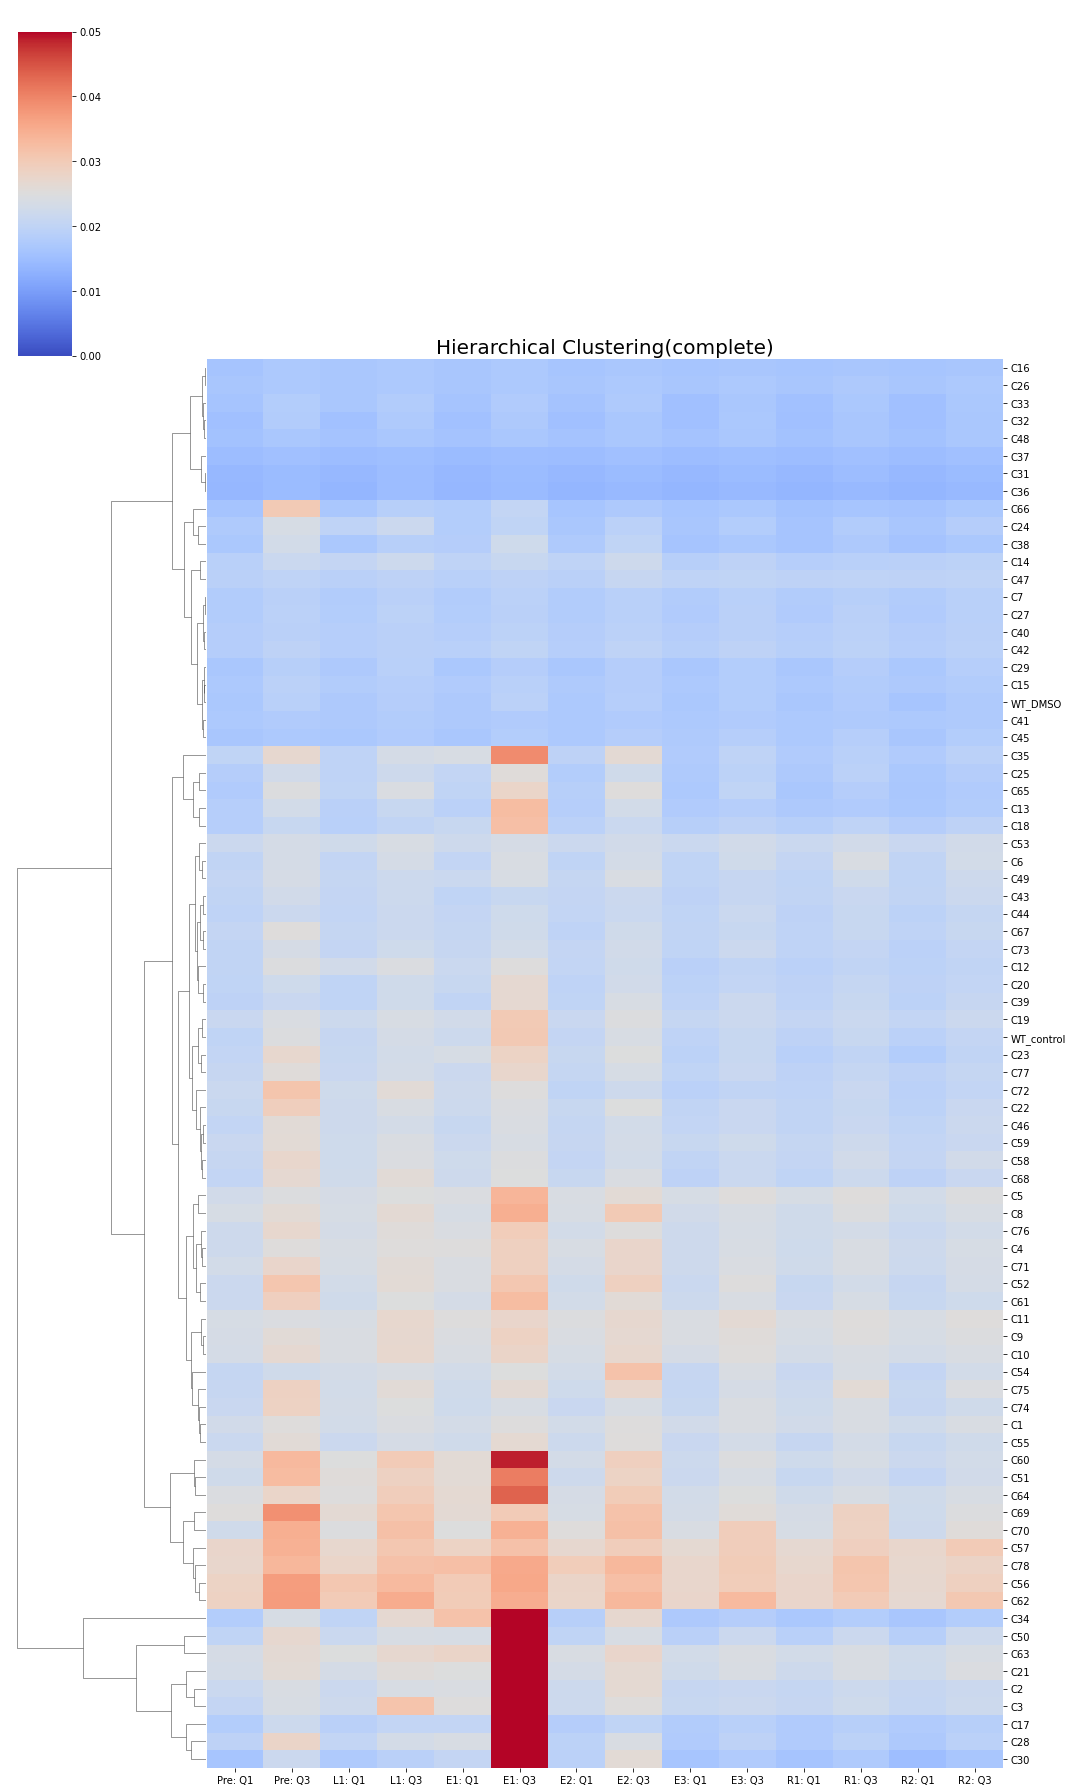

In [181]:

fig = plt.figure(figsize=(15, 20))
heatmap = sns.clustermap(data=data, method='complete', metric='euclidean', 
               row_cluster=True, col_cluster=None, cmap="coolwarm", 
                         vmin=0, vmax=0.05, figsize=(15,25))
#heatmap.fig.suptitle("Hierarchy Clustering", fontsize=20)
heatmap.ax_heatmap.set_title("Hierarchical Clustering(complete)", fontsize=20)
plt.savefig("./png/clustering_png/hierarchical_clustering_complete_0.05.png", dpi=300)

<Figure size 1080x1440 with 0 Axes>

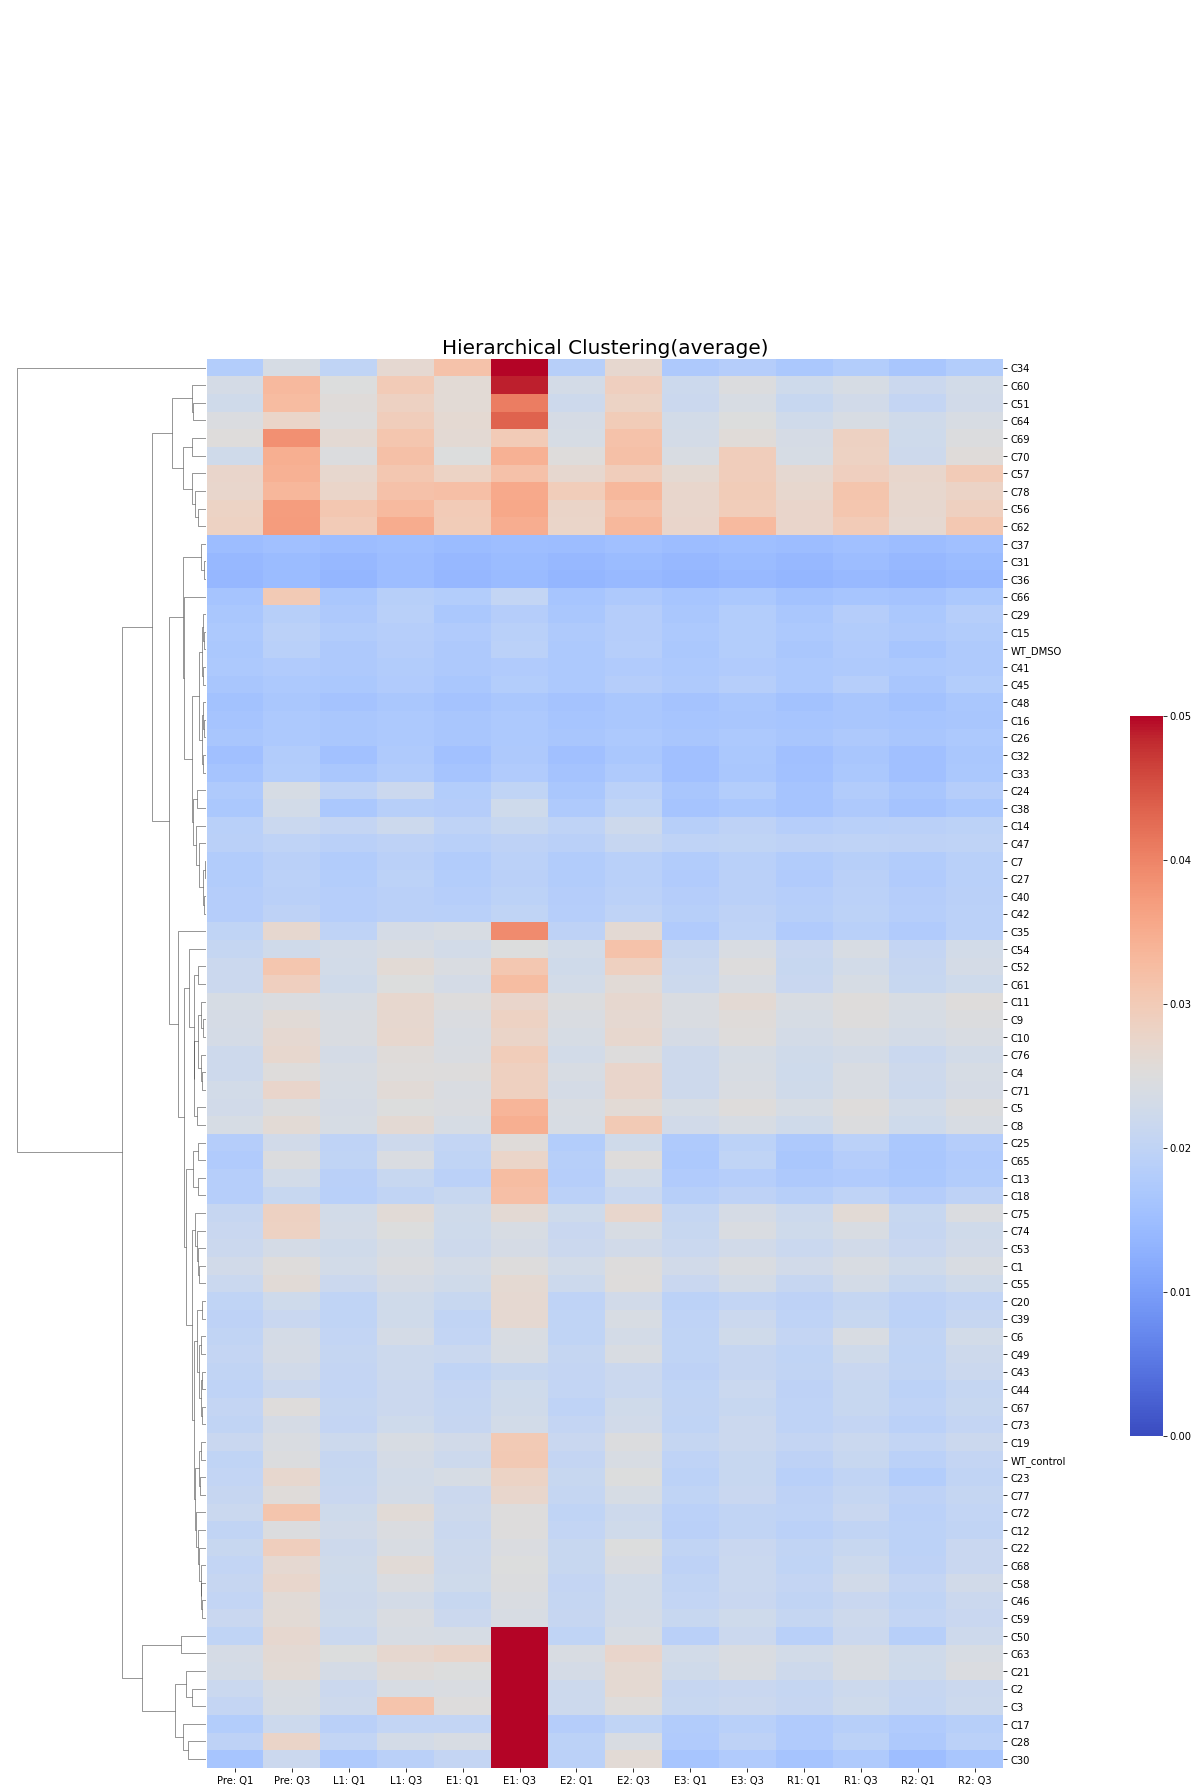

In [182]:
fig = plt.figure(figsize=(15, 20))
heatmap = sns.clustermap(data=data, method='average', metric='euclidean', 
               row_cluster=True, col_cluster=None, cmap="coolwarm", 
                         vmin=0, vmax=0.05, figsize=(15,25), cbar_pos=(1.05, .2, .03, .4))
#heatmap.fig.suptitle("Hierarchy Clustering", fontsize=20)
heatmap.ax_heatmap.set_title("Hierarchical Clustering(average)", fontsize=20)
plt.savefig("./png/clustering_png/hierarchical_clustering_average_0.05.png", dpi=300)

## 

2021.09.29

## 4 Individed into two parts

From this scatter figure of KMeans we can see some data are intense, some are sparse. We divide the intense area and sparse area.

### Sparse

In [3]:
sparse_data = pd.read_csv("./two parts/sparse.csv")
sparse_data.set_index(['Unnamed: 0'], drop=True, inplace=True)
sparse_data.index.name = None
sparse_data

Pre: Q1   Pre: Q3    L1: Q1    L1: Q3    E1: Q1    E1: Q3    E2: Q1  \
C34  0.018065  0.023675  0.020113  0.026671  0.031616  0.137199  0.018695   
C50  0.020095  0.026795  0.021506  0.023919  0.023755  0.101047  0.020036   
C63  0.023547  0.026181  0.024894  0.026903  0.027785  0.092541  0.024211   
C30  0.016306  0.021827  0.017392  0.019038  0.020699  0.056132  0.019150   
C2   0.021637  0.024109  0.021775  0.024005  0.024315  0.066676  0.021888   
C28  0.019552  0.027801  0.020474  0.023052  0.023885  0.055713  0.019477   
C17  0.018113  0.022009  0.019109  0.020501  0.020332  0.065991  0.018231   
C21  0.023226  0.026091  0.023429  0.025535  0.024866  0.059376  0.023248   
C3   0.020699  0.023960  0.022117  0.031256  0.025140  0.069878  0.022025   

       E2: Q3    E3: Q1    E3: Q3    R1: Q1    R1: Q3    R2: Q1    R2: Q3  
C34  0.026839  0.017193  0.018190  0.016928  0.018020  0.016568  0.018002  
C50  0.023937  0.019020  0.021816  0.018761  0.021802  0.018581  0.022215  
C63  0.027439  0.022937  0.024384  0.022925  0.024091  0.022618  0.023986  
C30  0.026137  0.016401  0.017615  0.016176  0.017467  0.014871  0.016501  
C2   0.026479  0.020962  0.021483  0.020860  0.022058  0.021058  0.021799  
C28  0.024210  0.017590  0.019544  0.017612  0.019501  0.017271  0.019314  
C17  0.020071  0.017832  0.018817  0.017666  0.018596  0.017640  0.018570  
C21  0.026401  0.022559  0.024114  0.022249  0.024146  0.022421  0.024425  
C3   0.025329  0.021225  0.021857  0.021042  0.022438  0.020823  0.021925

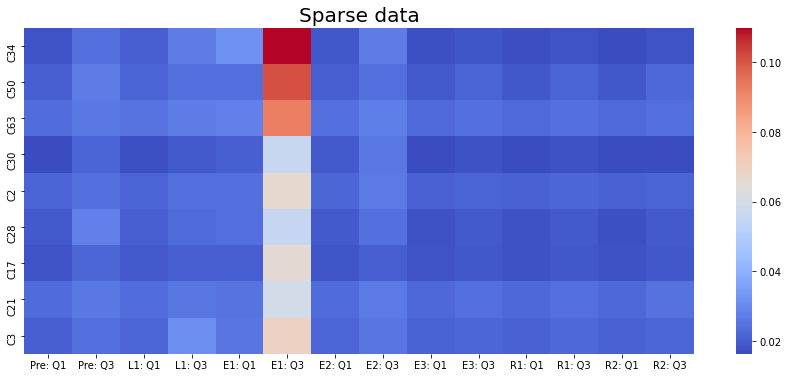

In [28]:
sns.set_context({"figure.figsize":(15,6)})
#sns.heatmap(data=all_s, cmap="coolwarm", linewidths=0.005, robust=True)
#heatmap = sns.heatmap(data=sparse_data, cmap="coolwarm", robust=True, vmax=0.05)
heatmap = sns.heatmap(data=sparse_data, cmap="coolwarm", robust=True, vmax=0.11)
heatmap.set_title("Sparse data", fontsize=20)
plt.savefig("./two parts/sparse_withoutclusteirng", dpi=300)

### intense

In [14]:
intense_data = pd.read_csv("./two parts/intense.csv")
intense_data.set_index(['Unnamed: 0'], drop=True, inplace=True)
intense_data.index.name = None
intense_data

Pre: Q1   Pre: Q3    L1: Q1    L1: Q3    E1: Q1    E1: Q3    E2: Q1  \
C1   0.022760  0.025234  0.022922  0.024524  0.023107  0.025042  0.023016   
C43  0.020154  0.022752  0.020566  0.021925  0.020104  0.021233  0.020557   
C44  0.019870  0.021722  0.020347  0.021819  0.020575  0.022444  0.020353   
C46  0.020436  0.025881  0.022167  0.023168  0.021220  0.024376  0.020720   
C49  0.020622  0.023541  0.020704  0.021974  0.021513  0.023973  0.020745   
..        ...       ...       ...       ...       ...       ...       ...   
C60  0.023273  0.033131  0.024842  0.029910  0.026059  0.048815  0.023107   
C57  0.027406  0.034191  0.027008  0.030679  0.028168  0.031721  0.026831   
C56  0.028214  0.036931  0.030733  0.032993  0.030074  0.035686  0.027806   
C78  0.027339  0.033403  0.027719  0.031693  0.032066  0.035492  0.029628   
C51  0.022565  0.032706  0.025419  0.028678  0.026010  0.040792  0.022126   

       E2: Q3    E3: Q1    E3: Q3    R1: Q1    R1: Q3    R2: Q1    R2: Q3  
C1   0.025137  0.022669  0.024411  0.022702  0.024123  0.022598  0.024095  
C43  0.021698  0.019673  0.021070  0.020297  0.021423  0.020235  0.021867  
C44  0.021622  0.020055  0.021506  0.019622  0.021190  0.019359  0.020829  
C46  0.022934  0.020313  0.021452  0.020197  0.021372  0.020040  0.021821  
C49  0.024034  0.020007  0.021076  0.020018  0.022491  0.020101  0.022112  
..        ...       ...       ...       ...       ...       ...       ...  
C60  0.029006  0.022048  0.024675  0.022325  0.023800  0.021803  0.023038  
C57  0.029327  0.026371  0.029325  0.026625  0.028958  0.027237  0.030076  
C56  0.032186  0.027257  0.029519  0.027474  0.030909  0.026852  0.028713  
C78  0.033321  0.027274  0.029868  0.027001  0.031142  0.026981  0.027982  
C51  0.028232  0.021842  0.023928  0.021115  0.022671  0.020698  0.022669  

[71 rows x 14 columns]

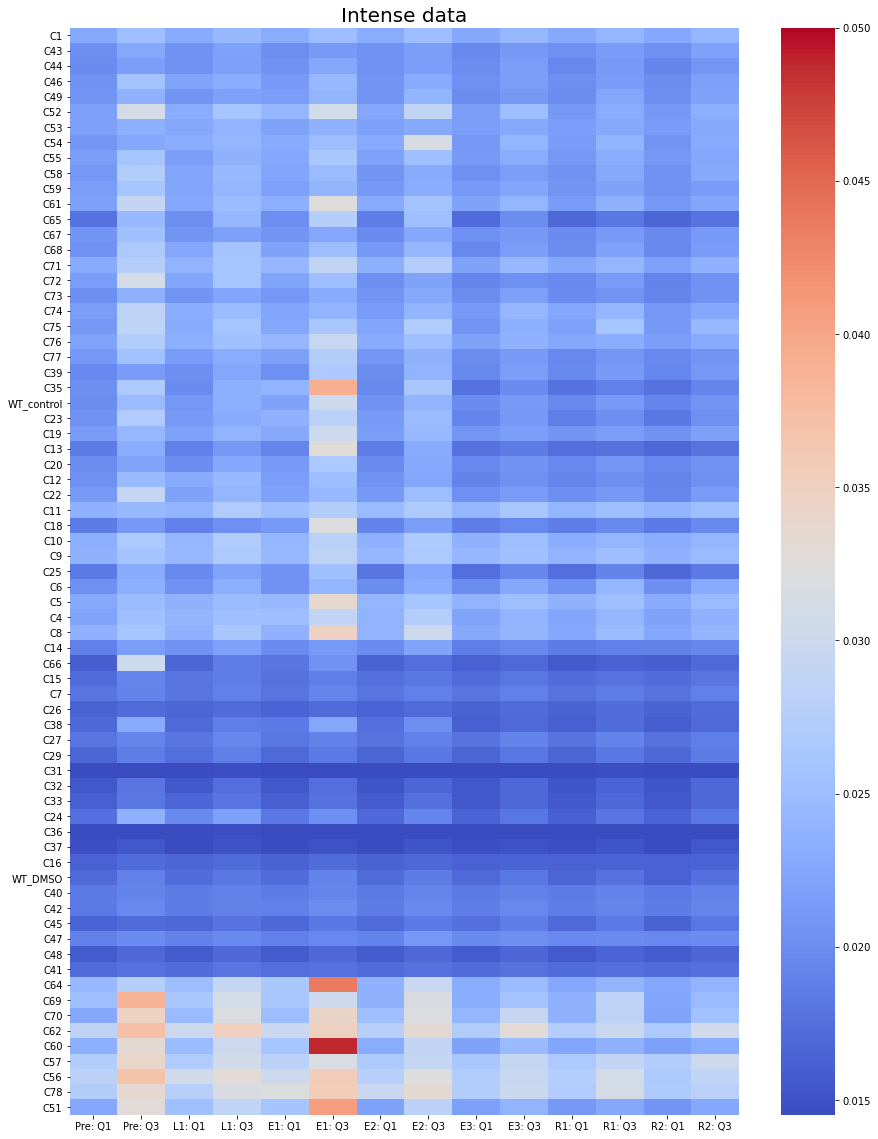

In [26]:
sns.set_context({"figure.figsize":(15,20)})
#sns.heatmap(data=all_s, cmap="coolwarm", linewidths=0.005, robust=True)
#heatmap = sns.heatmap(data=sparse_data, cmap="coolwarm", robust=True, vmax=0.05)
heatmap = sns.heatmap(data=intense_data, cmap="coolwarm", robust=True, vmax=0.05)
heatmap.set_title("Intense data", fontsize=20)
plt.savefig("./two parts/intense_withoutclusteirng", dpi=300)

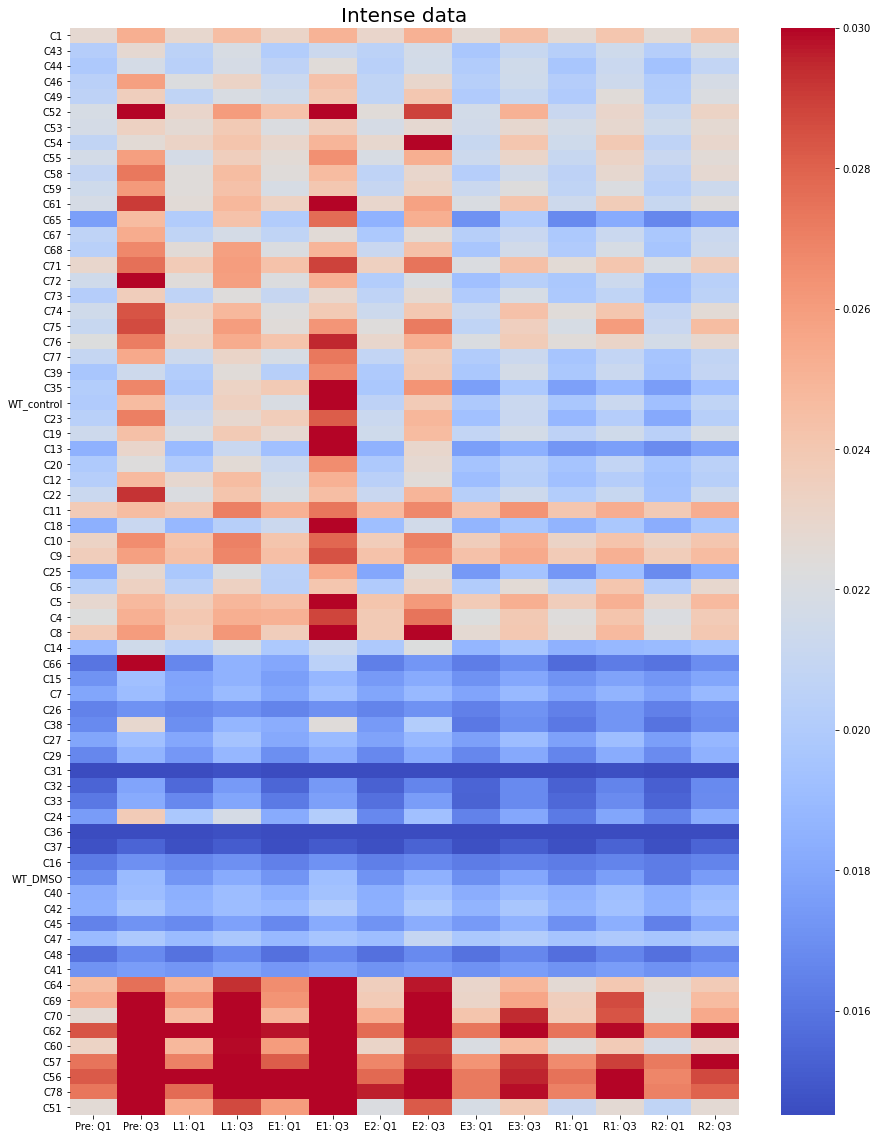

In [24]:
sns.set_context({"figure.figsize":(15,20)})
#sns.heatmap(data=all_s, cmap="coolwarm", linewidths=0.005, robust=True)
#heatmap = sns.heatmap(data=sparse_data, cmap="coolwarm", robust=True, vmax=0.05)
heatmap = sns.heatmap(data=intense_data, cmap="coolwarm", robust=True, vmax=0.03)
heatmap.set_title("Intense data", fontsize=20)
plt.savefig("./two parts/intense_withoutclusteirng_lowerrange", dpi=300)

# 3 Classification

In [2]:
import torch 
import torch.nn as nn
import os,glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
import torch.optim as optim

from tqdm.notebook import tqdm
from sklearn.metrics import confusion_matrix, classification_report

https://towardsdatascience.com/pytorch-tabular-multiclass-classification-9f8211a123ab

In [4]:
df = pd.read_csv("./classification/kmeans4 merge5.csv")
df

Unnamed: 0   Pre: Q1   Pre: Q3    L1: Q1    L1: Q3    E1: Q1    E1: Q3  \
0          C1  0.022760  0.025234  0.022922  0.024524  0.023107  0.025042   
1         C43  0.020154  0.022752  0.020566  0.021925  0.020104  0.021233   
2         C44  0.019870  0.021722  0.020347  0.021819  0.020575  0.022444   
3         C46  0.020436  0.025881  0.022167  0.023168  0.021220  0.024376   
4         C49  0.020622  0.023541  0.020704  0.021974  0.021513  0.023973   
..        ...       ...       ...       ...       ...       ...       ...   
75        C60  0.023273  0.033131  0.024842  0.029910  0.026059  0.048815   
76        C57  0.027406  0.034191  0.027008  0.030679  0.028168  0.031721   
77        C56  0.028214  0.036931  0.030733  0.032993  0.030074  0.035686   
78        C78  0.027339  0.033403  0.027719  0.031693  0.032066  0.035492   
79        C51  0.022565  0.032706  0.025419  0.028678  0.026010  0.040792   

      E2: Q1    E2: Q3    E3: Q1    E3: Q3    R1: Q1    R1: Q3    R2: Q1  \
0   0.023016  0.025137  0.022669  0.024411  0.022702  0.024123  0.022598   
1   0.020557  0.021698  0.019673  0.021070  0.020297  0.021423  0.020235   
2   0.020353  0.021622  0.020055  0.021506  0.019622  0.021190  0.019359   
3   0.020720  0.022934  0.020313  0.021452  0.020197  0.021372  0.020040   
4   0.020745  0.024034  0.020007  0.021076  0.020018  0.022491  0.020101   
..       ...       ...       ...       ...       ...       ...       ...   
75  0.023107  0.029006  0.022048  0.024675  0.022325  0.023800  0.021803   
76  0.026831  0.029327  0.026371  0.029325  0.026625  0.028958  0.027237   
77  0.027806  0.032186  0.027257  0.029519  0.027474  0.030909  0.026852   
78  0.029628  0.033321  0.027274  0.029868  0.027001  0.031142  0.026981   
79  0.022126  0.028232  0.021842  0.023928  0.021115  0.022671  0.020698   

      R2: Q3  clusters  labels  
0   0.024095         0       0  
1   0.021867         0       0  
2   0.020829         0       0  
3   0.021821         0       0  
4   0.022112         0       0  
..       ...       ...     ...  
75  0.023038         2       2  
76  0.030076         2       2  
77  0.028713         2       2  
78  0.027982         2       2  
79  0.022669         2       2  

[80 rows x 17 columns]

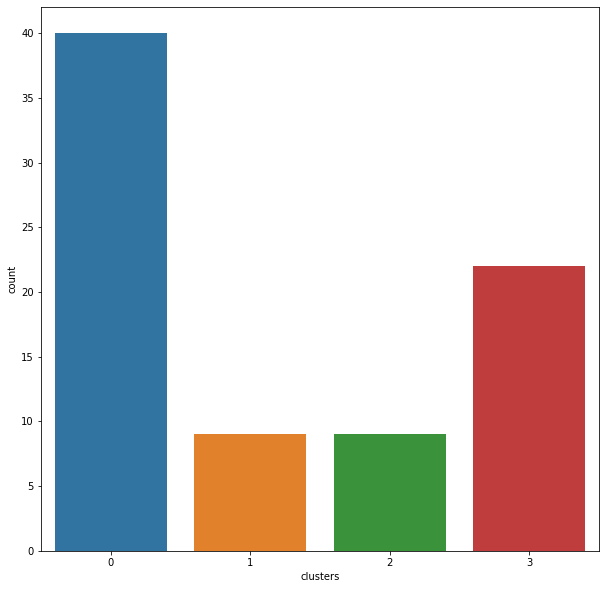

In [7]:
plt.figure(figsize=(10, 10))
sns.countplot(x='clusters', data=df)
plt.savefig("./distribution.png", dpi=300)

In [8]:
class2idx = {
    '0':0,
    '1':1,
    '2':2,
    '3':3,
}

idx2class = {v: k for k, v in class2idx.items()}

df['clusters'].replace(class2idx, inplace=True)

In [9]:
le=LabelEncoder()
X=df.iloc[:, 1:-2]
Y=le.fit_transform(df['clusters'])

In [10]:
X

Pre: Q1   Pre: Q3    L1: Q1    L1: Q3    E1: Q1    E1: Q3    E2: Q1  \
0   0.022760  0.025234  0.022922  0.024524  0.023107  0.025042  0.023016   
1   0.020154  0.022752  0.020566  0.021925  0.020104  0.021233  0.020557   
2   0.019870  0.021722  0.020347  0.021819  0.020575  0.022444  0.020353   
3   0.020436  0.025881  0.022167  0.023168  0.021220  0.024376  0.020720   
4   0.020622  0.023541  0.020704  0.021974  0.021513  0.023973  0.020745   
..       ...       ...       ...       ...       ...       ...       ...   
75  0.023273  0.033131  0.024842  0.029910  0.026059  0.048815  0.023107   
76  0.027406  0.034191  0.027008  0.030679  0.028168  0.031721  0.026831   
77  0.028214  0.036931  0.030733  0.032993  0.030074  0.035686  0.027806   
78  0.027339  0.033403  0.027719  0.031693  0.032066  0.035492  0.029628   
79  0.022565  0.032706  0.025419  0.028678  0.026010  0.040792  0.022126   

      E2: Q3    E3: Q1    E3: Q3    R1: Q1    R1: Q3    R2: Q1    R2: Q3  
0   0.025137  0.022669  0.024411  0.022702  0.024123  0.022598  0.024095  
1   0.021698  0.019673  0.021070  0.020297  0.021423  0.020235  0.021867  
2   0.021622  0.020055  0.021506  0.019622  0.021190  0.019359  0.020829  
3   0.022934  0.020313  0.021452  0.020197  0.021372  0.020040  0.021821  
4   0.024034  0.020007  0.021076  0.020018  0.022491  0.020101  0.022112  
..       ...       ...       ...       ...       ...       ...       ...  
75  0.029006  0.022048  0.024675  0.022325  0.023800  0.021803  0.023038  
76  0.029327  0.026371  0.029325  0.026625  0.028958  0.027237  0.030076  
77  0.032186  0.027257  0.029519  0.027474  0.030909  0.026852  0.028713  
78  0.033321  0.027274  0.029868  0.027001  0.031142  0.026981  0.027982  
79  0.028232  0.021842  0.023928  0.021115  0.022671  0.020698  0.022669  

[80 rows x 14 columns]

In [11]:
le.classes_

array([0, 1, 2, 3])

In [12]:
le.inverse_transform([0,1,2,3])
dict(zip(le.inverse_transform([0,1,2,3]),[0,1,2,3]))

{0: 0, 1: 1, 2: 2, 3: 3}

In [14]:
X_trainval, X_test, y_trainval, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=69)

#Split train into train-val
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.1, stratify=y_trainval, random_state=21)

In [15]:
def get_class_distribution(obj):
    count_dict = {
        "rating_3": 0,
        "rating_4": 0,
        "rating_5": 0,
        "rating_6": 0,

    }
    
    for i in obj:
        if i == 0: 
            count_dict['rating_3'] += 1
        elif i == 1: 
            count_dict['rating_4'] += 1
        elif i == 2: 
            count_dict['rating_5'] += 1   
        elif i == 3: 
            count_dict['rating_6'] += 1    
        else:
            print("Check classes.")
            
    return count_dict

In [16]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_val, y_val = np.array(X_val), np.array(y_val)
X_test, y_test = np.array(X_test), np.array(y_test)

In [17]:
class ClassifierDataset(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)


train_dataset = ClassifierDataset(torch.from_numpy(X_train).float(), torch.from_numpy(y_train).long())
val_dataset = ClassifierDataset(torch.from_numpy(X_val).float(), torch.from_numpy(y_val).long())
test_dataset = ClassifierDataset(torch.from_numpy(X_test).float(), torch.from_numpy(y_test).long())

In [18]:
target_list = []
for _, t in train_dataset:
    target_list.append(t)
    
target_list = torch.tensor(target_list)
target_list = target_list[torch.randperm(len(target_list))]

In [19]:
class_count = [i for i in get_class_distribution(y_train).values()]
class_weights = 1./torch.tensor(class_count, dtype=torch.float) 
print(class_weights)

tensor([0.0345, 0.1667, 0.1667, 0.0625])


In [20]:
class_weights_all = class_weights[target_list]

In [21]:
weighted_sampler = WeightedRandomSampler(
    weights=class_weights_all,
    num_samples=len(class_weights_all),
    replacement=True
)

In [22]:
EPOCHS = 300
BATCH_SIZE = 16
LEARNING_RATE = 0.00007

NUM_FEATURES = len(X.columns)
NUM_CLASSES = 4

In [23]:
train_loader = DataLoader(dataset=train_dataset,
                          batch_size=BATCH_SIZE,
                          sampler=weighted_sampler
)
val_loader = DataLoader(dataset=val_dataset, batch_size=1)
test_loader = DataLoader(dataset=test_dataset, batch_size=1)

In [24]:
class MulticlassClassification(nn.Module):
    def __init__(self, num_feature, num_class):
        super(MulticlassClassification, self).__init__()
        
        self.layer_1 = nn.Linear(num_feature, 512)
        self.layer_2 = nn.Linear(512, 128)
        self.layer_3 = nn.Linear(128, 64)
        self.layer_out = nn.Linear(64, num_class) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.2)
        self.batchnorm1 = nn.BatchNorm1d(512)
        self.batchnorm2 = nn.BatchNorm1d(128)
        self.batchnorm3 = nn.BatchNorm1d(64)
        
    def forward(self, x):
        x = self.layer_1(x)
        x = self.batchnorm1(x)
        x = self.relu(x)
        
        x = self.layer_2(x)
        x = self.batchnorm2(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.layer_3(x)
        x = self.batchnorm3(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.layer_out(x)
        
        return x

In [25]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [26]:
model = MulticlassClassification(num_feature = NUM_FEATURES, num_class=NUM_CLASSES)
model.to(device)

criterion = nn.CrossEntropyLoss(weight=class_weights.to(device))
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
print(model)



MulticlassClassification(
  (layer_1): Linear(in_features=14, out_features=512, bias=True)
  (layer_2): Linear(in_features=512, out_features=128, bias=True)
  (layer_3): Linear(in_features=128, out_features=64, bias=True)
  (layer_out): Linear(in_features=64, out_features=4, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.2, inplace=False)
  (batchnorm1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm3): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


In [27]:
def multi_acc(y_pred, y_test):
    y_pred_softmax = torch.log_softmax(y_pred, dim = 1)
    _, y_pred_tags = torch.max(y_pred_softmax, dim = 1)    
    
    correct_pred = (y_pred_tags == y_test).float()
    acc = correct_pred.sum() / len(correct_pred)
    
    acc = torch.round(acc * 100)
    
    return acc

In [28]:
accuracy_stats = {
    'train': [],
    "val": []
}
loss_stats = {
    'train': [],
    "val": []
}

In [29]:
print("Begin training.")
for e in tqdm(range(1, EPOCHS+1)):
    
    # TRAINING
    train_epoch_loss = 0
    train_epoch_acc = 0
    model.train()
    for X_train_batch, y_train_batch in train_loader:
        X_train_batch, y_train_batch = X_train_batch.to(device), y_train_batch.to(device)
        optimizer.zero_grad()
        
        y_train_pred = model(X_train_batch)
        
        train_loss = criterion(y_train_pred, y_train_batch)
        train_acc = multi_acc(y_train_pred, y_train_batch)
        
        train_loss.backward()
        optimizer.step()
        
        train_epoch_loss += train_loss.item()
        train_epoch_acc += train_acc.item()
        
        
    # VALIDATION    
    with torch.no_grad():
        
        val_epoch_loss = 0
        val_epoch_acc = 0
        
        model.eval()
        for X_val_batch, y_val_batch in val_loader:
            X_val_batch, y_val_batch = X_val_batch.to(device), y_val_batch.to(device)
            
            y_val_pred = model(X_val_batch)
                        
            val_loss = criterion(y_val_pred, y_val_batch)
            val_acc = multi_acc(y_val_pred, y_val_batch)
            
            val_epoch_loss += val_loss.item()
            val_epoch_acc += val_acc.item()
    loss_stats['train'].append(train_epoch_loss/len(train_loader))
    loss_stats['val'].append(val_epoch_loss/len(val_loader))
    accuracy_stats['train'].append(train_epoch_acc/len(train_loader))
    accuracy_stats['val'].append(val_epoch_acc/len(val_loader))
                              
    
    print(f'Epoch {e+0:03}: | Train Loss: {train_epoch_loss/len(train_loader):.5f} | Val Loss: {val_epoch_loss/len(val_loader):.5f} | Train Acc: {train_epoch_acc/len(train_loader):.3f}| Val Acc: {val_epoch_acc/len(val_loader):.3f}')



Begin training.


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch 001: | Train Loss: 1.33843 | Val Loss: 1.35485 | Train Acc: 34.250| Val Acc: 42.857
Epoch 002: | Train Loss: 1.10771 | Val Loss: 1.35153 | Train Acc: 56.000| Val Acc: 42.857
Epoch 003: | Train Loss: 1.00328 | Val Loss: 1.34699 | Train Acc: 68.750| Val Acc: 42.857
Epoch 004: | Train Loss: 1.06578 | Val Loss: 1.33975 | Train Acc: 64.750| Val Acc: 42.857
Epoch 005: | Train Loss: 1.12307 | Val Loss: 1.33076 | Train Acc: 63.000| Val Acc: 42.857
Epoch 006: | Train Loss: 0.89230 | Val Loss: 1.31851 | Train Acc: 70.000| Val Acc: 42.857
Epoch 007: | Train Loss: 0.94232 | Val Loss: 1.30806 | Train Acc: 75.000| Val Acc: 42.857
Epoch 008: | Train Loss: 0.80920 | Val Loss: 1.29753 | Train Acc: 81.500| Val Acc: 42.857
Epoch 009: | Train Loss: 0.85078 | Val Loss: 1.28680 | Train Acc: 78.250| Val Acc: 42.857
Epoch 010: | Train Loss: 0.78042 | Val Loss: 1.28031 | Train Acc: 89.500| Val Acc: 42.857
Epoch 011: | Train Loss: 0.74842 | Val Loss: 1.27288 | Train Acc: 90.750| Val Acc: 42.857
Epoch 012:

Epoch 092: | Train Loss: 0.56078 | Val Loss: 0.40783 | Train Acc: 84.000| Val Acc: 100.000
Epoch 093: | Train Loss: 0.40403 | Val Loss: 0.44668 | Train Acc: 89.250| Val Acc: 100.000
Epoch 094: | Train Loss: 0.40613 | Val Loss: 0.43062 | Train Acc: 91.000| Val Acc: 100.000
Epoch 095: | Train Loss: 0.43336 | Val Loss: 0.47602 | Train Acc: 87.500| Val Acc: 100.000
Epoch 096: | Train Loss: 0.33887 | Val Loss: 0.49300 | Train Acc: 93.000| Val Acc: 100.000
Epoch 097: | Train Loss: 0.34613 | Val Loss: 0.50255 | Train Acc: 98.500| Val Acc: 100.000
Epoch 098: | Train Loss: 0.52660 | Val Loss: 0.51820 | Train Acc: 80.000| Val Acc: 100.000
Epoch 099: | Train Loss: 0.43085 | Val Loss: 0.50535 | Train Acc: 89.750| Val Acc: 85.714
Epoch 100: | Train Loss: 0.34740 | Val Loss: 0.49179 | Train Acc: 89.000| Val Acc: 100.000
Epoch 101: | Train Loss: 0.49621 | Val Loss: 0.44374 | Train Acc: 88.750| Val Acc: 100.000
Epoch 102: | Train Loss: 0.29347 | Val Loss: 0.44507 | Train Acc: 100.000| Val Acc: 100.000

Epoch 184: | Train Loss: 0.22852 | Val Loss: 0.33414 | Train Acc: 95.750| Val Acc: 100.000
Epoch 185: | Train Loss: 0.30300 | Val Loss: 0.31829 | Train Acc: 84.000| Val Acc: 100.000
Epoch 186: | Train Loss: 0.28712 | Val Loss: 0.32517 | Train Acc: 95.500| Val Acc: 100.000
Epoch 187: | Train Loss: 0.18601 | Val Loss: 0.32358 | Train Acc: 97.250| Val Acc: 100.000
Epoch 188: | Train Loss: 0.34917 | Val Loss: 0.34097 | Train Acc: 87.500| Val Acc: 100.000
Epoch 189: | Train Loss: 0.23193 | Val Loss: 0.28756 | Train Acc: 100.000| Val Acc: 100.000
Epoch 190: | Train Loss: 0.20660 | Val Loss: 0.28750 | Train Acc: 95.500| Val Acc: 100.000
Epoch 191: | Train Loss: 0.34345 | Val Loss: 0.27504 | Train Acc: 87.000| Val Acc: 100.000
Epoch 192: | Train Loss: 0.30314 | Val Loss: 0.29424 | Train Acc: 90.750| Val Acc: 100.000
Epoch 193: | Train Loss: 0.28826 | Val Loss: 0.30280 | Train Acc: 94.000| Val Acc: 100.000
Epoch 194: | Train Loss: 0.25303 | Val Loss: 0.33562 | Train Acc: 97.000| Val Acc: 100.00

Epoch 277: | Train Loss: 0.14903 | Val Loss: 0.23009 | Train Acc: 97.000| Val Acc: 100.000
Epoch 278: | Train Loss: 0.24681 | Val Loss: 0.25214 | Train Acc: 90.750| Val Acc: 100.000
Epoch 279: | Train Loss: 0.21268 | Val Loss: 0.25474 | Train Acc: 98.500| Val Acc: 100.000
Epoch 280: | Train Loss: 0.14029 | Val Loss: 0.24537 | Train Acc: 100.000| Val Acc: 100.000
Epoch 281: | Train Loss: 0.25141 | Val Loss: 0.24422 | Train Acc: 92.250| Val Acc: 100.000
Epoch 282: | Train Loss: 0.29398 | Val Loss: 0.27070 | Train Acc: 84.750| Val Acc: 100.000
Epoch 283: | Train Loss: 0.16115 | Val Loss: 0.23107 | Train Acc: 98.500| Val Acc: 100.000
Epoch 284: | Train Loss: 0.19143 | Val Loss: 0.22312 | Train Acc: 97.250| Val Acc: 100.000
Epoch 285: | Train Loss: 0.37387 | Val Loss: 0.18677 | Train Acc: 83.250| Val Acc: 100.000
Epoch 286: | Train Loss: 0.18840 | Val Loss: 0.19537 | Train Acc: 95.250| Val Acc: 100.000
Epoch 287: | Train Loss: 0.27775 | Val Loss: 0.18899 | Train Acc: 88.250| Val Acc: 100.00

## Visualize Loss and Accuracy


Text(0.5, 1.0, 'Train-Val Loss/Epoch')

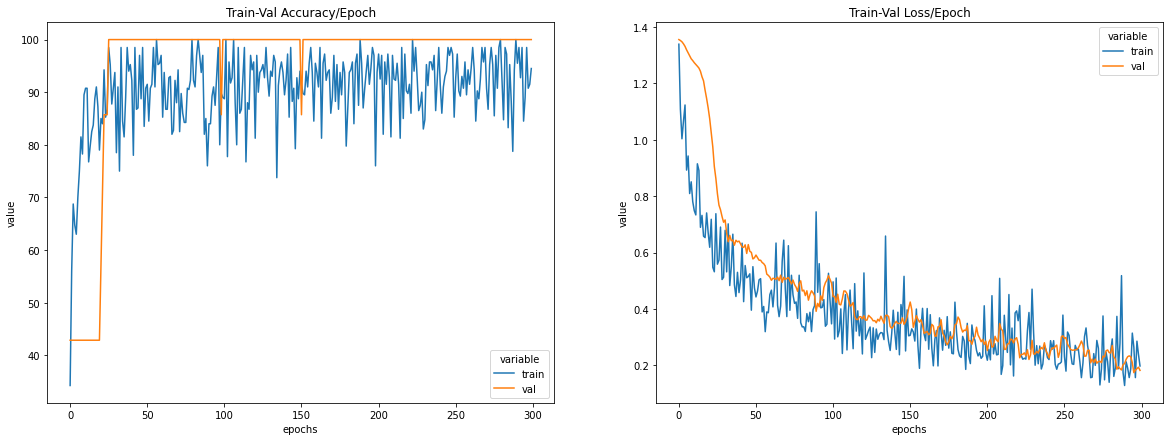

In [30]:
# Create dataframes
train_val_acc_df = pd.DataFrame.from_dict(accuracy_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})
train_val_loss_df = pd.DataFrame.from_dict(loss_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})
# Plot the dataframes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,7))
sns.lineplot(data=train_val_acc_df, x = "epochs", y="value", hue="variable",  ax=axes[0]).set_title('Train-Val Accuracy/Epoch')
sns.lineplot(data=train_val_loss_df, x = "epochs", y="value", hue="variable", ax=axes[1]).set_title('Train-Val Loss/Epoch')

## Test the model

In [31]:
y_pred_list = []
with torch.no_grad():
    model.eval()
    for X_batch, _ in test_loader:
        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        _, y_pred_tags = torch.max(y_test_pred, dim = 1)
        y_pred_list.append(y_pred_tags.cpu().numpy())
y_pred_list = [a.squeeze().tolist() for a in y_pred_list]

**Confusion Matrix**

<AxesSubplot:>

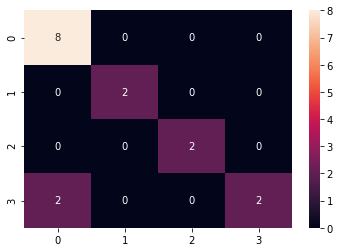

In [32]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_test, y_pred_list)).rename(columns=idx2class, index=idx2class)

sns.heatmap(confusion_matrix_df, annot=True)

In [33]:
print(classification_report(y_test, y_pred_list))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       1.00      0.50      0.67         4

    accuracy                           0.88        16
   macro avg       0.95      0.88      0.89        16
weighted avg       0.90      0.88      0.86        16

